In [82]:
#Importing all th necessary libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import pandas_datareader as pdr

import time
import math, time

import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import plotly.io as pio
import gc


In [83]:
#Input the stocks price dataset
df=pd.read_csv('GOOGLE_STOCK_DATA.csv')

In [84]:
df

symbol                       date    close      high     low    open  \
0     GOOGL  2004-08-19 00:00:00+00:00  100.335  104.0600   95.96  100.01   
1     GOOGL  2004-08-20 00:00:00+00:00  108.310  109.0800  100.50  101.01   
2     GOOGL  2004-08-23 00:00:00+00:00  109.400  113.4800  109.05  110.76   
3     GOOGL  2004-08-24 00:00:00+00:00  104.870  111.6000  103.57  111.24   
4     GOOGL  2004-08-25 00:00:00+00:00  106.000  108.0000  103.88  104.76   
...     ...                        ...      ...       ...     ...     ...   
4845  GOOGL  2023-11-16 00:00:00+00:00  136.930  137.2199  134.32  135.19   
4846  GOOGL  2023-11-17 00:00:00+00:00  135.310  136.0600  133.65  136.00   
4847  GOOGL  2023-11-20 00:00:00+00:00  136.250  136.6600  133.62  133.69   
4848  GOOGL  2023-11-21 00:00:00+00:00  136.970  137.1800  135.96  136.29   
4849  GOOGL  2023-11-22 00:00:00+00:00  138.490  139.4200  137.47  137.47   

        volume    adjClose     adjHigh      adjLow     adjOpen   adjVolume  \
0     44659000    2.516142    2.609555    2.406428    2.507992  1780845677   
1     22834300    2.716134    2.735444    2.520280    2.533069   910552508   
2     18256100    2.743469    2.845785    2.734692    2.777574   727989806   
3     15247300    2.629868    2.798639    2.597268    2.789611   608009321   
4      9188600    2.658206    2.708360    2.605042    2.627110   366409426   
...        ...         ...         ...         ...         ...         ...   
4845  28013179  136.930000  137.219900  134.320000  135.190000    28013179   
4846  37287691  135.310000  136.060000  133.650000  136.000000    37287691   
4847  27850762  136.250000  136.660000  133.620000  133.690000    27850762   
4848  22635272  136.970000  137.180000  135.960000  136.290000    22635272   
4849  17820456  138.490000  139.420000  137.470000  137.470000    17820456   

      divCash  splitFactor  
0         0.0          1.0  
1         0.0          1.0  
2         0.0          1.0  
3         0.0          1.0  
4         0.0          1.0  
...       ...          ...  
4845      0.0          1.0  
4846      0.0          1.0  
4847      0.0          1.0  
4848      0.0          1.0  
4849      0.0          1.0  

[4850 rows x 14 columns]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4850 non-null   object 
 1   date         4850 non-null   object 
 2   close        4850 non-null   float64
 3   high         4850 non-null   float64
 4   low          4850 non-null   float64
 5   open         4850 non-null   float64
 6   volume       4850 non-null   int64  
 7   adjClose     4850 non-null   float64
 8   adjHigh      4850 non-null   float64
 9   adjLow       4850 non-null   float64
 10  adjOpen      4850 non-null   float64
 11  adjVolume    4850 non-null   int64  
 12  divCash      4850 non-null   float64
 13  splitFactor  4850 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 530.6+ KB


## Cleaning the data

In [86]:
#removing timestamps from the date column
df['date'] = df['date'].str.split(' ').str[0]

In [87]:
df

symbol        date    close      high     low    open    volume  \
0     GOOGL  2004-08-19  100.335  104.0600   95.96  100.01  44659000   
1     GOOGL  2004-08-20  108.310  109.0800  100.50  101.01  22834300   
2     GOOGL  2004-08-23  109.400  113.4800  109.05  110.76  18256100   
3     GOOGL  2004-08-24  104.870  111.6000  103.57  111.24  15247300   
4     GOOGL  2004-08-25  106.000  108.0000  103.88  104.76   9188600   
...     ...         ...      ...       ...     ...     ...       ...   
4845  GOOGL  2023-11-16  136.930  137.2199  134.32  135.19  28013179   
4846  GOOGL  2023-11-17  135.310  136.0600  133.65  136.00  37287691   
4847  GOOGL  2023-11-20  136.250  136.6600  133.62  133.69  27850762   
4848  GOOGL  2023-11-21  136.970  137.1800  135.96  136.29  22635272   
4849  GOOGL  2023-11-22  138.490  139.4200  137.47  137.47  17820456   

        adjClose     adjHigh      adjLow     adjOpen   adjVolume  divCash  \
0       2.516142    2.609555    2.406428    2.507992  1780845677      0.0   
1       2.716134    2.735444    2.520280    2.533069   910552508      0.0   
2       2.743469    2.845785    2.734692    2.777574   727989806      0.0   
3       2.629868    2.798639    2.597268    2.789611   608009321      0.0   
4       2.658206    2.708360    2.605042    2.627110   366409426      0.0   
...          ...         ...         ...         ...         ...      ...   
4845  136.930000  137.219900  134.320000  135.190000    28013179      0.0   
4846  135.310000  136.060000  133.650000  136.000000    37287691      0.0   
4847  136.250000  136.660000  133.620000  133.690000    27850762      0.0   
4848  136.970000  137.180000  135.960000  136.290000    22635272      0.0   
4849  138.490000  139.420000  137.470000  137.470000    17820456      0.0   

      splitFactor  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
4845          1.0  
4846          1.0  
4847          1.0  
4848          1.0  
4849          1.0  

[4850 rows x 14 columns]

In [88]:
df = df.reset_index()[['date', 'adjClose']]
df_dates = df.iloc[:,0]
df['date'] = pd.to_datetime(df['date'])

In [89]:
df = df.set_index('date')

In [90]:
df

adjClose
date                  
2004-08-19    2.516142
2004-08-20    2.716134
2004-08-23    2.743469
2004-08-24    2.629868
2004-08-25    2.658206
...                ...
2023-11-16  136.930000
2023-11-17  135.310000
2023-11-20  136.250000
2023-11-21  136.970000
2023-11-22  138.490000

[4850 rows x 1 columns]

In [91]:

plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=17, fontweight='bold')
plt.xlabel('Date', fontsize=17,fontweight='bold')
plt.ylabel('Closing Price in USD', fontsize=17,fontweight='bold')
plt.show()

In [92]:
#displaying an array of the original prices
df_prices = df['adjClose'].values.reshape(-1,1)

In [93]:
df_prices

array([[  2.51614209],
       [  2.71613445],
       [  2.74346883],
       ...,
       [136.25      ],
       [136.97      ],
       [138.49      ]])

In [94]:
#Seamless device selection to move between CPU and GPU based on availability


def get_default_device():
    """Picking a GPU if available, otherwise CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def torch_data(data, device):
    """Move data to a device"""
    return to_device(torch.from_numpy(data).type(torch.Tensor), device)

In [95]:
device = get_default_device()
device

device(type='cuda')

In [96]:
# converting an array of values into sequences in accordance with window size
def create_seq_from_array(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step)]
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return np.array(dataX), np.array(dataY)

In [97]:
# convert an array of values into a dataset matrix
def convert_array_to_dataset(dataset, time_step):

	#splitting our dataset into training, validation and testing
	train_size = round(len(dataset) * 0.80)
	remaining_size = len(dataset) - train_size
	val_size = round(0.50 * remaining_size)
	train_data, val_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:(train_size + val_size), :], dataset.iloc[(train_size + val_size):len(dataset), :]

	#scaling this data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#making sure test data does not leak
	val_data['adjClose'] = scaler.transform(np.array(val_data['adjClose']).reshape(-1, 1))
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_seq_from_array(train_data, time_step)
	X_val, y_val = create_seq_from_array(val_data, time_step)
	X_test, y_test = create_seq_from_array(test_data, time_step)

	# reshaping our input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_val = y_val.reshape(y_val.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [98]:
# convert an array of values into a dataset matrix
def convert_array_to_dataset_test(dataset, time_step):

	##splitting dataset into train  test split
	train_size = round(len(dataset) * 0.90)
	train_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:, :]

	#scaling our data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#Ensuring our test data does not leak into the others
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_seq_from_array(train_data, time_step)
	X_test, y_test = create_seq_from_array(test_data, time_step)

	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_test, y_train, y_test, scaler

In [99]:
# Create a baseline default RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'tanh')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initializing any hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))

        # Single time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [100]:
# this is the function to train the model
def fit(num_epochs, lr, model, loss_type, opt_func, X_train, y_train):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()

        # Reset gradients
        optimiser.zero_grad()

        # Compute gradients
        loss.backward()

        # Update parameters
        optimiser.step()

    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    print()

    return hist, y_train_pred

In [101]:
# to plot the loss curve
def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss", size = 14, fontweight='bold')

In [102]:
# producing dynamic prediction plots
def plotly_predictions(results):

    fig = go.Figure()
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[0],
                        mode='lines',
                        name='Train prediction',
                        line = dict(color='#ff7f0e'))))
    fig.add_trace(go.Scatter(x=results['date'], y=results[1],
                        mode='lines',
                        name='Test prediction',
                        line = dict(color='#d62728')))
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[2],
                        opacity=0.6,
                        mode='lines',
                        name='Actual Value',
                        line = dict(color='#1f77b4'))))
    fig.update_layout(
        xaxis=dict(
            title_text='Dates',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        yaxis=dict(
            title_text='Close (USD)',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        showlegend=True,
        template = 'plotly_white'

    )

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                xanchor='left', yanchor='bottom',
                                text='Results',
                                font=dict(family='Rockwell',
                                            size=26,
                                            color='black'),
                                showarrow=False))
    fig.update_layout(annotations=annotations)

    fig.show()

In [103]:
#run function to evaluate the models in experiments
def evaluate_model_experiments(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_val, X_test, y_train, y_val, y_test, scaler = convert_array_to_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred

    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)

    #getting and appending the results to the results list
    metadata = [[time_step, model.layer_dim, model.hidden_dim, trainScore, valScore]]
    metadata = pd.DataFrame(metadata, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'])

    return metadata

In [104]:
#run function to evaluate a single model
def evaluate_single_model(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_val, X_test, y_train, y_val, y_test, scaler = convert_array_to_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred


    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)
    return None

In [105]:
#run function to evaluate the final model
def test_final_model(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_test, y_train, y_test, scaler = convert_array_to_dataset_test(df, time_step)
    X_train = torch_data(X_train, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_test_pred = model(X_test)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
    y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
    print('Test Score: %.2f RMSE' % (testScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_test_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_test_pred


    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)
    return None

## Baseline RNN model

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.576497495174408
Epoch  1 MSE:  0.5392413139343262
Epoch  2 MSE:  0.5033324360847473
Epoch  3 MSE:  0.4689370095729828
Epoch  4 MSE:  0.4362090528011322
Epoch  5 MSE:  0.40527603030204773
Epoch  6 MSE:  0.37622809410095215
Epoch  7 MSE:  0.3491140604019165
Epoch  8 MSE:  0.3239419460296631
Epoch  9 MSE:  0.3006839156150818
Epoch  10 MSE:  0.2792825698852539
Epoch  11 MSE:  0.2596573233604431
Epoch  12 MSE:  0.24171078205108643
Epoch  13 MSE:  0.22533349692821503
Epoch  14 MSE:  0.21040858328342438
Epoch  15 MSE:  0.19681577384471893
Epoch  16 MSE:  0.18443457782268524
Epoch  17 MSE:  0.17314723134040833
Epoch  18 MSE:  0.16284090280532837
Epoch  19 MSE:  0.15340948104858398
Epoch  20 MSE:  0.1447547972202301
Epoch  21 MSE:  0.13678741455078125
Epoch  22 MSE:  0.12942709028720856
Epoch  23 MSE:  0.12260265648365021
Epoch  24 MSE:  0.1162518709897995
Epoch  25 MSE:  0.11032092571258545
Epoch  26 MSE:  0.10476387292146683
Epoch  27 MSE:  0.09954187273979187
Epoch  28 MSE: 

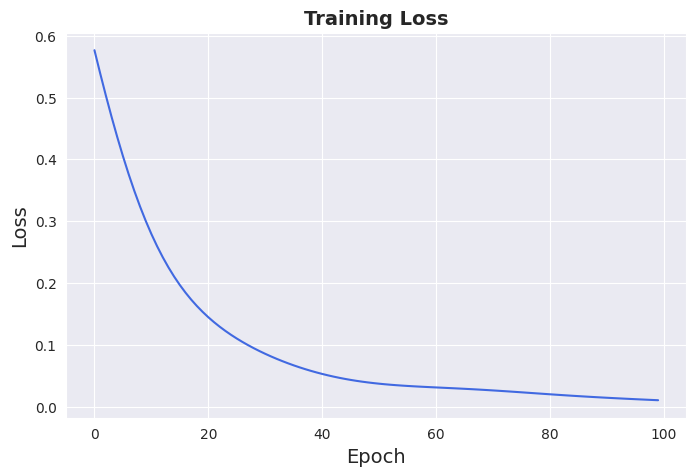

In [106]:
#parameters for Baseline default RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(69)
baseline_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
baseline_rnn = to_device(baseline_rnn, device)

#training and evaluating model
evaluate_single_model(baseline_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# Experimenting with baseline RNN

## Using ReLU as the non-linearity function in RNN

In [107]:
# RNN model with relu as nonlinearity
class RNN_relu(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_relu, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))

        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.31674724817276
Epoch  1 MSE:  0.30672532320022583
Epoch  2 MSE:  0.296908974647522
Epoch  3 MSE:  0.28730157017707825
Epoch  4 MSE:  0.27790629863739014
Epoch  5 MSE:  0.2687261700630188
Epoch  6 MSE:  0.25976383686065674
Epoch  7 MSE:  0.2510218024253845
Epoch  8 MSE:  0.24250216782093048
Epoch  9 MSE:  0.23420687019824982
Epoch  10 MSE:  0.2261374592781067
Epoch  11 MSE:  0.2182951420545578
Epoch  12 MSE:  0.21068094670772552
Epoch  13 MSE:  0.20329543948173523
Epoch  14 MSE:  0.19613893330097198
Epoch  15 MSE:  0.18921135365962982
Epoch  16 MSE:  0.18251235783100128
Epoch  17 MSE:  0.17604120075702667
Epoch  18 MSE:  0.16979685425758362
Epoch  19 MSE:  0.16377794742584229
Epoch  20 MSE:  0.1579827517271042
Epoch  21 MSE:  0.15240925550460815
Epoch  22 MSE:  0.14705514907836914
Epoch  23 MSE:  0.14191780984401703
Epoch  24 MSE:  0.13699427247047424
Epoch  25 MSE:  0.1322813332080841
Epoch  26 MSE:  0.12777554988861084
Epoch  27 MSE:  0.12347318232059479
Epoch  28 MSE

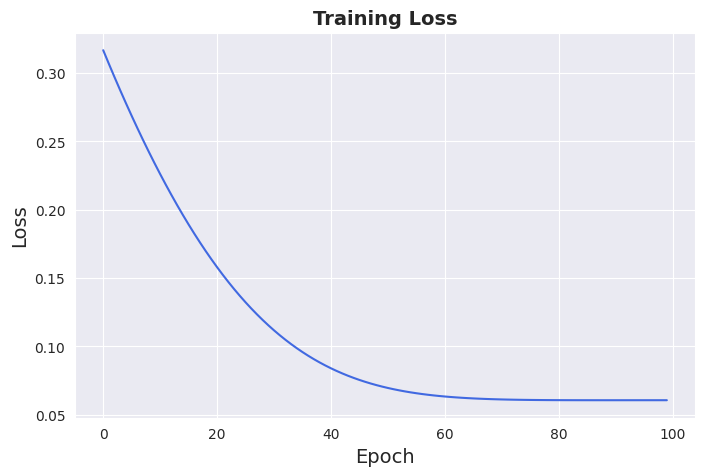

In [108]:
#parameters for RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(69)
relu_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
relu_rnn = to_device(relu_rnn, device)

#training and evaluating model
evaluate_single_model(relu_rnn, num_epochs, lr, loss_type, optimiser, time_step)

## Hyperparameter Tuning with RNN

In [109]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

tanh_results = []
relu_results = []
for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the tanh RNN model
            torch.manual_seed(69)
            tanh_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            tanh_rnn = to_device(tanh_rnn, device)
            #training and evaluating model
            tanh_res = evaluate_model_experiments(tanh_rnn, num_epochs, lr, loss_type, optimiser, time_step)
            tanh_results += [tanh_res.iloc[0]]
            print()

            #declaring the ReLU RNN model
            torch.manual_seed(69)
            relu_rnn_exp = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            relu_rnn_exp = to_device(relu_rnn_exp, device)
            #training and evaluating model
            relu_res = evaluate_model_experiments(relu_rnn_exp, num_epochs, lr, loss_type, optimiser, time_step)
            relu_results += [relu_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1



<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11411910504102707
Epoch  1 MSE:  0.10087820887565613
Epoch  2 MSE:  0.08933954685926437
Epoch  3 MSE:  0.07949987798929214
Epoch  4 MSE:  0.07132455706596375
Epoch  5 MSE:  0.06474039703607559
Epoch  6 MSE:  0.059627335518598557
Epoch  7 MSE:  0.05581120774149895
Epoch  8 MSE:  0.053061459213495255
Epoch  9 MSE:  0.051099251955747604
Epoch  10 MSE:  0.049620140343904495
Epoch  11 MSE:  0.04833057522773743
Epoch  12 MSE:  0.0469883494079113
Epoch  13 MSE:  0.04543247073888779
Epoch  14 MSE:  0.043592240661382675
Epoch  15 MSE:  0.0414762943983078
Epoch  16 MSE:  0.039149995893239975
Epoch  17 MSE:  0.036710090935230255
Epoch  18 MSE:  0.034262530505657196
Epoch  19 MSE:  0.03190544992685318
Epoch  20 MSE:  0.029717406257987022
Epoch  21 MSE:  0.027750110253691673
Epoch  22 MSE:  0.026024870574474335
Epoch  23 MSE:  0.024532485753297806
Epoch  24 MSE:  0.023236624896526337
Epoch  25 MSE:  0.02208089642226696
Epoch  26 MSE:  0.02099922113120556
Epoch  27 MSE:  0.019927937

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.10941636562347412
Epoch  1 MSE:  0.10264703631401062
Epoch  2 MSE:  0.09613275527954102
Epoch  3 MSE:  0.08994249254465103
Epoch  4 MSE:  0.0840720608830452
Epoch  5 MSE:  0.07858715206384659
Epoch  6 MSE:  0.07365059107542038
Epoch  7 MSE:  0.06917955726385117
Epoch  8 MSE:  0.0651911050081253
Epoch  9 MSE:  0.06154278665781021
Epoch  10 MSE:  0.058250732719898224
Epoch  11 MSE:  0.055341191589832306
Epoch  12 MSE:  0.0524124875664711
Epoch  13 MSE:  0.04935513064265251
Epoch  14 MSE:  0.046319570392370224
Epoch  15 MSE:  0.04346621781587601
Epoch  16 MSE:  0.040864404290914536
Epoch  17 MSE:  0.03851287439465523
Epoch  18 MSE:  0.036321476101875305
Epoch  19 MSE:  0.034206926822662354
Epoch  20 MSE:  0.03212850168347359
Epoch  21 MSE:  0.030074071139097214
Epoch  22 MSE:  0.02807501144707203
Epoch  23 MSE:  0.026176882907748222
Epoch  24 MSE:  0.024396859109401703
Epoch  25 MSE:  0.02274426259100437
Epoch  26 MSE:  0.021189086139202118
Epoch  27 MSE:  0.0196912568062

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.08895637840032578
Epoch  1 MSE:  0.07651714980602264
Epoch  2 MSE:  0.0682448074221611
Epoch  3 MSE:  0.06371341645717621
Epoch  4 MSE:  0.06208806112408638
Epoch  5 MSE:  0.062120094895362854
Epoch  6 MSE:  0.062465883791446686
Epoch  7 MSE:  0.06220652163028717
Epoch  8 MSE:  0.061060789972543716
Epoch  9 MSE:  0.05919790640473366
Epoch  10 MSE:  0.05696680396795273
Epoch  11 MSE:  0.05471928045153618
Epoch  12 MSE:  0.05272364988923073
Epoch  13 MSE:  0.05112841725349426
Epoch  14 MSE:  0.04995245859026909
Epoch  15 MSE:  0.04909724369645119
Epoch  16 MSE:  0.04838396981358528
Epoch  17 MSE:  0.04761232063174248
Epoch  18 MSE:  0.046622440218925476
Epoch  19 MSE:  0.045336466282606125
Epoch  20 MSE:  0.043766893446445465
Epoch  21 MSE:  0.04199642315506935
Epoch  22 MSE:  0.040142349898815155
Epoch  23 MSE:  0.03831678256392479
Epoch  24 MSE:  0.03659023344516754
Epoch  25 MSE:  0.034965794533491135
Epoch  26 MSE:  0.033374037593603134
Epoch  27 MSE:  0.031697839498

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06937602907419205
Epoch  1 MSE:  0.06511835753917694
Epoch  2 MSE:  0.06117250770330429
Epoch  3 MSE:  0.05740642547607422
Epoch  4 MSE:  0.054311443120241165
Epoch  5 MSE:  0.051427148282527924
Epoch  6 MSE:  0.048482365906238556
Epoch  7 MSE:  0.045732833445072174
Epoch  8 MSE:  0.04322052001953125
Epoch  9 MSE:  0.04071690887212753
Epoch  10 MSE:  0.038205280900001526
Epoch  11 MSE:  0.03588052839040756
Epoch  12 MSE:  0.03377349302172661
Epoch  13 MSE:  0.03175118565559387
Epoch  14 MSE:  0.029623860493302345
Epoch  15 MSE:  0.027338813990354538
Epoch  16 MSE:  0.02479364722967148
Epoch  17 MSE:  0.022010931745171547
Epoch  18 MSE:  0.019056031480431557
Epoch  19 MSE:  0.01599770225584507
Epoch  20 MSE:  0.012899589724838734
Epoch  21 MSE:  0.009817401878535748
Epoch  22 MSE:  0.006823637988418341
Epoch  23 MSE:  0.00408319802954793
Epoch  24 MSE:  0.0018851545173674822
Epoch  25 MSE:  0.0005177083075977862
Epoch  26 MSE:  0.00015895694377832115
Epoch  27 MSE:  0.0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.07237210124731064
Epoch  1 MSE:  0.0505906380712986
Epoch  2 MSE:  0.03492294251918793
Epoch  3 MSE:  0.026732103899121284
Epoch  4 MSE:  0.026044264435768127
Epoch  5 MSE:  0.029934611171483994
Epoch  6 MSE:  0.03343885764479637
Epoch  7 MSE:  0.03367387875914574
Epoch  8 MSE:  0.03086729161441326
Epoch  9 MSE:  0.026594242081046104
Epoch  10 MSE:  0.022432338446378708
Epoch  11 MSE:  0.019402887672185898
Epoch  12 MSE:  0.017835475504398346
Epoch  13 MSE:  0.017473187297582626
Epoch  14 MSE:  0.01772232912480831
Epoch  15 MSE:  0.017937155440449715
Epoch  16 MSE:  0.01763824187219143
Epoch  17 MSE:  0.0166179072111845
Epoch  18 MSE:  0.01494175661355257
Epoch  19 MSE:  0.01288074254989624
Epoch  20 MSE:  0.010805636644363403
Epoch  21 MSE:  0.009065056219696999
Epoch  22 MSE:  0.007866466417908669
Epoch  23 MSE:  0.007194141857326031
Epoch  24 MSE:  0.006813493091613054
Epoch  25 MSE:  0.006389312446117401
Epoch  26 MSE:  0.005669869482517242
Epoch  27 MSE:  0.004622

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1439758688211441
Epoch  1 MSE:  0.12246549129486084
Epoch  2 MSE:  0.1018998920917511
Epoch  3 MSE:  0.08274432271718979
Epoch  4 MSE:  0.0655546709895134
Epoch  5 MSE:  0.050978872925043106
Epoch  6 MSE:  0.03973388671875
Epoch  7 MSE:  0.032523393630981445
Epoch  8 MSE:  0.029826944693922997
Epoch  9 MSE:  0.03146979585289955
Epoch  10 MSE:  0.03605513274669647
Epoch  11 MSE:  0.040978945791721344
Epoch  12 MSE:  0.04378054291009903
Epoch  13 MSE:  0.04353092983365059
Epoch  14 MSE:  0.04075516760349274
Epoch  15 MSE:  0.03661129251122475
Epoch  16 MSE:  0.032245486974716187
Epoch  17 MSE:  0.02848290279507637
Epoch  18 MSE:  0.025749754160642624
Epoch  19 MSE:  0.024122843518853188
Epoch  20 MSE:  0.023435596376657486
Epoch  21 MSE:  0.02339271642267704
Epoch  22 MSE:  0.023665618151426315
Epoch  23 MSE:  0.023957762867212296
Epoch  24 MSE:  0.024041252210736275
Epoch  25 MSE:  0.023771492764353752
Epoch  26 MSE:  0.023087531328201294
Epoch  27 MSE:  0.0220037717372

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1680736094713211
Epoch  1 MSE:  0.12184533476829529
Epoch  2 MSE:  0.09285327792167664
Epoch  3 MSE:  0.07981938123703003
Epoch  4 MSE:  0.0786348506808281
Epoch  5 MSE:  0.08266407251358032
Epoch  6 MSE:  0.0861247330904007
Epoch  7 MSE:  0.08666441589593887
Epoch  8 MSE:  0.08425849676132202
Epoch  9 MSE:  0.07984541356563568
Epoch  10 MSE:  0.07456483691930771
Epoch  11 MSE:  0.0694090723991394
Epoch  12 MSE:  0.06508277356624603
Epoch  13 MSE:  0.061959072947502136
Epoch  14 MSE:  0.060085538774728775
Epoch  15 MSE:  0.05922778323292732
Epoch  16 MSE:  0.05895315855741501
Epoch  17 MSE:  0.05875448137521744
Epoch  18 MSE:  0.05819247290492058
Epoch  19 MSE:  0.057010386139154434
Epoch  20 MSE:  0.05517777055501938
Epoch  21 MSE:  0.05285564437508583
Epoch  22 MSE:  0.050310879945755005
Epoch  23 MSE:  0.04781866446137428
Epoch  24 MSE:  0.04558311402797699
Epoch  25 MSE:  0.043690916150808334
Epoch  26 MSE:  0.04209953919053078
Epoch  27 MSE:  0.040655508637428284


<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.20071344077587128
Epoch  1 MSE:  0.15068833529949188
Epoch  2 MSE:  0.11697764694690704
Epoch  3 MSE:  0.09476805478334427
Epoch  4 MSE:  0.08049317449331284
Epoch  5 MSE:  0.07166852056980133
Epoch  6 MSE:  0.06659173220396042
Epoch  7 MSE:  0.06546536087989807
Epoch  8 MSE:  0.06493592262268066
Epoch  9 MSE:  0.06416317820549011
Epoch  10 MSE:  0.06396900117397308
Epoch  11 MSE:  0.06412165611982346
Epoch  12 MSE:  0.06431474536657333
Epoch  13 MSE:  0.06443866342306137
Epoch  14 MSE:  0.06443271040916443
Epoch  15 MSE:  0.06434216350317001
Epoch  16 MSE:  0.06388525664806366
Epoch  17 MSE:  0.0631832405924797
Epoch  18 MSE:  0.06226899102330208
Epoch  19 MSE:  0.061123643070459366
Epoch  20 MSE:  0.05976560339331627
Epoch  21 MSE:  0.058216821402311325
Epoch  22 MSE:  0.056496329605579376
Epoch  23 MSE:  0.05462798848748207
Epoch  24 MSE:  0.05265152081847191
Epoch  25 MSE:  0.05056190863251686
Epoch  26 MSE:  0.048353079706430435
Epoch  27 MSE:  0.04603537172079086

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.16259051859378815
Epoch  1 MSE:  0.10435614734888077
Epoch  2 MSE:  0.06544597446918488
Epoch  3 MSE:  0.04586489126086235
Epoch  4 MSE:  0.04294249415397644
Epoch  5 MSE:  0.04951590299606323
Epoch  6 MSE:  0.056295670568943024
Epoch  7 MSE:  0.058319270610809326
Epoch  8 MSE:  0.055728279054164886
Epoch  9 MSE:  0.050538450479507446
Epoch  10 MSE:  0.044742152094841
Epoch  11 MSE:  0.0397334098815918
Epoch  12 MSE:  0.036232493817806244
Epoch  13 MSE:  0.03436686843633652
Epoch  14 MSE:  0.03382088616490364
Epoch  15 MSE:  0.03402248024940491
Epoch  16 MSE:  0.03433826193213463
Epoch  17 MSE:  0.03424697741866112
Epoch  18 MSE:  0.033453937619924545
Epoch  19 MSE:  0.03192039579153061
Epoch  20 MSE:  0.02981763333082199
Epoch  21 MSE:  0.027440445497632027
Epoch  22 MSE:  0.025111818686127663
Epoch  23 MSE:  0.02309640496969223
Epoch  24 MSE:  0.021530279889702797
Epoch  25 MSE:  0.02037620171904564
Epoch  26 MSE:  0.019423680379986763
Epoch  27 MSE:  0.0183584019541

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.21286813914775848
Epoch  1 MSE:  0.15388114750385284
Epoch  2 MSE:  0.11183778941631317
Epoch  3 MSE:  0.08291411399841309
Epoch  4 MSE:  0.06431018561124802
Epoch  5 MSE:  0.052898187190294266
Epoch  6 MSE:  0.04693042114377022
Epoch  7 MSE:  0.044870976358652115
Epoch  8 MSE:  0.04512028023600578
Epoch  9 MSE:  0.04633484035730362
Epoch  10 MSE:  0.046911146491765976
Epoch  11 MSE:  0.046229567378759384
Epoch  12 MSE:  0.04426625743508339
Epoch  13 MSE:  0.04135489836335182
Epoch  14 MSE:  0.0380372628569603
Epoch  15 MSE:  0.03489239141345024
Epoch  16 MSE:  0.032408908009529114
Epoch  17 MSE:  0.030876994132995605
Epoch  18 MSE:  0.030252594500780106
Epoch  19 MSE:  0.030053503811359406
Epoch  20 MSE:  0.0295263584703207
Epoch  21 MSE:  0.02811540476977825
Epoch  22 MSE:  0.025864163413643837
Epoch  23 MSE:  0.02327108010649681
Epoch  24 MSE:  0.020860683172941208
Epoch  25 MSE:  0.01890053227543831
Epoch  26 MSE:  0.01744414120912552
Epoch  27 MSE:  0.016380259767

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3333757221698761
Epoch  1 MSE:  0.1706540435552597
Epoch  2 MSE:  0.07523736357688904
Epoch  3 MSE:  0.0592096745967865
Epoch  4 MSE:  0.09144411981105804
Epoch  5 MSE:  0.10941585153341293
Epoch  6 MSE:  0.10092151165008545
Epoch  7 MSE:  0.07968126237392426
Epoch  8 MSE:  0.05978630855679512
Epoch  9 MSE:  0.0497455894947052
Epoch  10 MSE:  0.05103238672018051
Epoch  11 MSE:  0.05853968858718872
Epoch  12 MSE:  0.06465652585029602
Epoch  13 MSE:  0.06540285050868988
Epoch  14 MSE:  0.06131121888756752
Epoch  15 MSE:  0.054973065853118896
Epoch  16 MSE:  0.04899681732058525
Epoch  17 MSE:  0.04502425342798233
Epoch  18 MSE:  0.04349656403064728
Epoch  19 MSE:  0.043873369693756104
Epoch  20 MSE:  0.04507577791810036
Epoch  21 MSE:  0.04597734287381172
Epoch  22 MSE:  0.04580280929803848
Epoch  23 MSE:  0.04432942345738411
Epoch  24 MSE:  0.04185668006539345
Epoch  25 MSE:  0.03899762034416199
Epoch  26 MSE:  0.03639557212591171
Epoch  27 MSE:  0.03447411581873894
Epoc

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.13263781368732452
Epoch  1 MSE:  0.10517671704292297
Epoch  2 MSE:  0.08428020030260086
Epoch  3 MSE:  0.06772977858781815
Epoch  4 MSE:  0.05717644467949867
Epoch  5 MSE:  0.052078645676374435
Epoch  6 MSE:  0.053425293415784836
Epoch  7 MSE:  0.05864381417632103
Epoch  8 MSE:  0.0629822164773941
Epoch  9 MSE:  0.06360498070716858
Epoch  10 MSE:  0.06094222888350487
Epoch  11 MSE:  0.05672740563750267
Epoch  12 MSE:  0.052565984427928925
Epoch  13 MSE:  0.04943505674600601
Epoch  14 MSE:  0.04764373600482941
Epoch  15 MSE:  0.04700818285346031
Epoch  16 MSE:  0.0471075065433979
Epoch  17 MSE:  0.04746398329734802
Epoch  18 MSE:  0.04766237363219261
Epoch  19 MSE:  0.047423310577869415
Epoch  20 MSE:  0.04657082259654999
Epoch  21 MSE:  0.04506856948137283
Epoch  22 MSE:  0.04303564503788948
Epoch  23 MSE:  0.04070643335580826
Epoch  24 MSE:  0.03840608522295952
Epoch  25 MSE:  0.036388397216796875
Epoch  26 MSE:  0.0347461998462677
Epoch  27 MSE:  0.03330010920763016


<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.05759475752711296
Epoch  1 MSE:  0.047592781484127045
Epoch  2 MSE:  0.03929057717323303
Epoch  3 MSE:  0.026262614876031876
Epoch  4 MSE:  0.018136058002710342
Epoch  5 MSE:  0.012362813577055931
Epoch  6 MSE:  0.0019396081333979964
Epoch  7 MSE:  0.004881751257926226
Epoch  8 MSE:  0.008039798587560654
Epoch  9 MSE:  0.007396835368126631
Epoch  10 MSE:  0.004217087756842375
Epoch  11 MSE:  0.0004955051117576659
Epoch  12 MSE:  0.0005722557543776929
Epoch  13 MSE:  0.001987772760912776
Epoch  14 MSE:  0.0027983933687210083
Epoch  15 MSE:  0.003108206670731306
Epoch  16 MSE:  0.0033092668745666742
Epoch  17 MSE:  0.003281662706285715
Epoch  18 MSE:  0.0027355370111763477
Epoch  19 MSE:  0.001775211887434125
Epoch  20 MSE:  0.0009027246851474047
Epoch  21 MSE:  0.00046894894330762327
Epoch  22 MSE:  0.00034074721042998135
Epoch  23 MSE:  0.0003503799671307206
Epoch  24 MSE:  0.0006810848135501146
Epoch  25 MSE:  0.0012097302824258804
Epoch  26 MSE:  0.001301660086028277

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06095150113105774
Epoch  1 MSE:  0.048517752438783646
Epoch  2 MSE:  0.04016673192381859
Epoch  3 MSE:  0.03643123805522919
Epoch  4 MSE:  0.034984197467565536
Epoch  5 MSE:  0.03082880936563015
Epoch  6 MSE:  0.024289242923259735
Epoch  7 MSE:  0.018272891640663147
Epoch  8 MSE:  0.014429500326514244
Epoch  9 MSE:  0.011050060391426086
Epoch  10 MSE:  0.005478158593177795
Epoch  11 MSE:  0.000820381217636168
Epoch  12 MSE:  0.0025416668504476547
Epoch  13 MSE:  0.0043967594392597675
Epoch  14 MSE:  0.004439400043338537
Epoch  15 MSE:  0.005717880092561245
Epoch  16 MSE:  0.006011125631630421
Epoch  17 MSE:  0.004216463770717382
Epoch  18 MSE:  0.0019696184899657965
Epoch  19 MSE:  0.0009001816506497562
Epoch  20 MSE:  0.0010048310505226254
Epoch  21 MSE:  0.0012183472281321883
Epoch  22 MSE:  0.001142539898864925
Epoch  23 MSE:  0.0012066379422321916
Epoch  24 MSE:  0.0016150128794834018
Epoch  25 MSE:  0.002066509099677205
Epoch  26 MSE:  0.002186458557844162
Epoch  

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3026497960090637
Epoch  1 MSE:  0.08593717217445374
Epoch  2 MSE:  0.0671689435839653
Epoch  3 MSE:  0.091374471783638
Epoch  4 MSE:  0.06355422735214233
Epoch  5 MSE:  0.04285157471895218
Epoch  6 MSE:  0.043162956833839417
Epoch  7 MSE:  0.05005156621336937
Epoch  8 MSE:  0.05230234935879707
Epoch  9 MSE:  0.04801070690155029
Epoch  10 MSE:  0.03951527923345566
Epoch  11 MSE:  0.03016972728073597
Epoch  12 MSE:  0.023145556449890137
Epoch  13 MSE:  0.020373012870550156
Epoch  14 MSE:  0.020674852654337883
Epoch  15 MSE:  0.01908254437148571
Epoch  16 MSE:  0.011681151576340199
Epoch  17 MSE:  0.0027994613628834486
Epoch  18 MSE:  0.003808873239904642
Epoch  19 MSE:  0.01280661765486002
Epoch  20 MSE:  0.011057603172957897
Epoch  21 MSE:  0.0035507797729223967
Epoch  22 MSE:  0.0012266251724213362
Epoch  23 MSE:  0.0035420453641563654
Epoch  24 MSE:  0.005599288269877434
Epoch  25 MSE:  0.0054801469668745995
Epoch  26 MSE:  0.004110473673790693
Epoch  27 MSE:  0.00295

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.15806609392166138
Epoch  1 MSE:  0.12081775069236755
Epoch  2 MSE:  0.09420392662286758
Epoch  3 MSE:  0.07755397260189056
Epoch  4 MSE:  0.0665925145149231
Epoch  5 MSE:  0.05892486497759819
Epoch  6 MSE:  0.05306369438767433
Epoch  7 MSE:  0.049808599054813385
Epoch  8 MSE:  0.0517926849424839
Epoch  9 MSE:  0.05599602311849594
Epoch  10 MSE:  0.05684973672032356
Epoch  11 MSE:  0.05211126059293747
Epoch  12 MSE:  0.04718111455440521
Epoch  13 MSE:  0.04408884793519974
Epoch  14 MSE:  0.04107226803898811
Epoch  15 MSE:  0.037683386355638504
Epoch  16 MSE:  0.03352854400873184
Epoch  17 MSE:  0.02850273810327053
Epoch  18 MSE:  0.022937854751944542
Epoch  19 MSE:  0.017440566793084145
Epoch  20 MSE:  0.01290307380259037
Epoch  21 MSE:  0.009942874312400818
Epoch  22 MSE:  0.0077141206711530685
Epoch  23 MSE:  0.005881199147552252
Epoch  24 MSE:  0.005726155824959278
Epoch  25 MSE:  0.006315793842077255
Epoch  26 MSE:  0.005735491402447224
Epoch  27 MSE:  0.00553343305

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.4395585358142853
Epoch  1 MSE:  0.1861799657344818
Epoch  2 MSE:  0.06287377327680588
Epoch  3 MSE:  0.04853316396474838
Epoch  4 MSE:  0.0783437192440033
Epoch  5 MSE:  0.04774760082364082
Epoch  6 MSE:  0.0313105434179306
Epoch  7 MSE:  0.03731106221675873
Epoch  8 MSE:  0.044545456767082214
Epoch  9 MSE:  0.041863393038511276
Epoch  10 MSE:  0.030994029715657234
Epoch  11 MSE:  0.019381176680326462
Epoch  12 MSE:  0.015539202839136124
Epoch  13 MSE:  0.02112789824604988
Epoch  14 MSE:  0.019977495074272156
Epoch  15 MSE:  0.008527537807822227
Epoch  16 MSE:  0.0029234562534838915
Epoch  17 MSE:  0.007598784752190113
Epoch  18 MSE:  0.010816778056323528
Epoch  19 MSE:  0.005034373141825199
Epoch  20 MSE:  0.0005571111105382442
Epoch  21 MSE:  0.005633649416267872
Epoch  22 MSE:  0.007464705966413021
Epoch  23 MSE:  0.002225268865004182
Epoch  24 MSE:  0.00022229512978810817
Epoch  25 MSE:  0.00234742509201169
Epoch  26 MSE:  0.003989813849329948
Epoch  27 MSE:  0.003

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3576602041721344
Epoch  1 MSE:  0.24597050249576569
Epoch  2 MSE:  0.15572883188724518
Epoch  3 MSE:  0.07977220416069031
Epoch  4 MSE:  0.039214663207530975
Epoch  5 MSE:  0.10471514612436295
Epoch  6 MSE:  0.06938323378562927
Epoch  7 MSE:  0.040275610983371735
Epoch  8 MSE:  0.03535863384604454
Epoch  9 MSE:  0.03939579799771309
Epoch  10 MSE:  0.04370759800076485
Epoch  11 MSE:  0.045125652104616165
Epoch  12 MSE:  0.043473873287439346
Epoch  13 MSE:  0.03963213041424751
Epoch  14 MSE:  0.03473241254687309
Epoch  15 MSE:  0.02985442988574505
Epoch  16 MSE:  0.025863831862807274
Epoch  17 MSE:  0.0233432799577713
Epoch  18 MSE:  0.022617248818278313
Epoch  19 MSE:  0.022709118202328682
Epoch  20 MSE:  0.02284150756895542
Epoch  21 MSE:  0.022333785891532898
Epoch  22 MSE:  0.020834675058722496
Epoch  23 MSE:  0.01835443638265133
Epoch  24 MSE:  0.014939638786017895
Epoch  25 MSE:  0.011426033452153206
Epoch  26 MSE:  0.008914627134799957
Epoch  27 MSE:  0.0087295491

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.30111655592918396
Epoch  1 MSE:  0.04951004311442375
Epoch  2 MSE:  0.06486755609512329
Epoch  3 MSE:  0.042998917400836945
Epoch  4 MSE:  0.04544979706406593
Epoch  5 MSE:  0.01914459653198719
Epoch  6 MSE:  0.032287709414958954
Epoch  7 MSE:  0.0028914131689816713
Epoch  8 MSE:  0.026140067726373672
Epoch  9 MSE:  0.003249246161431074
Epoch  10 MSE:  0.0140735674649477
Epoch  11 MSE:  0.007105558179318905
Epoch  12 MSE:  0.002242844318971038
Epoch  13 MSE:  0.009646098129451275
Epoch  14 MSE:  0.009380859322845936
Epoch  15 MSE:  0.0031140849459916353
Epoch  16 MSE:  0.002492920495569706
Epoch  17 MSE:  0.005949070211499929
Epoch  18 MSE:  0.002970214933156967
Epoch  19 MSE:  0.0006466724444180727
Epoch  20 MSE:  0.003918161150068045
Epoch  21 MSE:  0.004114221315830946
Epoch  22 MSE:  0.0008713211864233017
Epoch  23 MSE:  0.0006667093839496374
Epoch  24 MSE:  0.0026495137717574835
Epoch  25 MSE:  0.002289255615323782
Epoch  26 MSE:  0.0008467103471048176
Epoch  27 M

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2398180067539215
Epoch  1 MSE:  0.13057909905910492
Epoch  2 MSE:  0.06044267117977142
Epoch  3 MSE:  0.11401653289794922
Epoch  4 MSE:  0.06269670277833939
Epoch  5 MSE:  0.049016401171684265
Epoch  6 MSE:  0.053621210157871246
Epoch  7 MSE:  0.05554316192865372
Epoch  8 MSE:  0.05045516416430473
Epoch  9 MSE:  0.04118882492184639
Epoch  10 MSE:  0.03373994678258896
Epoch  11 MSE:  0.03673095628619194
Epoch  12 MSE:  0.034659963101148605
Epoch  13 MSE:  0.025408128276467323
Epoch  14 MSE:  0.02196061611175537
Epoch  15 MSE:  0.02044755220413208
Epoch  16 MSE:  0.01569361798465252
Epoch  17 MSE:  0.006747542414814234
Epoch  18 MSE:  0.00705863768234849
Epoch  19 MSE:  0.0033266344107687473
Epoch  20 MSE:  0.0031876435969024897
Epoch  21 MSE:  0.005573207978159189
Epoch  22 MSE:  0.002823114627972245
Epoch  23 MSE:  0.0057803187519311905
Epoch  24 MSE:  0.0021439946722239256
Epoch  25 MSE:  0.0030141419265419245
Epoch  26 MSE:  0.0030437251552939415
Epoch  27 MSE:  0.00

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11363940685987473
Epoch  1 MSE:  0.10045904666185379
Epoch  2 MSE:  0.08897871524095535
Epoch  3 MSE:  0.07919499278068542
Epoch  4 MSE:  0.07107283174991608
Epoch  5 MSE:  0.06453840434551239
Epoch  6 MSE:  0.0594705231487751
Epoch  7 MSE:  0.05569346994161606
Epoch  8 MSE:  0.052974820137023926
Epoch  9 MSE:  0.05103394389152527
Epoch  10 MSE:  0.04956536367535591
Epoch  11 MSE:  0.04827588424086571
Epoch  12 MSE:  0.04692535474896431
Epoch  13 MSE:  0.045356087386608124
Epoch  14 MSE:  0.04350108653306961
Epoch  15 MSE:  0.04137226566672325
Epoch  16 MSE:  0.039037302136421204
Epoch  17 MSE:  0.036594223231077194
Epoch  18 MSE:  0.034149255603551865
Epoch  19 MSE:  0.03179999068379402
Epoch  20 MSE:  0.02962382324039936
Epoch  21 MSE:  0.027670878916978836
Epoch  22 MSE:  0.025960594415664673
Epoch  23 MSE:  0.02448183298110962
Epoch  24 MSE:  0.0231965072453022
Epoch  25 MSE:  0.022046955302357674
Epoch  26 MSE:  0.020966576412320137
Epoch  27 MSE:  0.0198921170085

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.10899471491575241
Epoch  1 MSE:  0.1022346168756485
Epoch  2 MSE:  0.09572970122098923
Epoch  3 MSE:  0.08954911679029465
Epoch  4 MSE:  0.08368861675262451
Epoch  5 MSE:  0.07821410149335861
Epoch  6 MSE:  0.07328880578279495
Epoch  7 MSE:  0.06882966309785843
Epoch  8 MSE:  0.06485377997159958
Epoch  9 MSE:  0.06121831759810448
Epoch  10 MSE:  0.05793946236371994
Epoch  11 MSE:  0.05504351109266281
Epoch  12 MSE:  0.05212775245308876
Epoch  13 MSE:  0.04908241331577301
Epoch  14 MSE:  0.04605831950902939
Epoch  15 MSE:  0.043216295540332794
Epoch  16 MSE:  0.04062582552433014
Epoch  17 MSE:  0.038285646587610245
Epoch  18 MSE:  0.03610534593462944
Epoch  19 MSE:  0.034001439809799194
Epoch  20 MSE:  0.031933095306158066
Epoch  21 MSE:  0.029888156801462173
Epoch  22 MSE:  0.027898000553250313
Epoch  23 MSE:  0.02600851282477379
Epoch  24 MSE:  0.024236923083662987
Epoch  25 MSE:  0.02259249798953533
Epoch  26 MSE:  0.021045105531811714
Epoch  27 MSE:  0.0195545479655

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.08909480273723602
Epoch  1 MSE:  0.07658006250858307
Epoch  2 MSE:  0.0682360902428627
Epoch  3 MSE:  0.06364092975854874
Epoch  4 MSE:  0.06196915730834007
Epoch  5 MSE:  0.06198447570204735
Epoch  6 MSE:  0.06234642118215561
Epoch  7 MSE:  0.062123194336891174
Epoch  8 MSE:  0.06101506948471069
Epoch  9 MSE:  0.05917846038937569
Epoch  10 MSE:  0.05695733428001404
Epoch  11 MSE:  0.05470411106944084
Epoch  12 MSE:  0.05269109457731247
Epoch  13 MSE:  0.0510728619992733
Epoch  14 MSE:  0.049875449389219284
Epoch  15 MSE:  0.04900712892413139
Epoch  16 MSE:  0.04829365760087967
Epoch  17 MSE:  0.04753521457314491
Epoch  18 MSE:  0.04656815156340599
Epoch  19 MSE:  0.04530813917517662
Epoch  20 MSE:  0.043760985136032104
Epoch  21 MSE:  0.04200458154082298
Epoch  22 MSE:  0.04015441611409187
Epoch  23 MSE:  0.03832423314452171
Epoch  24 MSE:  0.036589283496141434
Epoch  25 MSE:  0.03495931997895241
Epoch  26 MSE:  0.03337126597762108
Epoch  27 MSE:  0.031710878014564514

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06926308572292328
Epoch  1 MSE:  0.06505941599607468
Epoch  2 MSE:  0.061054058372974396
Epoch  3 MSE:  0.05729921534657478
Epoch  4 MSE:  0.05422937124967575
Epoch  5 MSE:  0.05131852999329567
Epoch  6 MSE:  0.04835722595453262
Epoch  7 MSE:  0.045618291944265366
Epoch  8 MSE:  0.043116495013237
Epoch  9 MSE:  0.04061105102300644
Epoch  10 MSE:  0.038096219301223755
Epoch  11 MSE:  0.03577897325158119
Epoch  12 MSE:  0.03368944674730301
Epoch  13 MSE:  0.031685151159763336
Epoch  14 MSE:  0.029568761587142944
Epoch  15 MSE:  0.027287358418107033
Epoch  16 MSE:  0.024739887565374374
Epoch  17 MSE:  0.021958379074931145
Epoch  18 MSE:  0.019010212272405624
Epoch  19 MSE:  0.015959888696670532
Epoch  20 MSE:  0.01286525558680296
Epoch  21 MSE:  0.009778064675629139
Epoch  22 MSE:  0.006773954723030329
Epoch  23 MSE:  0.004027894698083401
Epoch  24 MSE:  0.0018353697378188372
Epoch  25 MSE:  0.00048654500278644264
Epoch  26 MSE:  0.00017513037892058492
Epoch  27 MSE:  0.0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.07255933433771133
Epoch  1 MSE:  0.050711002200841904
Epoch  2 MSE:  0.0349775068461895
Epoch  3 MSE:  0.026725472882390022
Epoch  4 MSE:  0.02599456161260605
Epoch  5 MSE:  0.029884938150644302
Epoch  6 MSE:  0.03343122452497482
Epoch  7 MSE:  0.033714912831783295
Epoch  8 MSE:  0.0309380441904068
Epoch  9 MSE:  0.02667040005326271
Epoch  10 MSE:  0.022495482116937637
Epoch  11 MSE:  0.019444875419139862
Epoch  12 MSE:  0.01785857416689396
Epoch  13 MSE:  0.017487166449427605
Epoch  14 MSE:  0.01773977465927601
Epoch  15 MSE:  0.017969002947211266
Epoch  16 MSE:  0.017690815031528473
Epoch  17 MSE:  0.016691824421286583
Epoch  18 MSE:  0.015032412484288216
Epoch  19 MSE:  0.01297981571406126
Epoch  20 MSE:  0.010903413407504559
Epoch  21 MSE:  0.009153333492577076
Epoch  22 MSE:  0.007941567339003086
Epoch  23 MSE:  0.007258867844939232
Epoch  24 MSE:  0.006876187864691019
Epoch  25 MSE:  0.006459387950599194
Epoch  26 MSE:  0.005751886870712042
Epoch  27 MSE:  0.0047

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1443445235490799
Epoch  1 MSE:  0.12278249114751816
Epoch  2 MSE:  0.1021626889705658
Epoch  3 MSE:  0.08295084536075592
Epoch  4 MSE:  0.06570335477590561
Epoch  5 MSE:  0.05106886476278305
Epoch  6 MSE:  0.039765700697898865
Epoch  7 MSE:  0.032500237226486206
Epoch  8 MSE:  0.02975746989250183
Epoch  9 MSE:  0.03137224540114403
Epoch  10 MSE:  0.03595899045467377
Epoch  11 MSE:  0.04091416671872139
Epoch  12 MSE:  0.043759629130363464
Epoch  13 MSE:  0.0435461588203907
Epoch  14 MSE:  0.04078931733965874
Epoch  15 MSE:  0.03664764016866684
Epoch  16 MSE:  0.03227252513170242
Epoch  17 MSE:  0.028495347127318382
Epoch  18 MSE:  0.02574753947556019
Epoch  19 MSE:  0.024109501391649246
Epoch  20 MSE:  0.023416422307491302
Epoch  21 MSE:  0.02337336167693138
Epoch  22 MSE:  0.023651123046875
Epoch  23 MSE:  0.023952042683959007
Epoch  24 MSE:  0.024046890437602997
Epoch  25 MSE:  0.02378975972533226
Epoch  26 MSE:  0.023118499666452408
Epoch  27 MSE:  0.0220464318990707

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.16742940247058868
Epoch  1 MSE:  0.1213325634598732
Epoch  2 MSE:  0.09247980266809464
Epoch  3 MSE:  0.07958193123340607
Epoch  4 MSE:  0.07849813997745514
Epoch  5 MSE:  0.08255579322576523
Epoch  6 MSE:  0.08598903566598892
Epoch  7 MSE:  0.08648130297660828
Epoch  8 MSE:  0.08403270691633224
Epoch  9 MSE:  0.07959426194429398
Epoch  10 MSE:  0.07430972158908844
Epoch  11 MSE:  0.06917010247707367
Epoch  12 MSE:  0.06487523019313812
Epoch  13 MSE:  0.061790987849235535
Epoch  14 MSE:  0.059956274926662445
Epoch  15 MSE:  0.05912813916802406
Epoch  16 MSE:  0.058867570012807846
Epoch  17 MSE:  0.05866545811295509
Epoch  18 MSE:  0.058085955679416656
Epoch  19 MSE:  0.05687994882464409
Epoch  20 MSE:  0.05502580106258392
Epoch  21 MSE:  0.052691489458084106
Epoch  22 MSE:  0.05014718323945999
Epoch  23 MSE:  0.04766738787293434
Epoch  24 MSE:  0.0454522967338562
Epoch  25 MSE:  0.043582793325185776
Epoch  26 MSE:  0.04201021045446396
Epoch  27 MSE:  0.0405762009322643

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2000434249639511
Epoch  1 MSE:  0.1501179337501526
Epoch  2 MSE:  0.11649935692548752
Epoch  3 MSE:  0.0943729504942894
Epoch  4 MSE:  0.08017200231552124
Epoch  5 MSE:  0.07141201943159103
Epoch  6 MSE:  0.06638859212398529
Epoch  7 MSE:  0.06529320031404495
Epoch  8 MSE:  0.064804308116436
Epoch  9 MSE:  0.06402948498725891
Epoch  10 MSE:  0.06409328430891037
Epoch  11 MSE:  0.06442978978157043
Epoch  12 MSE:  0.06492099910974503
Epoch  13 MSE:  0.06473038345575333
Epoch  14 MSE:  0.06446772813796997
Epoch  15 MSE:  0.06449573487043381
Epoch  16 MSE:  0.06419649720191956
Epoch  17 MSE:  0.0635073184967041
Epoch  18 MSE:  0.06256214529275894
Epoch  19 MSE:  0.06148739159107208
Epoch  20 MSE:  0.060255542397499084
Epoch  21 MSE:  0.05886926129460335
Epoch  22 MSE:  0.05728508532047272
Epoch  23 MSE:  0.05552045628428459
Epoch  24 MSE:  0.0536324605345726
Epoch  25 MSE:  0.051687080413103104
Epoch  26 MSE:  0.049700185656547546
Epoch  27 MSE:  0.0476299412548542
Epoch  

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.16300860047340393
Epoch  1 MSE:  0.10462194681167603
Epoch  2 MSE:  0.06556810438632965
Epoch  3 MSE:  0.04585844650864601
Epoch  4 MSE:  0.042845893651247025
Epoch  5 MSE:  0.04940130561590195
Epoch  6 MSE:  0.05622633174061775
Epoch  7 MSE:  0.058309756219387054
Epoch  8 MSE:  0.05576236918568611
Epoch  9 MSE:  0.05059269070625305
Epoch  10 MSE:  0.04479610174894333
Epoch  11 MSE:  0.03977286443114281
Epoch  12 MSE:  0.03625050559639931
Epoch  13 MSE:  0.03436386212706566
Epoch  14 MSE:  0.03380367532372475
Epoch  15 MSE:  0.03400216996669769
Epoch  16 MSE:  0.03432738408446312
Epoch  17 MSE:  0.0342562235891819
Epoch  18 MSE:  0.03348960727453232
Epoch  19 MSE:  0.03198331594467163
Epoch  20 MSE:  0.029903633520007133
Epoch  21 MSE:  0.027541832998394966
Epoch  22 MSE:  0.025219500064849854
Epoch  23 MSE:  0.023202471435070038
Epoch  24 MSE:  0.021630849689245224
Epoch  25 MSE:  0.02047397755086422
Epoch  26 MSE:  0.01952870562672615
Epoch  27 MSE:  0.01848519966006

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.21339824795722961
Epoch  1 MSE:  0.1542809158563614
Epoch  2 MSE:  0.11211591213941574
Epoch  3 MSE:  0.08308669924736023
Epoch  4 MSE:  0.06439487636089325
Epoch  5 MSE:  0.05291169509291649
Epoch  6 MSE:  0.04689047113060951
Epoch  7 MSE:  0.04479953646659851
Epoch  8 MSE:  0.04504459351301193
Epoch  9 MSE:  0.046275410801172256
Epoch  10 MSE:  0.046871382743120193
Epoch  11 MSE:  0.04621290788054466
Epoch  12 MSE:  0.04427081719040871
Epoch  13 MSE:  0.04137423262000084
Epoch  14 MSE:  0.03806324303150177
Epoch  15 MSE:  0.03491710498929024
Epoch  16 MSE:  0.03242585062980652
Epoch  17 MSE:  0.030883299186825752
Epoch  18 MSE:  0.030252568423748016
Epoch  19 MSE:  0.03005995787680149
Epoch  20 MSE:  0.02955450676381588
Epoch  21 MSE:  0.028169099241495132
Epoch  22 MSE:  0.025937091559171677
Epoch  23 MSE:  0.02335456572473049
Epoch  24 MSE:  0.020948629826307297
Epoch  25 MSE:  0.018989596515893936
Epoch  26 MSE:  0.017528021708130836
Epoch  27 MSE:  0.016451770439

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3341405987739563
Epoch  1 MSE:  0.17109479010105133
Epoch  2 MSE:  0.07535157352685928
Epoch  3 MSE:  0.05904097482562065
Epoch  4 MSE:  0.09125719964504242
Epoch  5 MSE:  0.10941372811794281
Epoch  6 MSE:  0.10105794668197632
Epoch  7 MSE:  0.07984320819377899
Epoch  8 MSE:  0.05987494811415672
Epoch  9 MSE:  0.04971498250961304
Epoch  10 MSE:  0.05090925842523575
Epoch  11 MSE:  0.05840758606791496
Epoch  12 MSE:  0.06458236277103424
Epoch  13 MSE:  0.06539488583803177
Epoch  14 MSE:  0.061342984437942505
Epoch  15 MSE:  0.05501234531402588
Epoch  16 MSE:  0.04902031272649765
Epoch  17 MSE:  0.04502174258232117
Epoch  18 MSE:  0.043469954282045364
Epoch  19 MSE:  0.04383345693349838
Epoch  20 MSE:  0.04503791779279709
Epoch  21 MSE:  0.0459565706551075
Epoch  22 MSE:  0.045809123665094376
Epoch  23 MSE:  0.04436483979225159
Epoch  24 MSE:  0.04191524535417557
Epoch  25 MSE:  0.03906828910112381
Epoch  26 MSE:  0.03646696358919144
Epoch  27 MSE:  0.0345393642783165
Ep

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.13298271596431732
Epoch  1 MSE:  0.10543587803840637
Epoch  2 MSE:  0.08445306867361069
Epoch  3 MSE:  0.0678161010146141
Epoch  4 MSE:  0.05717620998620987
Epoch  5 MSE:  0.05199594423174858
Epoch  6 MSE:  0.05328494310379028
Epoch  7 MSE:  0.05850524455308914
Epoch  8 MSE:  0.06290002167224884
Epoch  9 MSE:  0.06358274817466736
Epoch  10 MSE:  0.06095312908291817
Epoch  11 MSE:  0.05674199387431145
Epoch  12 MSE:  0.05256447568535805
Epoch  13 MSE:  0.04940928891301155
Epoch  14 MSE:  0.047596272081136703
Epoch  15 MSE:  0.046947091817855835
Epoch  16 MSE:  0.04704311862587929
Epoch  17 MSE:  0.047406431287527084
Epoch  18 MSE:  0.04761923849582672
Epoch  19 MSE:  0.04739900305867195
Epoch  20 MSE:  0.04657233878970146
Epoch  21 MSE:  0.045097678899765015
Epoch  22 MSE:  0.04308915138244629
Epoch  23 MSE:  0.04077484458684921
Epoch  24 MSE:  0.038477275520563126
Epoch  25 MSE:  0.036452196538448334
Epoch  26 MSE:  0.034804172813892365
Epoch  27 MSE:  0.03336254879832

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.057605501264333725
Epoch  1 MSE:  0.04744366928935051
Epoch  2 MSE:  0.03931552171707153
Epoch  3 MSE:  0.026313262060284615
Epoch  4 MSE:  0.018056616187095642
Epoch  5 MSE:  0.012478373013436794
Epoch  6 MSE:  0.0020407740958034992
Epoch  7 MSE:  0.0047065806575119495
Epoch  8 MSE:  0.00811979454010725
Epoch  9 MSE:  0.007294768467545509
Epoch  10 MSE:  0.004278562031686306
Epoch  11 MSE:  0.0005427810247056186
Epoch  12 MSE:  0.0005327371181920171
Epoch  13 MSE:  0.001957886852324009
Epoch  14 MSE:  0.0027986716013401747
Epoch  15 MSE:  0.003100935136899352
Epoch  16 MSE:  0.003281755605712533
Epoch  17 MSE:  0.003259004093706608
Epoch  18 MSE:  0.0027387766167521477
Epoch  19 MSE:  0.0017916642827913165
Epoch  20 MSE:  0.0009067874634638429
Epoch  21 MSE:  0.000461060757515952
Epoch  22 MSE:  0.0003418568812776357
Epoch  23 MSE:  0.00035617261892184615
Epoch  24 MSE:  0.0006682263920083642
Epoch  25 MSE:  0.0011917483061552048
Epoch  26 MSE:  0.0013038130709901452


<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06103242188692093
Epoch  1 MSE:  0.048538465052843094
Epoch  2 MSE:  0.04014770686626434
Epoch  3 MSE:  0.03636635094881058
Epoch  4 MSE:  0.034955792129039764
Epoch  5 MSE:  0.03087146393954754
Epoch  6 MSE:  0.024365602061152458
Epoch  7 MSE:  0.01834494061768055
Epoch  8 MSE:  0.014505358412861824
Epoch  9 MSE:  0.011149981059134007
Epoch  10 MSE:  0.0056391688995063305
Epoch  11 MSE:  0.000866830232553184
Epoch  12 MSE:  0.002411962253972888
Epoch  13 MSE:  0.004398292396217585
Epoch  14 MSE:  0.0044319359585642815
Epoch  15 MSE:  0.005687924567610025
Epoch  16 MSE:  0.006026394199579954
Epoch  17 MSE:  0.004259726032614708
Epoch  18 MSE:  0.0019945858512073755
Epoch  19 MSE:  0.000895872013643384
Epoch  20 MSE:  0.0009903705213218927
Epoch  21 MSE:  0.0012117711594328284
Epoch  22 MSE:  0.001139007043093443
Epoch  23 MSE:  0.001197878154926002
Epoch  24 MSE:  0.0016036215238273144
Epoch  25 MSE:  0.0020592890214174986
Epoch  26 MSE:  0.0021860701963305473
Epoch  2

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3033566474914551
Epoch  1 MSE:  0.08611666411161423
Epoch  2 MSE:  0.06694145500659943
Epoch  3 MSE:  0.09143326431512833
Epoch  4 MSE:  0.06365989148616791
Epoch  5 MSE:  0.04284007474780083
Epoch  6 MSE:  0.04310271143913269
Epoch  7 MSE:  0.05002634599804878
Epoch  8 MSE:  0.05233072116971016
Epoch  9 MSE:  0.04808114841580391
Epoch  10 MSE:  0.03961170092225075
Epoch  11 MSE:  0.03027580864727497
Epoch  12 MSE:  0.023244159296154976
Epoch  13 MSE:  0.020455284044146538
Epoch  14 MSE:  0.02076791413128376
Epoch  15 MSE:  0.019254479557275772
Epoch  16 MSE:  0.01193956471979618
Epoch  17 MSE:  0.002955822506919503
Epoch  18 MSE:  0.003638356691226363
Epoch  19 MSE:  0.012691452167928219
Epoch  20 MSE:  0.01116089802235365
Epoch  21 MSE:  0.0036383417900651693
Epoch  22 MSE:  0.0011882828548550606
Epoch  23 MSE:  0.00345600419677794
Epoch  24 MSE:  0.00556343887001276
Epoch  25 MSE:  0.005498271901160479
Epoch  26 MSE:  0.004127517342567444
Epoch  27 MSE:  0.002935252

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.15847671031951904
Epoch  1 MSE:  0.12112468481063843
Epoch  2 MSE:  0.09442024677991867
Epoch  3 MSE:  0.0776972696185112
Epoch  4 MSE:  0.06667445600032806
Epoch  5 MSE:  0.05894586443901062
Epoch  6 MSE:  0.053022243082523346
Epoch  7 MSE:  0.04970386624336243
Epoch  8 MSE:  0.05165097117424011
Epoch  9 MSE:  0.055910851806402206
Epoch  10 MSE:  0.056853700429201126
Epoch  11 MSE:  0.05210763216018677
Epoch  12 MSE:  0.047178614884614944
Epoch  13 MSE:  0.04413476958870888
Epoch  14 MSE:  0.041186969727277756
Epoch  15 MSE:  0.03786410018801689
Epoch  16 MSE:  0.03377665579319
Epoch  17 MSE:  0.028821613639593124
Epoch  18 MSE:  0.023318689316511154
Epoch  19 MSE:  0.01785922609269619
Epoch  20 MSE:  0.013221710920333862
Epoch  21 MSE:  0.010088784620165825
Epoch  22 MSE:  0.007777514401823282
Epoch  23 MSE:  0.005926864221692085
Epoch  24 MSE:  0.00556412385776639
Epoch  25 MSE:  0.006240895017981529
Epoch  26 MSE:  0.005821617785841227
Epoch  27 MSE:  0.00549797248

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.44044971466064453
Epoch  1 MSE:  0.18664196133613586
Epoch  2 MSE:  0.06298760324716568
Epoch  3 MSE:  0.04837986081838608
Epoch  4 MSE:  0.07844018191099167
Epoch  5 MSE:  0.04780983179807663
Epoch  6 MSE:  0.03129201754927635
Epoch  7 MSE:  0.037298619747161865
Epoch  8 MSE:  0.04457016661763191
Epoch  9 MSE:  0.041961684823036194
Epoch  10 MSE:  0.03116268292069435
Epoch  11 MSE:  0.01955416239798069
Epoch  12 MSE:  0.015602451749145985
Epoch  13 MSE:  0.02110927551984787
Epoch  14 MSE:  0.020191235467791557
Epoch  15 MSE:  0.008846803568303585
Epoch  16 MSE:  0.0029896532651036978
Epoch  17 MSE:  0.007435919716954231
Epoch  18 MSE:  0.010830455459654331
Epoch  19 MSE:  0.00525194825604558
Epoch  20 MSE:  0.0005304618389345706
Epoch  21 MSE:  0.005439661908894777
Epoch  22 MSE:  0.007583411876112223
Epoch  23 MSE:  0.0023708746302872896
Epoch  24 MSE:  0.00020910429884679615
Epoch  25 MSE:  0.0022931916173547506
Epoch  26 MSE:  0.003975643310695887
Epoch  27 MSE:  0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.358462929725647
Epoch  1 MSE:  0.2462562918663025
Epoch  2 MSE:  0.15252412855625153
Epoch  3 MSE:  0.07285288721323013
Epoch  4 MSE:  0.038785845041275024
Epoch  5 MSE:  0.10078548640012741
Epoch  6 MSE:  0.05605628713965416
Epoch  7 MSE:  0.03568514436483383
Epoch  8 MSE:  0.03639192134141922
Epoch  9 MSE:  0.04231151193380356
Epoch  10 MSE:  0.04625939950346947
Epoch  11 MSE:  0.046317875385284424
Epoch  12 MSE:  0.042969271540641785
Epoch  13 MSE:  0.03756088390946388
Epoch  14 MSE:  0.03165986016392708
Epoch  15 MSE:  0.026709560304880142
Epoch  16 MSE:  0.02372610941529274
Epoch  17 MSE:  0.022953281179070473
Epoch  18 MSE:  0.023642610758543015
Epoch  19 MSE:  0.024308351799845695
Epoch  20 MSE:  0.023589806631207466
Epoch  21 MSE:  0.021144164726138115
Epoch  22 MSE:  0.01772845722734928
Epoch  23 MSE:  0.014464366249740124
Epoch  24 MSE:  0.012115868739783764
Epoch  25 MSE:  0.010911849327385426
Epoch  26 MSE:  0.010451434180140495
Epoch  27 MSE:  0.0101080462

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3018271327018738
Epoch  1 MSE:  0.049412865191698074
Epoch  2 MSE:  0.06554397195577621
Epoch  3 MSE:  0.042899977415800095
Epoch  4 MSE:  0.046250298619270325
Epoch  5 MSE:  0.01932947151362896
Epoch  6 MSE:  0.03287985175848007
Epoch  7 MSE:  0.003631221130490303
Epoch  8 MSE:  0.024720577523112297
Epoch  9 MSE:  0.004228935111314058
Epoch  10 MSE:  0.012678397819399834
Epoch  11 MSE:  0.007822736166417599
Epoch  12 MSE:  0.0017684382619336247
Epoch  13 MSE:  0.008898348547518253
Epoch  14 MSE:  0.009246653877198696
Epoch  15 MSE:  0.003175566904246807
Epoch  16 MSE:  0.002253806684166193
Epoch  17 MSE:  0.005739719141274691
Epoch  18 MSE:  0.0030759666115045547
Epoch  19 MSE:  0.0005720686167478561
Epoch  20 MSE:  0.003657585009932518
Epoch  21 MSE:  0.004053878597915173
Epoch  22 MSE:  0.0009256670600734651
Epoch  23 MSE:  0.0006055463454686105
Epoch  24 MSE:  0.0025517644826322794
Epoch  25 MSE:  0.002257675863802433
Epoch  26 MSE:  0.000819732784293592
Epoch  27 

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.24040929973125458
Epoch  1 MSE:  0.13091517984867096
Epoch  2 MSE:  0.060495465993881226
Epoch  3 MSE:  0.1138509064912796
Epoch  4 MSE:  0.06251546740531921
Epoch  5 MSE:  0.048891060054302216
Epoch  6 MSE:  0.05344661697745323
Epoch  7 MSE:  0.05529928579926491
Epoch  8 MSE:  0.050149910151958466
Epoch  9 MSE:  0.040847230702638626
Epoch  10 MSE:  0.03354882076382637
Epoch  11 MSE:  0.03640257194638252
Epoch  12 MSE:  0.032192740589380264
Epoch  13 MSE:  0.023689592257142067
Epoch  14 MSE:  0.02189144305884838
Epoch  15 MSE:  0.020232899114489555
Epoch  16 MSE:  0.015054485760629177
Epoch  17 MSE:  0.006343670189380646
Epoch  18 MSE:  0.008069060742855072
Epoch  19 MSE:  0.003205101005733013
Epoch  20 MSE:  0.003633677726611495
Epoch  21 MSE:  0.006880330387502909
Epoch  22 MSE:  0.003173417877405882
Epoch  23 MSE:  0.006596656050533056
Epoch  24 MSE:  0.0030264235101640224
Epoch  25 MSE:  0.0029158256947994232
Epoch  26 MSE:  0.0035596408415585756
Epoch  27 MSE:  0.

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11273818463087082
Epoch  1 MSE:  0.09967448562383652
Epoch  2 MSE:  0.08830633014440536
Epoch  3 MSE:  0.07863009721040726
Epoch  4 MSE:  0.07061001658439636
Epoch  5 MSE:  0.06417088955640793
Epoch  6 MSE:  0.059189390391111374
Epoch  7 MSE:  0.05548672005534172
Epoch  8 MSE:  0.05282678082585335
Epoch  9 MSE:  0.05092545226216316
Epoch  10 MSE:  0.049475301057100296
Epoch  11 MSE:  0.048184044659137726
Epoch  12 MSE:  0.04681570455431938
Epoch  13 MSE:  0.045219190418720245
Epoch  14 MSE:  0.043334756046533585
Epoch  15 MSE:  0.04118062183260918
Epoch  16 MSE:  0.03882890194654465
Epoch  17 MSE:  0.036379944533109665
Epoch  18 MSE:  0.033940356224775314
Epoch  19 MSE:  0.03160656616091728
Epoch  20 MSE:  0.029453618451952934
Epoch  21 MSE:  0.027528438717126846
Epoch  22 MSE:  0.02584676630795002
Epoch  23 MSE:  0.02439367026090622
Epoch  24 MSE:  0.023127669468522072
Epoch  25 MSE:  0.021988725289702415
Epoch  26 MSE:  0.020909402519464493
Epoch  27 MSE:  0.01982743

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.10820141434669495
Epoch  1 MSE:  0.101458840072155
Epoch  2 MSE:  0.09497170895338058
Epoch  3 MSE:  0.08880949020385742
Epoch  4 MSE:  0.08296794444322586
Epoch  5 MSE:  0.07751327008008957
Epoch  6 MSE:  0.07260953634977341
Epoch  7 MSE:  0.06817325949668884
Epoch  8 MSE:  0.0642215758562088
Epoch  9 MSE:  0.06061093509197235
Epoch  10 MSE:  0.05735756829380989
Epoch  11 MSE:  0.0544879287481308
Epoch  12 MSE:  0.05159718170762062
Epoch  13 MSE:  0.04857497662305832
Epoch  14 MSE:  0.0455729141831398
Epoch  15 MSE:  0.04275263100862503
Epoch  16 MSE:  0.040183957666158676
Epoch  17 MSE:  0.037865594029426575
Epoch  18 MSE:  0.03570663556456566
Epoch  19 MSE:  0.03362313285470009
Epoch  20 MSE:  0.03157408535480499
Epoch  21 MSE:  0.02954726852476597
Epoch  22 MSE:  0.027574244886636734
Epoch  23 MSE:  0.025701196864247322
Epoch  24 MSE:  0.023945510387420654
Epoch  25 MSE:  0.022316474467515945
Epoch  26 MSE:  0.020783940330147743
Epoch  27 MSE:  0.019307203590869904

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.08939491212368011
Epoch  1 MSE:  0.07673237472772598
Epoch  2 MSE:  0.06824813038110733
Epoch  3 MSE:  0.0635276809334755
Epoch  4 MSE:  0.06176359951496124
Epoch  5 MSE:  0.0617433562874794
Epoch  6 MSE:  0.06213361397385597
Epoch  7 MSE:  0.06197897344827652
Epoch  8 MSE:  0.06094405800104141
Epoch  9 MSE:  0.05915983393788338
Epoch  10 MSE:  0.05695990100502968
Epoch  11 MSE:  0.05469729006290436
Epoch  12 MSE:  0.05265161022543907
Epoch  13 MSE:  0.0509888157248497
Epoch  14 MSE:  0.04974856972694397
Epoch  15 MSE:  0.048852428793907166
Epoch  16 MSE:  0.0481354258954525
Epoch  17 MSE:  0.04739953950047493
Epoch  18 MSE:  0.04647465795278549
Epoch  19 MSE:  0.045264389365911484
Epoch  20 MSE:  0.04376152902841568
Epoch  21 MSE:  0.042034100741147995
Epoch  22 MSE:  0.04019336402416229
Epoch  23 MSE:  0.03835533559322357
Epoch  24 MSE:  0.036603670567274094
Epoch  25 MSE:  0.034960709512233734
Epoch  26 MSE:  0.03337596356868744
Epoch  27 MSE:  0.031742021441459656


<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.0690641850233078
Epoch  1 MSE:  0.06497445702552795
Epoch  2 MSE:  0.06084626540541649
Epoch  3 MSE:  0.05712272226810455
Epoch  4 MSE:  0.054095640778541565
Epoch  5 MSE:  0.05112612619996071
Epoch  6 MSE:  0.04813835024833679
Epoch  7 MSE:  0.04542474076151848
Epoch  8 MSE:  0.04294244945049286
Epoch  9 MSE:  0.04043417423963547
Epoch  10 MSE:  0.03791838139295578
Epoch  11 MSE:  0.035623807460069656
Epoch  12 MSE:  0.03357634320855141
Epoch  13 MSE:  0.03161376714706421
Epoch  14 MSE:  0.029524464160203934
Epoch  15 MSE:  0.027253802865743637
Epoch  16 MSE:  0.024711092934012413
Epoch  17 MSE:  0.02194780297577381
Epoch  18 MSE:  0.019031349569559097
Epoch  19 MSE:  0.01601780578494072
Epoch  20 MSE:  0.01295381598174572
Epoch  21 MSE:  0.009882861748337746
Epoch  22 MSE:  0.0068832687102258205
Epoch  23 MSE:  0.004137854091823101
Epoch  24 MSE:  0.0019324803724884987
Epoch  25 MSE:  0.0005355802713893354
Epoch  26 MSE:  0.0001539385411888361
Epoch  27 MSE:  0.00102

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.07293763756752014
Epoch  1 MSE:  0.050958044826984406
Epoch  2 MSE:  0.035095494240522385
Epoch  3 MSE:  0.026723232120275497
Epoch  4 MSE:  0.02590671181678772
Epoch  5 MSE:  0.029794804751873016
Epoch  6 MSE:  0.03342161700129509
Epoch  7 MSE:  0.033800262957811356
Epoch  8 MSE:  0.03108198009431362
Epoch  9 MSE:  0.02682526782155037
Epoch  10 MSE:  0.02262471430003643
Epoch  11 MSE:  0.0195318553596735
Epoch  12 MSE:  0.017907198518514633
Epoch  13 MSE:  0.01751626841723919
Epoch  14 MSE:  0.017774086445569992
Epoch  15 MSE:  0.018030250445008278
Epoch  16 MSE:  0.017791779711842537
Epoch  17 MSE:  0.016834141686558723
Epoch  18 MSE:  0.015207378193736076
Epoch  19 MSE:  0.013171352446079254
Epoch  20 MSE:  0.011092585511505604
Epoch  21 MSE:  0.009323971346020699
Epoch  22 MSE:  0.008086179383099079
Epoch  23 MSE:  0.007382512558251619
Epoch  24 MSE:  0.006994923576712608
Epoch  25 MSE:  0.006591820623725653
Epoch  26 MSE:  0.005907675251364708
Epoch  27 MSE:  0.00

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1450880467891693
Epoch  1 MSE:  0.12342223525047302
Epoch  2 MSE:  0.10269487649202347
Epoch  3 MSE:  0.08337206393480301
Epoch  4 MSE:  0.06601080298423767
Epoch  5 MSE:  0.05126100406050682
Epoch  6 MSE:  0.039843447506427765
Epoch  7 MSE:  0.03246968239545822
Epoch  8 MSE:  0.02963513508439064
Epoch  9 MSE:  0.031193364411592484
Epoch  10 MSE:  0.03578105941414833
Epoch  11 MSE:  0.04079664871096611
Epoch  12 MSE:  0.04372820258140564
Epoch  13 MSE:  0.04358625039458275
Epoch  14 MSE:  0.0408671535551548
Epoch  15 MSE:  0.03672996535897255
Epoch  16 MSE:  0.032336242496967316
Epoch  17 MSE:  0.028529630973935127
Epoch  18 MSE:  0.02575206570327282
Epoch  19 MSE:  0.024091068655252457
Epoch  20 MSE:  0.02338547259569168
Epoch  21 MSE:  0.0233411006629467
Epoch  22 MSE:  0.02362757921218872
Epoch  23 MSE:  0.023945005610585213
Epoch  24 MSE:  0.024061523377895355
Epoch  25 MSE:  0.023828605189919472
Epoch  26 MSE:  0.023181689903140068
Epoch  27 MSE:  0.02213199436664

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.16619737446308136
Epoch  1 MSE:  0.12036016583442688
Epoch  2 MSE:  0.09178228676319122
Epoch  3 MSE:  0.07915123552083969
Epoch  4 MSE:  0.07826223224401474
Epoch  5 MSE:  0.0823715552687645
Epoch  6 MSE:  0.08574818074703217
Epoch  7 MSE:  0.08614596724510193
Epoch  8 MSE:  0.08361320197582245
Epoch  9 MSE:  0.0791250616312027
Epoch  10 MSE:  0.07383301109075546
Epoch  11 MSE:  0.06872526556253433
Epoch  12 MSE:  0.06449199467897415
Epoch  13 MSE:  0.061484649777412415
Epoch  14 MSE:  0.05972498655319214
Epoch  15 MSE:  0.058953143656253815
Epoch  16 MSE:  0.05871766060590744
Epoch  17 MSE:  0.058505889028310776
Epoch  18 MSE:  0.057889245450496674
Epoch  19 MSE:  0.056633975356817245
Epoch  20 MSE:  0.054735906422138214
Epoch  21 MSE:  0.05237659811973572
Epoch  22 MSE:  0.049832429736852646
Epoch  23 MSE:  0.047376181930303574
Epoch  24 MSE:  0.04519996792078018
Epoch  25 MSE:  0.043373025953769684
Epoch  26 MSE:  0.0418345145881176
Epoch  27 MSE:  0.04041640087962

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.19876094162464142
Epoch  1 MSE:  0.1490304172039032
Epoch  2 MSE:  0.11559202522039413
Epoch  3 MSE:  0.09362853318452835
Epoch  4 MSE:  0.07957243919372559
Epoch  5 MSE:  0.0709390863776207
Epoch  6 MSE:  0.06602143496274948
Epoch  7 MSE:  0.06499344855546951
Epoch  8 MSE:  0.06457427144050598
Epoch  9 MSE:  0.0638495683670044
Epoch  10 MSE:  0.06397675722837448
Epoch  11 MSE:  0.06387851387262344
Epoch  12 MSE:  0.06431262940168381
Epoch  13 MSE:  0.06438029557466507
Epoch  14 MSE:  0.06427935510873795
Epoch  15 MSE:  0.0641782209277153
Epoch  16 MSE:  0.06384605169296265
Epoch  17 MSE:  0.06308955699205399
Epoch  18 MSE:  0.062125205993652344
Epoch  19 MSE:  0.06099756807088852
Epoch  20 MSE:  0.05968815088272095
Epoch  21 MSE:  0.058210451155900955
Epoch  22 MSE:  0.05656658113002777
Epoch  23 MSE:  0.054776012897491455
Epoch  24 MSE:  0.05284782499074936
Epoch  25 MSE:  0.05081245303153992
Epoch  26 MSE:  0.048708949238061905
Epoch  27 MSE:  0.04651590809226036
Ep

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1638452708721161
Epoch  1 MSE:  0.10516173392534256
Epoch  2 MSE:  0.06582662463188171
Epoch  3 MSE:  0.045864254236221313
Epoch  4 MSE:  0.042672913521528244
Epoch  5 MSE:  0.04919026419520378
Epoch  6 MSE:  0.05610232427716255
Epoch  7 MSE:  0.058302439749240875
Epoch  8 MSE:  0.055840153247117996
Epoch  9 MSE:  0.05070948600769043
Epoch  10 MSE:  0.04491172730922699
Epoch  11 MSE:  0.03985953330993652
Epoch  12 MSE:  0.036294784396886826
Epoch  13 MSE:  0.03436672315001488
Epoch  14 MSE:  0.03377840667963028
Epoch  15 MSE:  0.033970240503549576
Epoch  16 MSE:  0.034312717616558075
Epoch  17 MSE:  0.034279052168130875
Epoch  18 MSE:  0.03356175869703293
Epoch  19 MSE:  0.03210630640387535
Epoch  20 MSE:  0.03006964549422264
Epoch  21 MSE:  0.027736539021134377
Epoch  22 MSE:  0.025425976142287254
Epoch  23 MSE:  0.02340584248304367
Epoch  24 MSE:  0.02182353287935257
Epoch  25 MSE:  0.020660389214754105
Epoch  26 MSE:  0.019726963713765144
Epoch  27 MSE:  0.018722293

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.21445098519325256
Epoch  1 MSE:  0.1550855040550232
Epoch  2 MSE:  0.11267918348312378
Epoch  3 MSE:  0.0834427997469902
Epoch  4 MSE:  0.06457886844873428
Epoch  5 MSE:  0.052956074476242065
Epoch  6 MSE:  0.04682905226945877
Epoch  7 MSE:  0.044677115976810455
Epoch  8 MSE:  0.04491433501243591
Epoch  9 MSE:  0.04617496207356453
Epoch  10 MSE:  0.046807270497083664
Epoch  11 MSE:  0.04618975147604942
Epoch  12 MSE:  0.0442870669066906
Epoch  13 MSE:  0.04141838103532791
Epoch  14 MSE:  0.03812050446867943
Epoch  15 MSE:  0.03497324883937836
Epoch  16 MSE:  0.03246922418475151
Epoch  17 MSE:  0.03090822324156761
Epoch  18 MSE:  0.030265463516116142
Epoch  19 MSE:  0.03008304350078106
Epoch  20 MSE:  0.02961527369916439
Epoch  21 MSE:  0.028281256556510925
Epoch  22 MSE:  0.02609027363359928
Epoch  23 MSE:  0.023528391495347023
Epoch  24 MSE:  0.021126510575413704
Epoch  25 MSE:  0.019163474440574646
Epoch  26 MSE:  0.01768585480749607
Epoch  27 MSE:  0.016584252938628

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.33566346764564514
Epoch  1 MSE:  0.1719839870929718
Epoch  2 MSE:  0.07560160011053085
Epoch  3 MSE:  0.058732714504003525
Epoch  4 MSE:  0.09090624004602432
Epoch  5 MSE:  0.10942575335502625
Epoch  6 MSE:  0.10134612768888474
Epoch  7 MSE:  0.08018553256988525
Epoch  8 MSE:  0.06007487699389458
Epoch  9 MSE:  0.049678102135658264
Epoch  10 MSE:  0.050684116780757904
Epoch  11 MSE:  0.058158669620752335
Epoch  12 MSE:  0.06444672495126724
Epoch  13 MSE:  0.06539323925971985
Epoch  14 MSE:  0.06142379343509674
Epoch  15 MSE:  0.05511016026139259
Epoch  16 MSE:  0.04908638820052147
Epoch  17 MSE:  0.045033808797597885
Epoch  18 MSE:  0.04343091696500778
Epoch  19 MSE:  0.043764907866716385
Epoch  20 MSE:  0.04497119411826134
Epoch  21 MSE:  0.045922406017780304
Epoch  22 MSE:  0.045827995985746384
Epoch  23 MSE:  0.044440966099500656
Epoch  24 MSE:  0.04203660041093826
Epoch  25 MSE:  0.039212536066770554
Epoch  26 MSE:  0.03661105036735535
Epoch  27 MSE:  0.03466922044

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.13367709517478943
Epoch  1 MSE:  0.10596482455730438
Epoch  2 MSE:  0.08481364697217941
Epoch  3 MSE:  0.06800659000873566
Epoch  4 MSE:  0.05719536170363426
Epoch  5 MSE:  0.05185510218143463
Epoch  6 MSE:  0.053033873438835144
Epoch  7 MSE:  0.05826032906770706
Epoch  8 MSE:  0.06276653707027435
Epoch  9 MSE:  0.06356582790613174
Epoch  10 MSE:  0.060999028384685516
Epoch  11 MSE:  0.056792519986629486
Epoch  12 MSE:  0.052581287920475006
Epoch  13 MSE:  0.04937766492366791
Epoch  14 MSE:  0.04752169921994209
Epoch  15 MSE:  0.04684583842754364
Epoch  16 MSE:  0.046935636550188065
Epoch  17 MSE:  0.047312457114458084
Epoch  18 MSE:  0.0475553534924984
Epoch  19 MSE:  0.04737010970711708
Epoch  20 MSE:  0.04659165441989899
Epoch  21 MSE:  0.04516899585723877
Epoch  22 MSE:  0.04320724681019783
Epoch  23 MSE:  0.04092278331518173
Epoch  24 MSE:  0.03863167762756348
Epoch  25 MSE:  0.03659509867429733
Epoch  26 MSE:  0.034938689321279526
Epoch  27 MSE:  0.03350696340203

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.05765187367796898
Epoch  1 MSE:  0.04716958478093147
Epoch  2 MSE:  0.03938008099794388
Epoch  3 MSE:  0.02643149346113205
Epoch  4 MSE:  0.017914293333888054
Epoch  5 MSE:  0.012707163579761982
Epoch  6 MSE:  0.002262687776237726
Epoch  7 MSE:  0.004339807201176882
Epoch  8 MSE:  0.008292785845696926
Epoch  9 MSE:  0.007118671201169491
Epoch  10 MSE:  0.004435230512171984
Epoch  11 MSE:  0.0006596829043701291
Epoch  12 MSE:  0.00045699093607254326
Epoch  13 MSE:  0.0018961565801873803
Epoch  14 MSE:  0.002804490039125085
Epoch  15 MSE:  0.0030981088057160378
Epoch  16 MSE:  0.0032388975378125906
Epoch  17 MSE:  0.00322476914152503
Epoch  18 MSE:  0.0027588652446866035
Epoch  19 MSE:  0.001841196557506919
Epoch  20 MSE:  0.0009279940859414637
Epoch  21 MSE:  0.00044957376667298377
Epoch  22 MSE:  0.00034457287983968854
Epoch  23 MSE:  0.00037046748911961913
Epoch  24 MSE:  0.0006427124608308077
Epoch  25 MSE:  0.0011527369497343898
Epoch  26 MSE:  0.0013123771641403437

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06121214106678963
Epoch  1 MSE:  0.04858101159334183
Epoch  2 MSE:  0.040085773915052414
Epoch  3 MSE:  0.03626306727528572
Epoch  4 MSE:  0.03494013100862503
Epoch  5 MSE:  0.030989237129688263
Epoch  6 MSE:  0.024541346356272697
Epoch  7 MSE:  0.018513979390263557
Epoch  8 MSE:  0.014677968807518482
Epoch  9 MSE:  0.011419858783483505
Epoch  10 MSE:  0.006027554627507925
Epoch  11 MSE:  0.0010170795721933246
Epoch  12 MSE:  0.0021460307762026787
Epoch  13 MSE:  0.0043474589474499226
Epoch  14 MSE:  0.004336966667324305
Epoch  15 MSE:  0.005575838498771191
Epoch  16 MSE:  0.0060871681198477745
Epoch  17 MSE:  0.004440943244844675
Epoch  18 MSE:  0.002133480040356517
Epoch  19 MSE:  0.0009292304748669267
Epoch  20 MSE:  0.0009648649720475078
Epoch  21 MSE:  0.0011966632446274161
Epoch  22 MSE:  0.0011246784124523401
Epoch  23 MSE:  0.0011560535058379173
Epoch  24 MSE:  0.0015473526436835527
Epoch  25 MSE:  0.002021001186221838
Epoch  26 MSE:  0.0021829274483025074
Epoc

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.30476030707359314
Epoch  1 MSE:  0.08655314892530441
Epoch  2 MSE:  0.06627563387155533
Epoch  3 MSE:  0.09159015864133835
Epoch  4 MSE:  0.06403312087059021
Epoch  5 MSE:  0.042875900864601135
Epoch  6 MSE:  0.04293875768780708
Epoch  7 MSE:  0.049929484724998474
Epoch  8 MSE:  0.05239718407392502
Epoch  9 MSE:  0.04829194396734238
Epoch  10 MSE:  0.03991040214896202
Epoch  11 MSE:  0.030593618750572205
Epoch  12 MSE:  0.023510146886110306
Epoch  13 MSE:  0.020635290071368217
Epoch  14 MSE:  0.020949115976691246
Epoch  15 MSE:  0.019647641107439995
Epoch  16 MSE:  0.012598403729498386
Epoch  17 MSE:  0.0034089060500264168
Epoch  18 MSE:  0.003112217877060175
Epoch  19 MSE:  0.01222530473023653
Epoch  20 MSE:  0.011676199734210968
Epoch  21 MSE:  0.004120068158954382
Epoch  22 MSE:  0.0011505155125632882
Epoch  23 MSE:  0.003264025319367647
Epoch  24 MSE:  0.005520225502550602
Epoch  25 MSE:  0.005583568476140499
Epoch  26 MSE:  0.00420704111456871
Epoch  27 MSE:  0.00

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1593032032251358
Epoch  1 MSE:  0.12174812704324722
Epoch  2 MSE:  0.09486659616231918
Epoch  3 MSE:  0.07800131291151047
Epoch  4 MSE:  0.06685858219861984
Epoch  5 MSE:  0.05900995060801506
Epoch  6 MSE:  0.052959028631448746
Epoch  7 MSE:  0.049520932137966156
Epoch  8 MSE:  0.05139905959367752
Epoch  9 MSE:  0.055775221437215805
Epoch  10 MSE:  0.056888096034526825
Epoch  11 MSE:  0.05212324857711792
Epoch  12 MSE:  0.0471942275762558
Epoch  13 MSE:  0.04424522817134857
Epoch  14 MSE:  0.04144612327218056
Epoch  15 MSE:  0.038273122161626816
Epoch  16 MSE:  0.03432542830705643
Epoch  17 MSE:  0.029534125700592995
Epoch  18 MSE:  0.024188078939914703
Epoch  19 MSE:  0.018807169049978256
Epoch  20 MSE:  0.014019574970006943
Epoch  21 MSE:  0.010466977022588253
Epoch  22 MSE:  0.007979180663824081
Epoch  23 MSE:  0.006299484055489302
Epoch  24 MSE:  0.005425809416919947
Epoch  25 MSE:  0.006407102569937706
Epoch  26 MSE:  0.006222147960215807
Epoch  27 MSE:  0.0054681

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.44221100211143494
Epoch  1 MSE:  0.1875632256269455
Epoch  2 MSE:  0.06322667747735977
Epoch  3 MSE:  0.04809553921222687
Epoch  4 MSE:  0.07864800095558167
Epoch  5 MSE:  0.04794415086507797
Epoch  6 MSE:  0.03126268461346626
Epoch  7 MSE:  0.037279799580574036
Epoch  8 MSE:  0.04464467987418175
Epoch  9 MSE:  0.04215555265545845
Epoch  10 MSE:  0.03144964203238487
Epoch  11 MSE:  0.01984250545501709
Epoch  12 MSE:  0.015733463689684868
Epoch  13 MSE:  0.021124592050909996
Epoch  14 MSE:  0.0205561351031065
Epoch  15 MSE:  0.009380148723721504
Epoch  16 MSE:  0.003138768719509244
Epoch  17 MSE:  0.007206415757536888
Epoch  18 MSE:  0.010851209051907063
Epoch  19 MSE:  0.005612604320049286
Epoch  20 MSE:  0.0005075082881376147
Epoch  21 MSE:  0.005125623662024736
Epoch  22 MSE:  0.007780170068144798
Epoch  23 MSE:  0.002611480187624693
Epoch  24 MSE:  0.0002004248817684129
Epoch  25 MSE:  0.002235537162050605
Epoch  26 MSE:  0.0039713457226753235
Epoch  27 MSE:  0.0032

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.36005541682243347
Epoch  1 MSE:  0.24744813144207
Epoch  2 MSE:  0.1533070206642151
Epoch  3 MSE:  0.07315747439861298
Epoch  4 MSE:  0.038558389991521835
Epoch  5 MSE:  0.10155946016311646
Epoch  6 MSE:  0.056148335337638855
Epoch  7 MSE:  0.0355733260512352
Epoch  8 MSE:  0.036355871707201004
Epoch  9 MSE:  0.042366527020931244
Epoch  10 MSE:  0.046378422528505325
Epoch  11 MSE:  0.04647397994995117
Epoch  12 MSE:  0.04314212501049042
Epoch  13 MSE:  0.03773468732833862
Epoch  14 MSE:  0.0318208672106266
Epoch  15 MSE:  0.026846330612897873
Epoch  16 MSE:  0.023833060637116432
Epoch  17 MSE:  0.02303801290690899
Epoch  18 MSE:  0.023732611909508705
Epoch  19 MSE:  0.024445127695798874
Epoch  20 MSE:  0.02380414865911007
Epoch  21 MSE:  0.02143206261098385
Epoch  22 MSE:  0.018053490668535233
Epoch  23 MSE:  0.014780769124627113
Epoch  24 MSE:  0.012390274554491043
Epoch  25 MSE:  0.011119245551526546
Epoch  26 MSE:  0.010623996146023273
Epoch  27 MSE:  0.010292942635

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.30322903394699097
Epoch  1 MSE:  0.04924549534916878
Epoch  2 MSE:  0.06690490990877151
Epoch  3 MSE:  0.04270610213279724
Epoch  4 MSE:  0.04782314598560333
Epoch  5 MSE:  0.019781287759542465
Epoch  6 MSE:  0.03371020033955574
Epoch  7 MSE:  0.005497931037098169
Epoch  8 MSE:  0.02119971439242363
Epoch  9 MSE:  0.0067492760717868805
Epoch  10 MSE:  0.009815987199544907
Epoch  11 MSE:  0.00925175379961729
Epoch  12 MSE:  0.001122573739849031
Epoch  13 MSE:  0.0075322408229112625
Epoch  14 MSE:  0.009066621772944927
Epoch  15 MSE:  0.003475932404398918
Epoch  16 MSE:  0.00192755158059299
Epoch  17 MSE:  0.005334090441465378
Epoch  18 MSE:  0.003334330627694726
Epoch  19 MSE:  0.0004616451042238623
Epoch  20 MSE:  0.003176064696162939
Epoch  21 MSE:  0.0040188985876739025
Epoch  22 MSE:  0.0010841948678717017
Epoch  23 MSE:  0.000493224011734128
Epoch  24 MSE:  0.002359201433137059
Epoch  25 MSE:  0.0022082533687353134
Epoch  26 MSE:  0.0008040989632718265
Epoch  27 MSE

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2415883094072342
Epoch  1 MSE:  0.131595641374588
Epoch  2 MSE:  0.060623493045568466
Epoch  3 MSE:  0.11319220811128616
Epoch  4 MSE:  0.06239543482661247
Epoch  5 MSE:  0.04869938641786575
Epoch  6 MSE:  0.05320393294095993
Epoch  7 MSE:  0.05499768629670143
Epoch  8 MSE:  0.04979311302304268
Epoch  9 MSE:  0.040487706661224365
Epoch  10 MSE:  0.033419813960790634
Epoch  11 MSE:  0.037410102784633636
Epoch  12 MSE:  0.033320534974336624
Epoch  13 MSE:  0.024824723601341248
Epoch  14 MSE:  0.022864190861582756
Epoch  15 MSE:  0.02201130799949169
Epoch  16 MSE:  0.01791427843272686
Epoch  17 MSE:  0.010135133750736713
Epoch  18 MSE:  0.005481750704348087
Epoch  19 MSE:  0.012675433419644833
Epoch  20 MSE:  0.001960426801815629
Epoch  21 MSE:  0.009789373725652695
Epoch  22 MSE:  0.009614814072847366
Epoch  23 MSE:  0.002854628022760153
Epoch  24 MSE:  0.006118158809840679
Epoch  25 MSE:  0.004990554414689541
Epoch  26 MSE:  0.001614630687981844
Epoch  27 MSE:  0.004148

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11061454564332962
Epoch  1 MSE:  0.09783360362052917
Epoch  2 MSE:  0.08673689514398575
Epoch  3 MSE:  0.07732037454843521
Epoch  4 MSE:  0.06954651325941086
Epoch  5 MSE:  0.06333672255277634
Epoch  6 MSE:  0.058562155812978745
Epoch  7 MSE:  0.055036187171936035
Epoch  8 MSE:  0.052513401955366135
Epoch  9 MSE:  0.050701115280389786
Epoch  10 MSE:  0.049287617206573486
Epoch  11 MSE:  0.047983840107917786
Epoch  12 MSE:  0.04656529799103737
Epoch  13 MSE:  0.04489787667989731
Epoch  14 MSE:  0.04293987900018692
Epoch  15 MSE:  0.04072469100356102
Epoch  16 MSE:  0.03833463042974472
Epoch  17 MSE:  0.03587494418025017
Epoch  18 MSE:  0.03345244750380516
Epoch  19 MSE:  0.031160006299614906
Epoch  20 MSE:  0.02906629629433155
Epoch  21 MSE:  0.027209879830479622
Epoch  22 MSE:  0.02559705637395382
Epoch  23 MSE:  0.02420341596007347
Epoch  24 MSE:  0.022979378700256348
Epoch  25 MSE:  0.02185971662402153
Epoch  26 MSE:  0.020776018500328064
Epoch  27 MSE:  0.0196696575

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.10632726550102234
Epoch  1 MSE:  0.09962642937898636
Epoch  2 MSE:  0.09318169206380844
Epoch  3 MSE:  0.08706340938806534
Epoch  4 MSE:  0.08126721531152725
Epoch  5 MSE:  0.07586018741130829
Epoch  6 MSE:  0.07100849598646164
Epoch  7 MSE:  0.06662752479314804
Epoch  8 MSE:  0.06273464113473892
Epoch  9 MSE:  0.059184327721595764
Epoch  10 MSE:  0.05599302798509598
Epoch  11 MSE:  0.053187526762485504
Epoch  12 MSE:  0.05035760998725891
Epoch  13 MSE:  0.047391463071107864
Epoch  14 MSE:  0.044442661106586456
Epoch  15 MSE:  0.041674938052892685
Epoch  16 MSE:  0.03915896639227867
Epoch  17 MSE:  0.03689336031675339
Epoch  18 MSE:  0.03478595241904259
Epoch  19 MSE:  0.03275167942047119
Epoch  20 MSE:  0.03074902482330799
Epoch  21 MSE:  0.028765665367245674
Epoch  22 MSE:  0.026833530515432358
Epoch  23 MSE:  0.024999739602208138
Epoch  24 MSE:  0.023282071575522423
Epoch  25 MSE:  0.021689584478735924
Epoch  26 MSE:  0.02019187994301319
Epoch  27 MSE:  0.0187477059

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.0902123674750328
Epoch  1 MSE:  0.07718483358621597
Epoch  2 MSE:  0.06835392117500305
Epoch  3 MSE:  0.06332217156887054
Epoch  4 MSE:  0.06132335588335991
Epoch  5 MSE:  0.06120145320892334
Epoch  6 MSE:  0.06164529547095299
Epoch  7 MSE:  0.06164977699518204
Epoch  8 MSE:  0.06079500913619995
Epoch  9 MSE:  0.059147048741579056
Epoch  10 MSE:  0.057010188698768616
Epoch  11 MSE:  0.05473564565181732
Epoch  12 MSE:  0.052618302404880524
Epoch  13 MSE:  0.05084981024265289
Epoch  14 MSE:  0.0495014488697052
Epoch  15 MSE:  0.04852697625756264
Epoch  16 MSE:  0.047786127775907516
Epoch  17 MSE:  0.047089628875255585
Epoch  18 MSE:  0.04625644534826279
Epoch  19 MSE:  0.04516403749585152
Epoch  20 MSE:  0.0437738262116909
Epoch  21 MSE:  0.042127612978219986
Epoch  22 MSE:  0.04032239317893982
Epoch  23 MSE:  0.03847504034638405
Epoch  24 MSE:  0.0366852842271328
Epoch  25 MSE:  0.03500333055853844
Epoch  26 MSE:  0.03341015428304672
Epoch  27 MSE:  0.031820446252822876

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06865072250366211
Epoch  1 MSE:  0.06483910977840424
Epoch  2 MSE:  0.06040887162089348
Epoch  3 MSE:  0.056784406304359436
Epoch  4 MSE:  0.05380596965551376
Epoch  5 MSE:  0.050689395517110825
Epoch  6 MSE:  0.04766030237078667
Epoch  7 MSE:  0.045009493827819824
Epoch  8 MSE:  0.04257312789559364
Epoch  9 MSE:  0.04007810726761818
Epoch  10 MSE:  0.03759422153234482
Epoch  11 MSE:  0.03539130464196205
Epoch  12 MSE:  0.03348164260387421
Epoch  13 MSE:  0.03165590018033981
Epoch  14 MSE:  0.029668398201465607
Epoch  15 MSE:  0.027444379404187202
Epoch  16 MSE:  0.02496368996798992
Epoch  17 MSE:  0.02230018936097622
Epoch  18 MSE:  0.019510848447680473
Epoch  19 MSE:  0.01662284880876541
Epoch  20 MSE:  0.013653157278895378
Epoch  21 MSE:  0.010630551725625992
Epoch  22 MSE:  0.007640263065695763
Epoch  23 MSE:  0.004862433299422264
Epoch  24 MSE:  0.0025344514288008213
Epoch  25 MSE:  0.0008751832647249103
Epoch  26 MSE:  0.00012432681978680193
Epoch  27 MSE:  0.000

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.07390245795249939
Epoch  1 MSE:  0.051596999168395996
Epoch  2 MSE:  0.035413675010204315
Epoch  3 MSE:  0.02674134075641632
Epoch  4 MSE:  0.02570694126188755
Epoch  5 MSE:  0.02957877889275551
Epoch  6 MSE:  0.03339771553874016
Epoch  7 MSE:  0.03401165083050728
Epoch  8 MSE:  0.03144236281514168
Epoch  9 MSE:  0.027216345071792603
Epoch  10 MSE:  0.02295343019068241
Epoch  11 MSE:  0.019753824919462204
Epoch  12 MSE:  0.018029242753982544
Epoch  13 MSE:  0.017583532258868217
Epoch  14 MSE:  0.01784791238605976
Epoch  15 MSE:  0.01816580444574356
Epoch  16 MSE:  0.018022749572992325
Epoch  17 MSE:  0.0171666257083416
Epoch  18 MSE:  0.015621607191860676
Epoch  19 MSE:  0.013628831133246422
Epoch  20 MSE:  0.011546960100531578
Epoch  21 MSE:  0.00973470788449049
Epoch  22 MSE:  0.008432977832853794
Epoch  23 MSE:  0.007675334345549345
Epoch  24 MSE:  0.007271590176969767
Epoch  25 MSE:  0.006898882333189249
Epoch  26 MSE:  0.006272635888308287
Epoch  27 MSE:  0.005298

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.14696945250034332
Epoch  1 MSE:  0.12504655122756958
Epoch  2 MSE:  0.10405262559652328
Epoch  3 MSE:  0.08445462584495544
Epoch  4 MSE:  0.06681109964847565
Epoch  5 MSE:  0.05177493020892143
Epoch  6 MSE:  0.04007287696003914
Epoch  7 MSE:  0.03242886811494827
Epoch  8 MSE:  0.029363565146923065
Epoch  9 MSE:  0.03077605739235878
Epoch  10 MSE:  0.035358820110559464
Epoch  11 MSE:  0.04051855579018593
Epoch  12 MSE:  0.04366225004196167
Epoch  13 MSE:  0.04369932785630226
Epoch  14 MSE:  0.04107606038451195
Epoch  15 MSE:  0.036951351910829544
Epoch  16 MSE:  0.03251145780086517
Epoch  17 MSE:  0.028630578890442848
Epoch  18 MSE:  0.02577700838446617
Epoch  19 MSE:  0.02405635640025139
Epoch  20 MSE:  0.02331678569316864
Epoch  21 MSE:  0.023266227915883064
Epoch  22 MSE:  0.02357150986790657
Epoch  23 MSE:  0.023927226662635803
Epoch  24 MSE:  0.024094993248581886
Epoch  25 MSE:  0.02391977235674858
Epoch  26 MSE:  0.023331008851528168
Epoch  27 MSE:  0.022334728389

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.16324807703495026
Epoch  1 MSE:  0.11805550009012222
Epoch  2 MSE:  0.09015908092260361
Epoch  3 MSE:  0.07818480581045151
Epoch  4 MSE:  0.0777619332075119
Epoch  5 MSE:  0.08197537809610367
Epoch  6 MSE:  0.0851946771144867
Epoch  7 MSE:  0.08535141497850418
Epoch  8 MSE:  0.08261097967624664
Epoch  9 MSE:  0.07800525426864624
Epoch  10 MSE:  0.0727018490433693
Epoch  11 MSE:  0.06767988204956055
Epoch  12 MSE:  0.06360377371311188
Epoch  13 MSE:  0.060787685215473175
Epoch  14 MSE:  0.05920984968543053
Epoch  15 MSE:  0.05856841430068016
Epoch  16 MSE:  0.05838260427117348
Epoch  17 MSE:  0.058134064078330994
Epoch  18 MSE:  0.0574156828224659
Epoch  19 MSE:  0.05603410303592682
Epoch  20 MSE:  0.05402866005897522
Epoch  21 MSE:  0.05161289498209953
Epoch  22 MSE:  0.049075860530138016
Epoch  23 MSE:  0.046683162450790405
Epoch  24 MSE:  0.044604651629924774
Epoch  25 MSE:  0.042879369109869
Epoch  26 MSE:  0.04141620546579361
Epoch  27 MSE:  0.04002441093325615
Epo

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.19567114114761353
Epoch  1 MSE:  0.14642351865768433
Epoch  2 MSE:  0.11343088001012802
Epoch  3 MSE:  0.09186974912881851
Epoch  4 MSE:  0.07817062735557556
Epoch  5 MSE:  0.0698484256863594
Epoch  6 MSE:  0.06519244611263275
Epoch  7 MSE:  0.06432673335075378
Epoch  8 MSE:  0.06407741457223892
Epoch  9 MSE:  0.06347736716270447
Epoch  10 MSE:  0.06380721926689148
Epoch  11 MSE:  0.06405894458293915
Epoch  12 MSE:  0.06378582119941711
Epoch  13 MSE:  0.06419813632965088
Epoch  14 MSE:  0.06423977017402649
Epoch  15 MSE:  0.06386428326368332
Epoch  16 MSE:  0.06335275620222092
Epoch  17 MSE:  0.06272706389427185
Epoch  18 MSE:  0.06190364807844162
Epoch  19 MSE:  0.06069621443748474
Epoch  20 MSE:  0.059251513332128525
Epoch  21 MSE:  0.05770742520689964
Epoch  22 MSE:  0.056085772812366486
Epoch  23 MSE:  0.05435466393828392
Epoch  24 MSE:  0.052500803023576736
Epoch  25 MSE:  0.05051460117101669
Epoch  26 MSE:  0.04839746654033661
Epoch  27 MSE:  0.046209562569856644

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1659606695175171
Epoch  1 MSE:  0.10654433071613312
Epoch  2 MSE:  0.06651459634304047
Epoch  3 MSE:  0.04592592269182205
Epoch  4 MSE:  0.04228372499346733
Epoch  5 MSE:  0.048692405223846436
Epoch  6 MSE:  0.055810533463954926
Epoch  7 MSE:  0.058297913521528244
Epoch  8 MSE:  0.056047916412353516
Epoch  9 MSE:  0.05101574584841728
Epoch  10 MSE:  0.045216433703899384
Epoch  11 MSE:  0.040093135088682175
Epoch  12 MSE:  0.03642309457063675
Epoch  13 MSE:  0.03439091145992279
Epoch  14 MSE:  0.033729881048202515
Epoch  15 MSE:  0.03390050679445267
Epoch  16 MSE:  0.03427956625819206
Epoch  17 MSE:  0.03433176502585411
Epoch  18 MSE:  0.033729616552591324
Epoch  19 MSE:  0.03239398077130318
Epoch  20 MSE:  0.030459413304924965
Epoch  21 MSE:  0.02819502353668213
Epoch  22 MSE:  0.025913255289196968
Epoch  23 MSE:  0.02388615533709526
Epoch  24 MSE:  0.022277120500802994
Epoch  25 MSE:  0.021094471216201782
Epoch  26 MSE:  0.020180562511086464
Epoch  27 MSE:  0.01925712

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.21710097789764404
Epoch  1 MSE:  0.15712951123714447
Epoch  2 MSE:  0.11412603408098221
Epoch  3 MSE:  0.0843769758939743
Epoch  4 MSE:  0.06508529186248779
Epoch  5 MSE:  0.053113069385290146
Epoch  6 MSE:  0.046718042343854904
Epoch  7 MSE:  0.044403914362192154
Epoch  8 MSE:  0.044612325727939606
Epoch  9 MSE:  0.04594440013170242
Epoch  10 MSE:  0.04666239768266678
Epoch  11 MSE:  0.04614289477467537
Epoch  12 MSE:  0.04433456063270569
Epoch  13 MSE:  0.041532088071107864
Epoch  14 MSE:  0.038262952119112015
Epoch  15 MSE:  0.035108812153339386
Epoch  16 MSE:  0.03256917744874954
Epoch  17 MSE:  0.030958587303757668
Epoch  18 MSE:  0.030281079933047295
Epoch  19 MSE:  0.030116895213723183
Epoch  20 MSE:  0.029734252020716667
Epoch  21 MSE:  0.028522402048110962
Epoch  22 MSE:  0.026429828256368637
Epoch  23 MSE:  0.02391589619219303
Epoch  24 MSE:  0.021519795060157776
Epoch  25 MSE:  0.019545454531908035
Epoch  26 MSE:  0.018033243715763092
Epoch  27 MSE:  0.01688

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.33947834372520447
Epoch  1 MSE:  0.17423893511295319
Epoch  2 MSE:  0.07628339529037476
Epoch  3 MSE:  0.05803036317229271
Epoch  4 MSE:  0.0900665894150734
Epoch  5 MSE:  0.10947232693433762
Epoch  6 MSE:  0.10208357870578766
Epoch  7 MSE:  0.08107225596904755
Epoch  8 MSE:  0.06062296777963638
Epoch  9 MSE:  0.04964376986026764
Epoch  10 MSE:  0.05017273128032684
Epoch  11 MSE:  0.05756988376379013
Epoch  12 MSE:  0.06412898004055023
Epoch  13 MSE:  0.06540820747613907
Epoch  14 MSE:  0.061647605150938034
Epoch  15 MSE:  0.05538000166416168
Epoch  16 MSE:  0.049279216676950455
Epoch  17 MSE:  0.04509205371141434
Epoch  18 MSE:  0.04335969686508179
Epoch  19 MSE:  0.04361598938703537
Epoch  20 MSE:  0.04482082277536392
Epoch  21 MSE:  0.045846033841371536
Epoch  22 MSE:  0.0458766408264637
Epoch  23 MSE:  0.04462644085288048
Epoch  24 MSE:  0.042331136763095856
Epoch  25 MSE:  0.039562713354825974
Epoch  26 MSE:  0.03696057200431824
Epoch  27 MSE:  0.03498227521777153

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.13544370234012604
Epoch  1 MSE:  0.10732698440551758
Epoch  2 MSE:  0.08576395362615585
Epoch  3 MSE:  0.06853684782981873
Epoch  4 MSE:  0.05730312317609787
Epoch  5 MSE:  0.051565393805503845
Epoch  6 MSE:  0.05246242135763168
Epoch  7 MSE:  0.0576898492872715
Epoch  8 MSE:  0.06246493384242058
Epoch  9 MSE:  0.06355615705251694
Epoch  10 MSE:  0.061150774359703064
Epoch  11 MSE:  0.056960154324769974
Epoch  12 MSE:  0.05266668274998665
Epoch  13 MSE:  0.0493411161005497
Epoch  14 MSE:  0.04737510532140732
Epoch  15 MSE:  0.04662836343050003
Epoch  16 MSE:  0.04669715091586113
Epoch  17 MSE:  0.04710153490304947
Epoch  18 MSE:  0.04741308465600014
Epoch  19 MSE:  0.047319114208221436
Epoch  20 MSE:  0.046654172241687775
Epoch  21 MSE:  0.045357685536146164
Epoch  22 MSE:  0.04350969195365906
Epoch  23 MSE:  0.041302330791950226
Epoch  24 MSE:  0.039026159793138504
Epoch  25 MSE:  0.036954112350940704
Epoch  26 MSE:  0.03526172414422035
Epoch  27 MSE:  0.0338448435068

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.057827357202768326
Epoch  1 MSE:  0.04654466733336449
Epoch  2 MSE:  0.039573170244693756
Epoch  3 MSE:  0.026790624484419823
Epoch  4 MSE:  0.01763678528368473
Epoch  5 MSE:  0.013254046440124512
Epoch  6 MSE:  0.002933794865384698
Epoch  7 MSE:  0.0033543563913553953
Epoch  8 MSE:  0.008842208422720432
Epoch  9 MSE:  0.006737084127962589
Epoch  10 MSE:  0.004817894659936428
Epoch  11 MSE:  0.0010753271635621786
Epoch  12 MSE:  0.00030377425719052553
Epoch  13 MSE:  0.0017139760311692953
Epoch  14 MSE:  0.0028379217255860567
Epoch  15 MSE:  0.003152481745928526
Epoch  16 MSE:  0.0031726143788546324
Epoch  17 MSE:  0.003140924731269479
Epoch  18 MSE:  0.0028172144666314125
Epoch  19 MSE:  0.0020157096441835165
Epoch  20 MSE:  0.0010406619403511286
Epoch  21 MSE:  0.00043251708848401904
Epoch  22 MSE:  0.00033269019331783056
Epoch  23 MSE:  0.00042163769830949605
Epoch  24 MSE:  0.0006033944664523005
Epoch  25 MSE:  0.0010286743054166436
Epoch  26 MSE:  0.00131935591343

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06171054393053055
Epoch  1 MSE:  0.04882492497563362
Epoch  2 MSE:  0.04012148082256317
Epoch  3 MSE:  0.036234498023986816
Epoch  4 MSE:  0.03515767678618431
Epoch  5 MSE:  0.031561531126499176
Epoch  6 MSE:  0.025278637185692787
Epoch  7 MSE:  0.019226601347327232
Epoch  8 MSE:  0.015377004630863667
Epoch  9 MSE:  0.012366893701255322
Epoch  10 MSE:  0.007332336623221636
Epoch  11 MSE:  0.001745712012052536
Epoch  12 MSE:  0.0013779113069176674
Epoch  13 MSE:  0.004014754202216864
Epoch  14 MSE:  0.004140801262110472
Epoch  15 MSE:  0.005360215436667204
Epoch  16 MSE:  0.006214195396751165
Epoch  17 MSE:  0.004927939269691706
Epoch  18 MSE:  0.002577403327450156
Epoch  19 MSE:  0.00105973647441715
Epoch  20 MSE:  0.000863215303979814
Epoch  21 MSE:  0.0010969513095915318
Epoch  22 MSE:  0.0010788948275148869
Epoch  23 MSE:  0.0010867455275729299
Epoch  24 MSE:  0.0014362279325723648
Epoch  25 MSE:  0.0019288177136331797
Epoch  26 MSE:  0.0021713408641517162
Epoch  27

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3082789480686188
Epoch  1 MSE:  0.08755864948034286
Epoch  2 MSE:  0.06518714129924774
Epoch  3 MSE:  0.09192468971014023
Epoch  4 MSE:  0.06465335190296173
Epoch  5 MSE:  0.04287151247262955
Epoch  6 MSE:  0.042644351720809937
Epoch  7 MSE:  0.04979978874325752
Epoch  8 MSE:  0.05252987518906593
Epoch  9 MSE:  0.048612236976623535
Epoch  10 MSE:  0.04032408073544502
Epoch  11 MSE:  0.03102278895676136
Epoch  12 MSE:  0.023893725126981735
Epoch  13 MSE:  0.020955605432391167
Epoch  14 MSE:  0.02132318541407585
Epoch  15 MSE:  0.02035657688975334
Epoch  16 MSE:  0.013746763579547405
Epoch  17 MSE:  0.004320301115512848
Epoch  18 MSE:  0.002373715862631798
Epoch  19 MSE:  0.011134592816233635
Epoch  20 MSE:  0.012502235360443592
Epoch  21 MSE:  0.005145506467670202
Epoch  22 MSE:  0.0011767842806875706
Epoch  23 MSE:  0.002906641224399209
Epoch  24 MSE:  0.0054304213263094425
Epoch  25 MSE:  0.005750550888478756
Epoch  26 MSE:  0.00436391681432724
Epoch  27 MSE:  0.00294

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1614028513431549
Epoch  1 MSE:  0.12334618717432022
Epoch  2 MSE:  0.09602818638086319
Epoch  3 MSE:  0.07881324738264084
Epoch  4 MSE:  0.0673748031258583
Epoch  5 MSE:  0.05922630801796913
Epoch  6 MSE:  0.0528600700199604
Epoch  7 MSE:  0.04911545664072037
Epoch  8 MSE:  0.050801631063222885
Epoch  9 MSE:  0.05545369163155556
Epoch  10 MSE:  0.05701137334108353
Epoch  11 MSE:  0.05218198895454407
Epoch  12 MSE:  0.04722649231553078
Epoch  13 MSE:  0.044431839138269424
Epoch  14 MSE:  0.04194924235343933
Epoch  15 MSE:  0.039113599807024
Epoch  16 MSE:  0.03550579026341438
Epoch  17 MSE:  0.031146708875894547
Epoch  18 MSE:  0.02622264064848423
Epoch  19 MSE:  0.021107500419020653
Epoch  20 MSE:  0.016163751482963562
Epoch  21 MSE:  0.011875687167048454
Epoch  22 MSE:  0.008655947633087635
Epoch  23 MSE:  0.00646254513412714
Epoch  24 MSE:  0.005074414424598217
Epoch  25 MSE:  0.005049523431807756
Epoch  26 MSE:  0.005730993580073118
Epoch  27 MSE:  0.005964353680610

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.44660380482673645
Epoch  1 MSE:  0.1898830384016037
Epoch  2 MSE:  0.06385859847068787
Epoch  3 MSE:  0.047424010932445526
Epoch  4 MSE:  0.07918692380189896
Epoch  5 MSE:  0.04828738048672676
Epoch  6 MSE:  0.03119071200489998
Epoch  7 MSE:  0.03724035248160362
Epoch  8 MSE:  0.04483015835285187
Epoch  9 MSE:  0.04261086508631706
Epoch  10 MSE:  0.03210726007819176
Epoch  11 MSE:  0.020498787984251976
Epoch  12 MSE:  0.01604638062417507
Epoch  13 MSE:  0.02116657793521881
Epoch  14 MSE:  0.02136099524796009
Epoch  15 MSE:  0.010624035261571407
Epoch  16 MSE:  0.003577372757717967
Epoch  17 MSE:  0.0067407251335680485
Epoch  18 MSE:  0.010837207548320293
Epoch  19 MSE:  0.006457822863012552
Epoch  20 MSE:  0.0005775768659077585
Epoch  21 MSE:  0.004299989435821772
Epoch  22 MSE:  0.008153168484568596
Epoch  23 MSE:  0.0032530222088098526
Epoch  24 MSE:  0.0002154701651306823
Epoch  25 MSE:  0.002088972833007574
Epoch  26 MSE:  0.003960851114243269
Epoch  27 MSE:  0.003

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.36404183506965637
Epoch  1 MSE:  0.25044935941696167
Epoch  2 MSE:  0.15530234575271606
Epoch  3 MSE:  0.07397089898586273
Epoch  4 MSE:  0.03803123161196709
Epoch  5 MSE:  0.10351870954036713
Epoch  6 MSE:  0.056432079523801804
Epoch  7 MSE:  0.035326022654771805
Epoch  8 MSE:  0.03630159795284271
Epoch  9 MSE:  0.04253894463181496
Epoch  10 MSE:  0.04670378938317299
Epoch  11 MSE:  0.04688649997115135
Epoch  12 MSE:  0.04359227418899536
Epoch  13 MSE:  0.038183145225048065
Epoch  14 MSE:  0.03223203122615814
Epoch  15 MSE:  0.02719053439795971
Epoch  16 MSE:  0.02409512922167778
Epoch  17 MSE:  0.023235982283949852
Epoch  18 MSE:  0.023934675380587578
Epoch  19 MSE:  0.024755656719207764
Epoch  20 MSE:  0.02430342696607113
Epoch  21 MSE:  0.02211504615843296
Epoch  22 MSE:  0.018833095207810402
Epoch  23 MSE:  0.015542907640337944
Epoch  24 MSE:  0.013059576973319054
Epoch  25 MSE:  0.011643937788903713
Epoch  26 MSE:  0.011050534434616566
Epoch  27 MSE:  0.010730241

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3067440986633301
Epoch  1 MSE:  0.048888545483350754
Epoch  2 MSE:  0.07054764032363892
Epoch  3 MSE:  0.042189087718725204
Epoch  4 MSE:  0.05176020413637161
Epoch  5 MSE:  0.021394340321421623
Epoch  6 MSE:  0.034256260842084885
Epoch  7 MSE:  0.011914072558283806
Epoch  8 MSE:  0.011842546984553337
Epoch  9 MSE:  0.015389997512102127
Epoch  10 MSE:  0.0033947413321584463
Epoch  11 MSE:  0.013861619867384434
Epoch  12 MSE:  0.0019600894302129745
Epoch  13 MSE:  0.004485565237700939
Epoch  14 MSE:  0.009816929697990417
Epoch  15 MSE:  0.006292026024311781
Epoch  16 MSE:  0.0017857986968010664
Epoch  17 MSE:  0.003855612361803651
Epoch  18 MSE:  0.00525339599698782
Epoch  19 MSE:  0.0012983540073037148
Epoch  20 MSE:  0.0013054423034191132
Epoch  21 MSE:  0.004270125180482864
Epoch  22 MSE:  0.0029085411224514246
Epoch  23 MSE:  0.00033551835804246366
Epoch  24 MSE:  0.0012520329328253865
Epoch  25 MSE:  0.0026312600821256638
Epoch  26 MSE:  0.0016031843842938542
Epoch

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.24455507099628448
Epoch  1 MSE:  0.13333411514759064
Epoch  2 MSE:  0.06099895015358925
Epoch  3 MSE:  0.11157248169183731
Epoch  4 MSE:  0.062319621443748474
Epoch  5 MSE:  0.04826889932155609
Epoch  6 MSE:  0.052660152316093445
Epoch  7 MSE:  0.05431928485631943
Epoch  8 MSE:  0.04900975152850151
Epoch  9 MSE:  0.039737947285175323
Epoch  10 MSE:  0.03319039195775986
Epoch  11 MSE:  0.03782470151782036
Epoch  12 MSE:  0.03243241086602211
Epoch  13 MSE:  0.024450931698083878
Epoch  14 MSE:  0.02298174984753132
Epoch  15 MSE:  0.022072171792387962
Epoch  16 MSE:  0.017669785767793655
Epoch  17 MSE:  0.009805314242839813
Epoch  18 MSE:  0.0061626797541975975
Epoch  19 MSE:  0.01181370671838522
Epoch  20 MSE:  0.0019426445942372084
Epoch  21 MSE:  0.009195550344884396
Epoch  22 MSE:  0.009092871099710464
Epoch  23 MSE:  0.0027199918404221535
Epoch  24 MSE:  0.005887227598577738
Epoch  25 MSE:  0.004556830506771803
Epoch  26 MSE:  0.001723586698062718
Epoch  27 MSE:  0.00

In [110]:
tanh_results = pd.DataFrame(tanh_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)
relu_results = pd.DataFrame(relu_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [111]:
tanh_results = tanh_results.sort_values('valScore', ascending=True, ignore_index = True)
tanh_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        20.0         1.0        16.0    0.594177  14.390610
1        30.0         1.0        16.0    0.594776  14.539193
2        50.0         1.0        16.0    0.595902  14.871466
3       100.0         1.0        16.0    0.599551  15.812672
4        20.0         1.0        32.0    0.650786  16.223450
5        30.0         1.0        32.0    0.651748  16.431739
6        50.0         1.0        32.0    0.653125  16.799318
7       100.0         1.0        32.0    0.657299  17.834448
8        20.0         2.0        32.0    0.657376  22.255283
9        30.0         2.0        32.0    0.656863  22.544246
10       20.0         1.0         8.0    0.750970  22.585736
11       30.0         1.0         8.0    0.751119  22.824194
12       50.0         2.0        32.0    0.660255  23.063907
13       50.0         1.0         8.0    0.751025  23.333712
14       20.0         1.0         2.0    0.579923  23.664333
15       30.0         1.0         2.0    0.579943  23.908762
16       50.0         1.0         2.0    0.580150  24.422605
17      100.0         2.0        32.0    0.664916  24.501085
18      100.0         1.0         8.0    0.752157  24.779453
19      100.0         1.0         2.0    0.579443  25.891142
20       20.0         2.0        16.0    0.832509  28.654717
21       30.0         2.0        16.0    0.832236  28.949542
22       20.0         1.0         4.0    1.285190  29.249159
23       30.0         1.0         4.0    1.285274  29.556796
24       50.0         2.0        16.0    0.834377  29.613738
25       50.0         1.0         4.0    1.285374  30.225295
26      100.0         2.0        16.0    0.839045  31.479035
27       20.0         2.0         8.0    1.377975  31.889901
28      100.0         1.0         4.0    1.287432  32.077427
29       30.0         2.0         8.0    1.377726  32.242859
30       50.0         2.0         8.0    1.377154  33.004542
31       20.0         2.0         2.0    0.747304  33.920617
32       30.0         2.0         2.0    0.754696  34.338425
33      100.0         2.0         8.0    1.376670  35.114833
34       50.0         2.0         2.0    0.767502  35.219324
35       20.0         2.0         4.0    1.248519  36.896041
36       30.0         2.0         4.0    1.247883  37.260103
37      100.0         2.0         2.0    0.791623  37.635601
38       50.0         2.0         4.0    1.246249  38.053015
39      100.0         2.0         4.0    1.241262  40.268628

In [112]:
relu_results = relu_results.sort_values('valScore', ascending=True, ignore_index = True)
relu_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        50.0         1.0         4.0    0.536260   1.790115
1        30.0         1.0         4.0    0.532798   1.844873
2        20.0         1.0         4.0    0.532208   1.853388
3       100.0         1.0         4.0    0.549099   1.872276
4        50.0         1.0         2.0    1.053370   1.888819
5       100.0         1.0         2.0    0.978810   1.961272
6        20.0         1.0         2.0    1.114023   1.968765
7        30.0         1.0         2.0    1.090100   1.969469
8        20.0         1.0        32.0    0.632210   2.218151
9        20.0         2.0        32.0    0.710033   2.775613
10       50.0         2.0        32.0    0.736640   2.781005
11       30.0         2.0        32.0    0.728597   2.876799
12      100.0         2.0        32.0    0.745934   2.914933
13       20.0         2.0        16.0    0.884103   3.102811
14       30.0         2.0        16.0    0.870922   3.123479
15       30.0         2.0         2.0    0.646446   3.470963
16       20.0         2.0         2.0    0.647275   3.496524
17       50.0         2.0        16.0    0.858517   3.568072
18       50.0         2.0         2.0    0.655295   3.609314
19      100.0         2.0         2.0    0.652095   3.632987
20       30.0         1.0        32.0    0.683672   4.305540
21       50.0         1.0        32.0    0.682995   4.334087
22      100.0         1.0        32.0    0.697018   4.383629
23      100.0         2.0        16.0    0.841843   4.873788
24       20.0         2.0         8.0    0.746861   7.700705
25       30.0         2.0         8.0    0.755407   8.358001
26       50.0         2.0         8.0    0.762865   8.543996
27      100.0         2.0         8.0    0.774426   8.812601
28       20.0         1.0        16.0    0.548489  13.812458
29       30.0         1.0        16.0    0.549058  13.931809
30       50.0         1.0        16.0    0.552453  14.195726
31      100.0         1.0        16.0    0.558953  14.840653
32       50.0         1.0         8.0    0.559226  28.460355
33       20.0         1.0         8.0    0.569889  28.524075
34       30.0         1.0         8.0    0.572758  28.881629
35      100.0         1.0         8.0    0.571823  31.361180
36       20.0         2.0         4.0    0.650180  33.557951
37       30.0         2.0         4.0    0.620924  33.749962
38       50.0         2.0         4.0    0.634949  34.452404
39      100.0         2.0         4.0    0.648967  36.855639

In [113]:
best_rnn_model = relu_results.iloc[0]
best_rnn_model

time_step     50.000000
num_layers     1.000000
hidden_dim     4.000000
trainScore     0.536260
valScore       1.790115
Name: 0, dtype: float64

In [114]:
# Retraining our model with the tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(69)
tuned_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_rnn = to_device(tuned_rnn, device)

#training and evaluating model
evaluate_single_model(tuned_rnn, num_epochs, lr, loss_type, optimiser, time_step)

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1450880467891693
Epoch  1 MSE:  0.12342223525047302
Epoch  2 MSE:  0.10269487649202347
Epoch  3 MSE:  0.08337206393480301
Epoch  4 MSE:  0.06601080298423767
Epoch  5 MSE:  0.05126100406050682
Epoch  6 MSE:  0.039843447506427765
Epoch  7 MSE:  0.03246968239545822
Epoch  8 MSE:  0.02963513508439064
Epoch  9 MSE:  0.031193364411592484
Epoch  10 MSE:  0.03578105941414833
Epoch  11 MSE:  0.04079664871096611
Epoch  12 MSE:  0.04372820258140564
Epoch  13 MSE:  0.04358625039458275
Epoch  14 MSE:  0.0408671535551548
Epoch  15 MSE:  0.03672996535897255
Epoch  16 MSE:  0.032336242496967316
Epoch  17 MSE:  0.028529630973935127
Epoch  18 MSE:  0.02575206570327282
Epoch  19 MSE:  0.024091068655252457
Epoch  20 MSE:  0.02338547259569168
Epoch  21 MSE:  0.0233411006629467
Epoch  22 MSE:  0.02362757921218872
Epoch  23 MSE:  0.023945005610585213
Epoch  24 MSE:  0.024061523377895355
Epoch  25 MSE:  0.023828605189919472
Epoch  26 MSE:  0.023181689903140068
Epoch  27 MSE:  0.02213199436664

# Long Short-Term Memory Model (LSTM)

In [115]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [116]:
gc.collect()
torch.cuda.empty_cache()

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11880163848400116
Epoch  1 MSE:  0.10003463178873062
Epoch  2 MSE:  0.08398126810789108
Epoch  3 MSE:  0.07101474702358246
Epoch  4 MSE:  0.06145799160003662
Epoch  5 MSE:  0.0554899126291275
Epoch  6 MSE:  0.052984606474637985
Epoch  7 MSE:  0.05330599099397659
Epoch  8 MSE:  0.055227477103471756
Epoch  9 MSE:  0.05724926292896271
Epoch  10 MSE:  0.05821455642580986
Epoch  11 MSE:  0.05767334625124931
Epoch  12 MSE:  0.055783711373806
Epoch  13 MSE:  0.053019553422927856
Epoch  14 MSE:  0.049922142177820206
Epoch  15 MSE:  0.04695076495409012
Epoch  16 MSE:  0.04441312700510025
Epoch  17 MSE:  0.04244978353381157
Epoch  18 MSE:  0.04105409234762192
Epoch  19 MSE:  0.04011305794119835
Epoch  20 MSE:  0.039455611258745193
Epoch  21 MSE:  0.03889758512377739
Epoch  22 MSE:  0.038276392966508865
Epoch  23 MSE:  0.03747294098138809
Epoch  24 MSE:  0.0364215113222599
Epoch  25 MSE:  0.03510976582765579
Epoch  26 MSE:  0.033571623265743256
Epoch  27 MSE:  0.03187521919608116

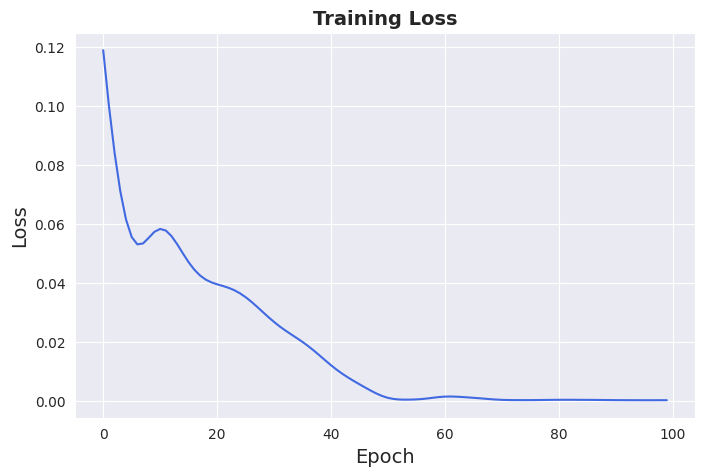

In [117]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])


#declaring the LSTM model
torch.manual_seed(69)
lstm_1 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
lstm_1 = to_device(lstm_1, device)

#training and evaluating model
evaluate_single_model(lstm_1, num_epochs, lr, loss_type, optimiser, time_step)

In [118]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with LSTM

In [119]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

LSTM_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(69)
            lstm_exp = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            lstm_exp = to_device(lstm_exp, device)

            #training and evaluating model
            LSTM_res = evaluate_model_experiments(lstm_exp, num_epochs, lr, loss_type, optimiser, time_step)
            LSTM_results += [LSTM_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1



<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  1.1164870262145996
Epoch  1 MSE:  1.081472396850586
Epoch  2 MSE:  1.0473318099975586
Epoch  3 MSE:  1.0140321254730225
Epoch  4 MSE:  0.9815332293510437
Epoch  5 MSE:  0.9497897624969482
Epoch  6 MSE:  0.9187520742416382
Epoch  7 MSE:  0.8883684873580933
Epoch  8 MSE:  0.8585866689682007
Epoch  9 MSE:  0.8293550610542297
Epoch  10 MSE:  0.8006242513656616
Epoch  11 MSE:  0.7723481059074402
Epoch  12 MSE:  0.7444850206375122
Epoch  13 MSE:  0.7169983983039856
Epoch  14 MSE:  0.6898577213287354
Epoch  15 MSE:  0.6630387306213379
Epoch  16 MSE:  0.6365237236022949
Epoch  17 MSE:  0.6103024482727051
Epoch  18 MSE:  0.5843712091445923
Epoch  19 MSE:  0.5587334036827087
Epoch  20 MSE:  0.5333991050720215
Epoch  21 MSE:  0.5083847641944885
Epoch  22 MSE:  0.4837128818035126
Epoch  23 MSE:  0.45941150188446045
Epoch  24 MSE:  0.4355137050151825
Epoch  25 MSE:  0.41205698251724243
Epoch  26 MSE:  0.3890824019908905
Epoch  27 MSE:  0.3666335344314575
Epoch  28 MSE:  0.34475541114

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06163354218006134
Epoch  1 MSE:  0.061863500624895096
Epoch  2 MSE:  0.06120945140719414
Epoch  3 MSE:  0.06099459156394005
Epoch  4 MSE:  0.06108219549059868
Epoch  5 MSE:  0.06088763475418091
Epoch  6 MSE:  0.0606260746717453
Epoch  7 MSE:  0.06055096164345741
Epoch  8 MSE:  0.06058071181178093
Epoch  9 MSE:  0.06051921099424362
Epoch  10 MSE:  0.060369644314050674
Epoch  11 MSE:  0.06025590002536774
Epoch  12 MSE:  0.06022613123059273
Epoch  13 MSE:  0.060205619782209396
Epoch  14 MSE:  0.06011831387877464
Epoch  15 MSE:  0.05998232215642929
Epoch  16 MSE:  0.05985981225967407
Epoch  17 MSE:  0.05976681783795357
Epoch  18 MSE:  0.059656742960214615
Epoch  19 MSE:  0.05948665738105774
Epoch  20 MSE:  0.05926763638854027
Epoch  21 MSE:  0.059033773839473724
Epoch  22 MSE:  0.058782078325748444
Epoch  23 MSE:  0.05846411734819412
Epoch  24 MSE:  0.05803538113832474
Epoch  25 MSE:  0.05748390033841133
Epoch  26 MSE:  0.056798629462718964
Epoch  27 MSE:  0.05593489855527

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11790802329778671
Epoch  1 MSE:  0.09933168441057205
Epoch  2 MSE:  0.08347198367118835
Epoch  3 MSE:  0.07070107012987137
Epoch  4 MSE:  0.06133841350674629
Epoch  5 MSE:  0.055553846061229706
Epoch  6 MSE:  0.05320196598768234
Epoch  7 MSE:  0.05361555516719818
Epoch  8 MSE:  0.05554024130105972
Epoch  9 MSE:  0.057481035590171814
Epoch  10 MSE:  0.05832216143608093
Epoch  11 MSE:  0.057661011815071106
Epoch  12 MSE:  0.055685754865407944
Epoch  13 MSE:  0.05288030207157135
Epoch  14 MSE:  0.04978196695446968
Epoch  15 MSE:  0.04683859646320343
Epoch  16 MSE:  0.04434365779161453
Epoch  17 MSE:  0.04242395609617233
Epoch  18 MSE:  0.04106190428137779
Epoch  19 MSE:  0.04013754054903984
Epoch  20 MSE:  0.03947708383202553
Epoch  21 MSE:  0.03889733552932739
Epoch  22 MSE:  0.03823940455913544
Epoch  23 MSE:  0.03738952800631523
Epoch  24 MSE:  0.03628786653280258
Epoch  25 MSE:  0.034927718341350555
Epoch  26 MSE:  0.033347729593515396
Epoch  27 MSE:  0.03161931410431

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.657617449760437
Epoch  1 MSE:  0.6108260750770569
Epoch  2 MSE:  0.5678690671920776
Epoch  3 MSE:  0.5284002423286438
Epoch  4 MSE:  0.49202874302864075
Epoch  5 MSE:  0.45833948254585266
Epoch  6 MSE:  0.4269072711467743
Epoch  7 MSE:  0.39730769395828247
Epoch  8 MSE:  0.36914050579071045
Epoch  9 MSE:  0.34204569458961487
Epoch  10 MSE:  0.315700501203537
Epoch  11 MSE:  0.28983357548713684
Epoch  12 MSE:  0.2642558217048645
Epoch  13 MSE:  0.23888546228408813
Epoch  14 MSE:  0.21375371515750885
Epoch  15 MSE:  0.1890004277229309
Epoch  16 MSE:  0.16486676037311554
Epoch  17 MSE:  0.14169524610042572
Epoch  18 MSE:  0.11994396150112152
Epoch  19 MSE:  0.10021733492612839
Epoch  20 MSE:  0.08330651372671127
Epoch  21 MSE:  0.0702124610543251
Epoch  22 MSE:  0.06208638846874237
Epoch  23 MSE:  0.059941455721855164
Epoch  24 MSE:  0.06388361006975174
Epoch  25 MSE:  0.07187164574861526
Epoch  26 MSE:  0.0798158273100853
Epoch  27 MSE:  0.0843932256102562
Epoch  28 MSE:

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.38852906227111816
Epoch  1 MSE:  0.345019668340683
Epoch  2 MSE:  0.3050766885280609
Epoch  3 MSE:  0.267839640378952
Epoch  4 MSE:  0.23278479278087616
Epoch  5 MSE:  0.19969142973423004
Epoch  6 MSE:  0.16856835782527924
Epoch  7 MSE:  0.13962411880493164
Epoch  8 MSE:  0.11326964944601059
Epoch  9 MSE:  0.09012988954782486
Epoch  10 MSE:  0.07106972485780716
Epoch  11 MSE:  0.05720888078212738
Epoch  12 MSE:  0.049825333058834076
Epoch  13 MSE:  0.04983895272016525
Epoch  14 MSE:  0.056236907839775085
Epoch  15 MSE:  0.06455735117197037
Epoch  16 MSE:  0.06985978782176971
Epoch  17 MSE:  0.07039467245340347
Epoch  18 MSE:  0.06702373921871185
Epoch  19 MSE:  0.06152581423521042
Epoch  20 MSE:  0.05556667223572731
Epoch  21 MSE:  0.050285521894693375
Epoch  22 MSE:  0.046243760734796524
Epoch  23 MSE:  0.04354897141456604
Epoch  24 MSE:  0.042028266936540604
Epoch  25 MSE:  0.04138019680976868
Epoch  26 MSE:  0.04127904400229454
Epoch  27 MSE:  0.04143362492322922
Ep

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.29439714550971985
Epoch  1 MSE:  0.24768607318401337
Epoch  2 MSE:  0.20779038965702057
Epoch  3 MSE:  0.1730661541223526
Epoch  4 MSE:  0.14217166602611542
Epoch  5 MSE:  0.11463978886604309
Epoch  6 MSE:  0.09082572162151337
Epoch  7 MSE:  0.07177051156759262
Epoch  8 MSE:  0.059085823595523834
Epoch  9 MSE:  0.05464249849319458
Epoch  10 MSE:  0.05919034034013748
Epoch  11 MSE:  0.06883262097835541
Epoch  12 MSE:  0.07561074197292328
Epoch  13 MSE:  0.07623794674873352
Epoch  14 MSE:  0.07232272624969482
Epoch  15 MSE:  0.06660245358943939
Epoch  16 MSE:  0.06115488335490227
Epoch  17 MSE:  0.05704503133893013
Epoch  18 MSE:  0.05453375726938248
Epoch  19 MSE:  0.053411077708005905
Epoch  20 MSE:  0.053270481526851654
Epoch  21 MSE:  0.05367977172136307
Epoch  22 MSE:  0.05426579713821411
Epoch  23 MSE:  0.054744571447372437
Epoch  24 MSE:  0.05492260307073593
Epoch  25 MSE:  0.05468583106994629
Epoch  26 MSE:  0.05398494377732277
Epoch  27 MSE:  0.05282153934240341

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Time Step = 20 | Hidden States = 16 | Num Layers = 1

Epoch  0 MSE:  0.19958412647247314
Epoch  1 MSE:  0.14756855368614197
Epoch  2 MSE:  0.10265304893255234
Epoch  3 MSE:  0.06664220988750458
Epoch  4 MSE:  0.04637695848941803
Epoch  5 MSE:  0.05331157147884369
Epoch  6 MSE:  0.06700746715068817
Epoch  7 MSE:  0.06292842328548431
Epoch  8 MSE:  0.051397599279880524
Epoch  9 MSE:  0.04231131076812744
Epoch  10 MSE:  0.038185521960258484
Epoch  11 MSE:  0.03754038363695145
Epoch  12 MSE:  0.03828877583146095
Epoch  13 MSE:  0.03897147625684738
Epoch  14 MSE:  0.03882134333252907
Epoch  15 MSE:  0.03755432367324829
Epoch  16 MSE:  0.035189542919397354
Epoch  17 MSE:  0.03194219246506691
Epoch  18 MSE:  0.028171682730317116
Epoch  19 MSE:  0.024358095601201057
Epoch  20 MSE:  0.021068356931209564
Epoch  21 MSE:  0.018839368596673012
Epoch  22 MSE:  0.0178577471524477
Epoch  23 MSE:  0.01741122640669346
Epoch  24 MSE:  0.01586436666548252
Epoch  25 MSE:  0.012406840920448303
Epoch  26 MSE

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.062149617820978165
Epoch  1 MSE:  0.06400585919618607
Epoch  2 MSE:  0.05854249373078346
Epoch  3 MSE:  0.056913334876298904
Epoch  4 MSE:  0.056053146719932556
Epoch  5 MSE:  0.052401840686798096
Epoch  6 MSE:  0.046496275812387466
Epoch  7 MSE:  0.04053277522325516
Epoch  8 MSE:  0.03339221701025963
Epoch  9 MSE:  0.020378056913614273
Epoch  10 MSE:  0.0057251229882240295
Epoch  11 MSE:  0.002687873085960746
Epoch  12 MSE:  0.014392479322850704
Epoch  13 MSE:  0.014203371480107307
Epoch  14 MSE:  0.007349372375756502
Epoch  15 MSE:  0.002284787595272064
Epoch  16 MSE:  0.0015191985294222832
Epoch  17 MSE:  0.0035500640515238047
Epoch  18 MSE:  0.0055064246989786625
Epoch  19 MSE:  0.006330737378448248
Epoch  20 MSE:  0.006101890467107296
Epoch  21 MSE:  0.004965576343238354
Epoch  22 MSE:  0.0033981623128056526
Epoch  23 MSE:  0.002111821435391903
Epoch  24 MSE:  0.001473966403864324
Epoch  25 MSE:  0.0014723878121003509
Epoch  26 MSE:  0.0020429049618542194
Epoch  2

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.17000049352645874
Epoch  1 MSE:  0.12193338572978973
Epoch  2 MSE:  0.08626244217157364
Epoch  3 MSE:  0.05827431380748749
Epoch  4 MSE:  0.045134905725717545
Epoch  5 MSE:  0.061827994883060455
Epoch  6 MSE:  0.05328141897916794
Epoch  7 MSE:  0.04011351242661476
Epoch  8 MSE:  0.03465329110622406
Epoch  9 MSE:  0.03380377218127251
Epoch  10 MSE:  0.03359236568212509
Epoch  11 MSE:  0.03153785690665245
Epoch  12 MSE:  0.026550093665719032
Epoch  13 MSE:  0.018880777060985565
Epoch  14 MSE:  0.011047348380088806
Epoch  15 MSE:  0.010592757724225521
Epoch  16 MSE:  0.015283055603504181
Epoch  17 MSE:  0.005190219264477491
Epoch  18 MSE:  0.0022678847890347242
Epoch  19 MSE:  0.00619102269411087
Epoch  20 MSE:  0.008230754174292088
Epoch  21 MSE:  0.005499223712831736
Epoch  22 MSE:  0.0017558690160512924
Epoch  23 MSE:  0.003408971708267927
Epoch  24 MSE:  0.005496062338352203
Epoch  25 MSE:  0.0024188156239688396
Epoch  26 MSE:  0.0004841830232180655
Epoch  27 MSE:  0.

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1772485226392746
Epoch  1 MSE:  0.09485405683517456
Epoch  2 MSE:  0.056561779230833054
Epoch  3 MSE:  0.0955045148730278
Epoch  4 MSE:  0.055872321128845215
Epoch  5 MSE:  0.04978061094880104
Epoch  6 MSE:  0.05504808574914932
Epoch  7 MSE:  0.05758490413427353
Epoch  8 MSE:  0.05436292663216591
Epoch  9 MSE:  0.04618629813194275
Epoch  10 MSE:  0.03517070412635803
Epoch  11 MSE:  0.025510171428322792
Epoch  12 MSE:  0.025921760126948357
Epoch  13 MSE:  0.030558288097381592
Epoch  14 MSE:  0.015129873529076576
Epoch  15 MSE:  0.0076676602475345135
Epoch  16 MSE:  0.009260576218366623
Epoch  17 MSE:  0.009810087271034718
Epoch  18 MSE:  0.005464501678943634
Epoch  19 MSE:  0.006420457269996405
Epoch  20 MSE:  0.011152529157698154
Epoch  21 MSE:  0.005383377894759178
Epoch  22 MSE:  0.002450820989906788
Epoch  23 MSE:  0.0027935307007282972
Epoch  24 MSE:  0.0026973546482622623
Epoch  25 MSE:  0.0019435134017840028
Epoch  26 MSE:  0.0017579349223524332
Epoch  27 MSE:  0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  1.1180815696716309
Epoch  1 MSE:  1.0830374956130981
Epoch  2 MSE:  1.0488678216934204
Epoch  3 MSE:  1.0155394077301025
Epoch  4 MSE:  0.9830123782157898
Epoch  5 MSE:  0.9512408375740051
Epoch  6 MSE:  0.9201753735542297
Epoch  7 MSE:  0.8897643685340881
Epoch  8 MSE:  0.8599552512168884
Epoch  9 MSE:  0.8306963443756104
Epoch  10 MSE:  0.8019381761550903
Epoch  11 MSE:  0.7736347913742065
Epoch  12 MSE:  0.7457441091537476
Epoch  13 MSE:  0.7182298302650452
Epoch  14 MSE:  0.6910611391067505
Epoch  15 MSE:  0.6642136573791504
Epoch  16 MSE:  0.6376699209213257
Epoch  17 MSE:  0.6114192605018616
Epoch  18 MSE:  0.5854580998420715
Epoch  19 MSE:  0.559789776802063
Epoch  20 MSE:  0.5344242453575134
Epoch  21 MSE:  0.5093780755996704
Epoch  22 MSE:  0.48467347025871277
Epoch  23 MSE:  0.4603385329246521
Epoch  24 MSE:  0.43640634417533875
Epoch  25 MSE:  0.4129144251346588
Epoch  26 MSE:  0.3899036943912506
Epoch  27 MSE:  0.36741793155670166
Epoch  28 MSE:  0.3455021083

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06154718995094299
Epoch  1 MSE:  0.06184190511703491
Epoch  2 MSE:  0.061172448098659515
Epoch  3 MSE:  0.06091633811593056
Epoch  4 MSE:  0.06102132052183151
Epoch  5 MSE:  0.0608602836728096
Epoch  6 MSE:  0.06058492511510849
Epoch  7 MSE:  0.06047593429684639
Epoch  8 MSE:  0.06050903722643852
Epoch  9 MSE:  0.06048315018415451
Epoch  10 MSE:  0.0603499598801136
Epoch  11 MSE:  0.06021951884031296
Epoch  12 MSE:  0.060172680765390396
Epoch  13 MSE:  0.0601678267121315
Epoch  14 MSE:  0.06011572852730751
Epoch  15 MSE:  0.059999458491802216
Epoch  16 MSE:  0.059873584657907486
Epoch  17 MSE:  0.05977976694703102
Epoch  18 MSE:  0.05969565734267235
Epoch  19 MSE:  0.059568870812654495
Epoch  20 MSE:  0.05938355252146721
Epoch  21 MSE:  0.059168510138988495
Epoch  22 MSE:  0.058945830911397934
Epoch  23 MSE:  0.05869152024388313
Epoch  24 MSE:  0.05835605412721634
Epoch  25 MSE:  0.057910751551389694
Epoch  26 MSE:  0.05735073611140251
Epoch  27 MSE:  0.056655749678611

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11820213496685028
Epoch  1 MSE:  0.09956130385398865
Epoch  2 MSE:  0.0836360976099968
Epoch  3 MSE:  0.07079901546239853
Epoch  4 MSE:  0.06137072667479515
Epoch  5 MSE:  0.05552419275045395
Epoch  6 MSE:  0.053120747208595276
Epoch  7 MSE:  0.05350382253527641
Epoch  8 MSE:  0.05542837455868721
Epoch  9 MSE:  0.05739738792181015
Epoch  10 MSE:  0.058280907571315765
Epoch  11 MSE:  0.057660333812236786
Epoch  12 MSE:  0.05571383237838745
Epoch  13 MSE:  0.052922118455171585
Epoch  14 MSE:  0.049823977053165436
Epoch  15 MSE:  0.04687117785215378
Epoch  16 MSE:  0.04436200484633446
Epoch  17 MSE:  0.04242789372801781
Epoch  18 MSE:  0.04105491563677788
Epoch  19 MSE:  0.040125418454408646
Epoch  20 MSE:  0.039466492831707
Epoch  21 MSE:  0.03889457881450653
Epoch  22 MSE:  0.03824951499700546
Epoch  23 MSE:  0.03741571679711342
Epoch  24 MSE:  0.036331355571746826
Epoch  25 MSE:  0.03498782217502594
Epoch  26 MSE:  0.03342217952013016
Epoch  27 MSE:  0.0317047312855720

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.6587608456611633
Epoch  1 MSE:  0.6119199395179749
Epoch  2 MSE:  0.5689154863357544
Epoch  3 MSE:  0.529401421546936
Epoch  4 MSE:  0.4929865300655365
Epoch  5 MSE:  0.4592552185058594
Epoch  6 MSE:  0.42778193950653076
Epoch  7 MSE:  0.39814165234565735
Epoch  8 MSE:  0.36993369460105896
Epoch  9 MSE:  0.34279704093933105
Epoch  10 MSE:  0.31640827655792236
Epoch  11 MSE:  0.2904950678348541
Epoch  12 MSE:  0.2648676037788391
Epoch  13 MSE:  0.23944321274757385
Epoch  14 MSE:  0.21425290405750275
Epoch  15 MSE:  0.18943634629249573
Epoch  16 MSE:  0.16523514688014984
Epoch  17 MSE:  0.14199276268482208
Epoch  18 MSE:  0.12016851454973221
Epoch  19 MSE:  0.10036872327327728
Epoch  20 MSE:  0.08338693529367447
Epoch  21 MSE:  0.07022757828235626
Epoch  22 MSE:  0.06204672530293465
Epoch  23 MSE:  0.05986422300338745
Epoch  24 MSE:  0.0637933760881424
Epoch  25 MSE:  0.07179392129182816
Epoch  26 MSE:  0.07976239919662476
Epoch  27 MSE:  0.08435963839292526
Epoch  28 MS

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3893633186817169
Epoch  1 MSE:  0.34578558802604675
Epoch  2 MSE:  0.30577540397644043
Epoch  3 MSE:  0.26847103238105774
Epoch  4 MSE:  0.23334762454032898
Epoch  5 MSE:  0.20018364489078522
Epoch  6 MSE:  0.16898714005947113
Epoch  7 MSE:  0.13996633887290955
Epoch  8 MSE:  0.1135321632027626
Epoch  9 MSE:  0.09030988067388535
Epoch  10 MSE:  0.07116551697254181
Epoch  11 MSE:  0.057221706956624985
Epoch  12 MSE:  0.04976378381252289
Epoch  13 MSE:  0.0497283898293972
Epoch  14 MSE:  0.05612630769610405
Epoch  15 MSE:  0.06448634713888168
Epoch  16 MSE:  0.0698246881365776
Epoch  17 MSE:  0.07037391513586044
Epoch  18 MSE:  0.06700155884027481
Epoch  19 MSE:  0.06149635091423988
Epoch  20 MSE:  0.05553024262189865
Epoch  21 MSE:  0.05024458095431328
Epoch  22 MSE:  0.04620079696178436
Epoch  23 MSE:  0.04350582882761955
Epoch  24 MSE:  0.04198624938726425
Epoch  25 MSE:  0.041340235620737076
Epoch  26 MSE:  0.04124186187982559
Epoch  27 MSE:  0.04139978811144829
Epoc

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.29507797956466675
Epoch  1 MSE:  0.24828489124774933
Epoch  2 MSE:  0.20831027626991272
Epoch  3 MSE:  0.17350824177265167
Epoch  4 MSE:  0.14253433048725128
Epoch  5 MSE:  0.11491914838552475
Epoch  6 MSE:  0.09101641923189163
Epoch  7 MSE:  0.07186681032180786
Epoch  8 MSE:  0.059083953499794006
Epoch  9 MSE:  0.0545475035905838
Epoch  10 MSE:  0.059037305414676666
Epoch  11 MSE:  0.06870137155056
Epoch  12 MSE:  0.0755491703748703
Epoch  13 MSE:  0.07622848451137543
Epoch  14 MSE:  0.07233050465583801
Epoch  15 MSE:  0.06660196930170059
Epoch  16 MSE:  0.06113467365503311
Epoch  17 MSE:  0.05700406804680824
Epoch  18 MSE:  0.05447658151388168
Epoch  19 MSE:  0.05334401875734329
Epoch  20 MSE:  0.053199637681245804
Epoch  21 MSE:  0.05361010134220123
Epoch  22 MSE:  0.054200995713472366
Epoch  23 MSE:  0.054687269032001495
Epoch  24 MSE:  0.05487463250756264
Epoch  25 MSE:  0.054648496210575104
Epoch  26 MSE:  0.05395927652716637
Epoch  27 MSE:  0.05280839651823044
E

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2000928372144699
Epoch  1 MSE:  0.1479315459728241
Epoch  2 MSE:  0.10283780843019485
Epoch  3 MSE:  0.0666312724351883
Epoch  4 MSE:  0.046301670372486115
Epoch  5 MSE:  0.053674936294555664
Epoch  6 MSE:  0.06704813241958618
Epoch  7 MSE:  0.06256462633609772
Epoch  8 MSE:  0.05102936178445816
Epoch  9 MSE:  0.04214581102132797
Epoch  10 MSE:  0.03818979114294052
Epoch  11 MSE:  0.03760886937379837
Epoch  12 MSE:  0.03834851086139679
Epoch  13 MSE:  0.038996048271656036
Epoch  14 MSE:  0.03881533816456795
Epoch  15 MSE:  0.037538252770900726
Epoch  16 MSE:  0.03518978878855705
Epoch  17 MSE:  0.03198373690247536
Epoch  18 MSE:  0.028271036222577095
Epoch  19 MSE:  0.024515580385923386
Epoch  20 MSE:  0.02126283198595047
Epoch  21 MSE:  0.019036492332816124
Epoch  22 MSE:  0.018042651936411858
Epoch  23 MSE:  0.017604796215891838
Epoch  24 MSE:  0.01604647934436798
Epoch  25 MSE:  0.012522626668214798
Epoch  26 MSE:  0.008300058543682098
Epoch  27 MSE:  0.005181740503

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06209592521190643
Epoch  1 MSE:  0.0640353187918663
Epoch  2 MSE:  0.05854148045182228
Epoch  3 MSE:  0.0568867102265358
Epoch  4 MSE:  0.05610056221485138
Epoch  5 MSE:  0.05254470929503441
Epoch  6 MSE:  0.046669065952301025
Epoch  7 MSE:  0.04064179211854935
Epoch  8 MSE:  0.03360003978013992
Epoch  9 MSE:  0.020447339862585068
Epoch  10 MSE:  0.005440278444439173
Epoch  11 MSE:  0.0033324742689728737
Epoch  12 MSE:  0.015648290514945984
Epoch  13 MSE:  0.01440265029668808
Epoch  14 MSE:  0.007503939792513847
Epoch  15 MSE:  0.0024260731879621744
Epoch  16 MSE:  0.002040029503405094
Epoch  17 MSE:  0.004073759540915489
Epoch  18 MSE:  0.005716358311474323
Epoch  19 MSE:  0.00650112284347415
Epoch  20 MSE:  0.0061793518252670765
Epoch  21 MSE:  0.004892400465905666
Epoch  22 MSE:  0.0033822432160377502
Epoch  23 MSE:  0.0022387634962797165
Epoch  24 MSE:  0.0015660368371754885
Epoch  25 MSE:  0.0015714098699390888
Epoch  26 MSE:  0.002211212646216154
Epoch  27 MSE:  

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Time Step = 30 | Hidden States = 32 | Num Layers = 1

Epoch  0 MSE:  0.17043910920619965
Epoch  1 MSE:  0.12224658578634262
Epoch  2 MSE:  0.08645570278167725
Epoch  3 MSE:  0.05832893028855324
Epoch  4 MSE:  0.045023173093795776
Epoch  5 MSE:  0.06201736629009247
Epoch  6 MSE:  0.05321627855300903
Epoch  7 MSE:  0.04010757431387901
Epoch  8 MSE:  0.03472176566720009
Epoch  9 MSE:  0.03390316665172577
Epoch  10 MSE:  0.03373057022690773
Epoch  11 MSE:  0.03176536038517952
Epoch  12 MSE:  0.026933185756206512
Epoch  13 MSE:  0.019442778080701828
Epoch  14 MSE:  0.01155916228890419
Epoch  15 MSE:  0.01036790944635868
Epoch  16 MSE:  0.01612948067486286
Epoch  17 MSE:  0.0055845980532467365
Epoch  18 MSE:  0.0024836724624037743
Epoch  19 MSE:  0.006323244888335466
Epoch  20 MSE:  0.008494539186358452
Epoch  21 MSE:  0.005977974273264408
Epoch  22 MSE:  0.001825922285206616
Epoch  23 MSE:  0.0026099970564246178
Epoch  24 MSE:  0.005597216077148914
Epoch  25 MSE:  0.0029939995147287846
Epoc

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1777067631483078
Epoch  1 MSE:  0.09504919499158859
Epoch  2 MSE:  0.05644519627094269
Epoch  3 MSE:  0.09616333246231079
Epoch  4 MSE:  0.05573156476020813
Epoch  5 MSE:  0.04981742799282074
Epoch  6 MSE:  0.05518563464283943
Epoch  7 MSE:  0.05780462175607681
Epoch  8 MSE:  0.05470013618469238
Epoch  9 MSE:  0.04668479785323143
Epoch  10 MSE:  0.03582148998975754
Epoch  11 MSE:  0.02606058493256569
Epoch  12 MSE:  0.025691218674182892
Epoch  13 MSE:  0.03160273656249046
Epoch  14 MSE:  0.015990648418664932
Epoch  15 MSE:  0.008305919356644154
Epoch  16 MSE:  0.00976985041052103
Epoch  17 MSE:  0.010341726243495941
Epoch  18 MSE:  0.005723647773265839
Epoch  19 MSE:  0.0061268932186067104
Epoch  20 MSE:  0.011016111820936203
Epoch  21 MSE:  0.004969481844455004
Epoch  22 MSE:  0.002345540327951312
Epoch  23 MSE:  0.0027248563710600138
Epoch  24 MSE:  0.0025284120347350836
Epoch  25 MSE:  0.0017922102706506848
Epoch  26 MSE:  0.0017267708899453282
Epoch  27 MSE:  0.002

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  1.1212157011032104
Epoch  1 MSE:  1.0861142873764038
Epoch  2 MSE:  1.0518878698349
Epoch  3 MSE:  1.0185035467147827
Epoch  4 MSE:  0.985921323299408
Epoch  5 MSE:  0.9540953040122986
Epoch  6 MSE:  0.922976016998291
Epoch  7 MSE:  0.8925113677978516
Epoch  8 MSE:  0.8626490235328674
Epoch  9 MSE:  0.8333369493484497
Epoch  10 MSE:  0.8045257925987244
Epoch  11 MSE:  0.7761690020561218
Epoch  12 MSE:  0.7482250332832336
Epoch  13 MSE:  0.7206567525863647
Epoch  14 MSE:  0.6934337019920349
Epoch  15 MSE:  0.6665312051773071
Epoch  16 MSE:  0.6399316787719727
Epoch  17 MSE:  0.6136242747306824
Epoch  18 MSE:  0.587605357170105
Epoch  19 MSE:  0.5618782043457031
Epoch  20 MSE:  0.5364527106285095
Epoch  21 MSE:  0.5113452076911926
Epoch  22 MSE:  0.4865780770778656
Epoch  23 MSE:  0.4621793031692505
Epoch  24 MSE:  0.43818199634552
Epoch  25 MSE:  0.4146234691143036
Epoch  26 MSE:  0.3915449380874634
Epoch  27 MSE:  0.36899009346961975
Epoch  28 MSE:  0.3470039665699005
Ep

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06141829490661621
Epoch  1 MSE:  0.06159532070159912
Epoch  2 MSE:  0.06103038415312767
Epoch  3 MSE:  0.06072171404957771
Epoch  4 MSE:  0.060803771018981934
Epoch  5 MSE:  0.06068621575832367
Epoch  6 MSE:  0.06042718142271042
Epoch  7 MSE:  0.06030021607875824
Epoch  8 MSE:  0.060319818556308746
Epoch  9 MSE:  0.060302551835775375
Epoch  10 MSE:  0.0601821206510067
Epoch  11 MSE:  0.06005442887544632
Epoch  12 MSE:  0.06000237166881561
Epoch  13 MSE:  0.05999337136745453
Epoch  14 MSE:  0.0599423423409462
Epoch  15 MSE:  0.05982993543148041
Epoch  16 MSE:  0.05970701947808266
Epoch  17 MSE:  0.05961321294307709
Epoch  18 MSE:  0.05952639877796173
Epoch  19 MSE:  0.059396639466285706
Epoch  20 MSE:  0.059210821986198425
Epoch  21 MSE:  0.05899745598435402
Epoch  22 MSE:  0.05877470597624779
Epoch  23 MSE:  0.05851508304476738
Epoch  24 MSE:  0.05817072093486786
Epoch  25 MSE:  0.057717110961675644
Epoch  26 MSE:  0.05714910849928856
Epoch  27 MSE:  0.0564412586390972

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11880163848400116
Epoch  1 MSE:  0.10003463178873062
Epoch  2 MSE:  0.08398126810789108
Epoch  3 MSE:  0.07101474702358246
Epoch  4 MSE:  0.06145799160003662
Epoch  5 MSE:  0.0554899126291275
Epoch  6 MSE:  0.052984606474637985
Epoch  7 MSE:  0.05330599099397659
Epoch  8 MSE:  0.055227477103471756
Epoch  9 MSE:  0.05724926292896271
Epoch  10 MSE:  0.05821455642580986
Epoch  11 MSE:  0.05767334625124931
Epoch  12 MSE:  0.055783711373806
Epoch  13 MSE:  0.053019553422927856
Epoch  14 MSE:  0.049922142177820206
Epoch  15 MSE:  0.04695076495409012
Epoch  16 MSE:  0.04441312700510025
Epoch  17 MSE:  0.04244978353381157
Epoch  18 MSE:  0.04105409234762192
Epoch  19 MSE:  0.04011305794119835
Epoch  20 MSE:  0.039455611258745193
Epoch  21 MSE:  0.03889758512377739
Epoch  22 MSE:  0.038276392966508865
Epoch  23 MSE:  0.03747294098138809
Epoch  24 MSE:  0.0364215113222599
Epoch  25 MSE:  0.03510976582765579
Epoch  26 MSE:  0.033571623265743256
Epoch  27 MSE:  0.03187521919608116

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.6610144972801208
Epoch  1 MSE:  0.6140768527984619
Epoch  2 MSE:  0.5709801912307739
Epoch  3 MSE:  0.5313779711723328
Epoch  4 MSE:  0.49487829208374023
Epoch  5 MSE:  0.4610651433467865
Epoch  6 MSE:  0.4295119643211365
Epoch  7 MSE:  0.39979270100593567
Epoch  8 MSE:  0.3715054988861084
Epoch  9 MSE:  0.344288170337677
Epoch  10 MSE:  0.31781595945358276
Epoch  11 MSE:  0.2918151021003723
Epoch  12 MSE:  0.2660945951938629
Epoch  13 MSE:  0.24057066440582275
Epoch  14 MSE:  0.2152734398841858
Epoch  15 MSE:  0.19034205377101898
Epoch  16 MSE:  0.16601772606372833
Epoch  17 MSE:  0.14264386892318726
Epoch  18 MSE:  0.1206802949309349
Epoch  19 MSE:  0.10073474049568176
Epoch  20 MSE:  0.08360367268323898
Epoch  21 MSE:  0.07029695808887482
Epoch  22 MSE:  0.06198032945394516
Epoch  23 MSE:  0.059689536690711975
Epoch  24 MSE:  0.06356136500835419
Epoch  25 MSE:  0.07157661765813828
Epoch  26 MSE:  0.0796167328953743
Epoch  27 MSE:  0.0842960998415947
Epoch  28 MSE:  

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3910149037837982
Epoch  1 MSE:  0.3473048508167267
Epoch  2 MSE:  0.30716612935066223
Epoch  3 MSE:  0.26973408460617065
Epoch  4 MSE:  0.2344815880060196
Epoch  5 MSE:  0.20118528604507446
Epoch  6 MSE:  0.16985192894935608
Epoch  7 MSE:  0.14068865776062012
Epoch  8 MSE:  0.11410564929246902
Epoch  9 MSE:  0.09072782844305038
Epoch  10 MSE:  0.07142160832881927
Epoch  11 MSE:  0.05731205269694328
Epoch  12 MSE:  0.049692802131175995
Epoch  13 MSE:  0.049525558948516846
Epoch  14 MSE:  0.05587629973888397
Epoch  15 MSE:  0.06430263817310333
Epoch  16 MSE:  0.0697566494345665
Epoch  17 MSE:  0.07040143758058548
Epoch  18 MSE:  0.06707873940467834
Epoch  19 MSE:  0.06158038228750229
Epoch  20 MSE:  0.055592793971300125
Epoch  21 MSE:  0.05027312412858009
Epoch  22 MSE:  0.04619505628943443
Epoch  23 MSE:  0.04347283020615578
Epoch  24 MSE:  0.04193598031997681
Epoch  25 MSE:  0.04128267988562584
Epoch  26 MSE:  0.04118537902832031
Epoch  27 MSE:  0.04135056585073471
Epo

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2964317202568054
Epoch  1 MSE:  0.24947907030582428
Epoch  2 MSE:  0.20935261249542236
Epoch  3 MSE:  0.17440089583396912
Epoch  4 MSE:  0.14327313005924225
Epoch  5 MSE:  0.11549551039934158
Epoch  6 MSE:  0.09141876548528671
Epoch  7 MSE:  0.07208293676376343
Epoch  8 MSE:  0.05910579860210419
Epoch  9 MSE:  0.05438493192195892
Epoch  10 MSE:  0.0587594173848629
Epoch  11 MSE:  0.06846411526203156
Epoch  12 MSE:  0.0754486694931984
Epoch  13 MSE:  0.07623263448476791
Epoch  14 MSE:  0.07237119972705841
Epoch  15 MSE:  0.06662808358669281
Epoch  16 MSE:  0.06112203747034073
Epoch  17 MSE:  0.05694933235645294
Epoch  18 MSE:  0.054387904703617096
Epoch  19 MSE:  0.053233806043863297
Epoch  20 MSE:  0.05308017507195473
Epoch  21 MSE:  0.05349171534180641
Epoch  22 MSE:  0.05409153550863266
Epoch  23 MSE:  0.05459235608577728
Epoch  24 MSE:  0.0547981783747673
Epoch  25 MSE:  0.05459326133131981
Epoch  26 MSE:  0.05392734706401825
Epoch  27 MSE:  0.05280156433582306
Epoc

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.20111054182052612
Epoch  1 MSE:  0.14868967235088348
Epoch  2 MSE:  0.10331560671329498
Epoch  3 MSE:  0.06680821627378464
Epoch  4 MSE:  0.04619777947664261
Epoch  5 MSE:  0.05349981412291527
Epoch  6 MSE:  0.06704737991094589
Epoch  7 MSE:  0.0626223161816597
Epoch  8 MSE:  0.05104904621839523
Epoch  9 MSE:  0.04211205244064331
Epoch  10 MSE:  0.03812903165817261
Epoch  11 MSE:  0.03755080699920654
Epoch  12 MSE:  0.03831174597144127
Epoch  13 MSE:  0.03898901492357254
Epoch  14 MSE:  0.038840994238853455
Epoch  15 MSE:  0.037597864866256714
Epoch  16 MSE:  0.03528481721878052
Epoch  17 MSE:  0.03211597353219986
Epoch  18 MSE:  0.028440900146961212
Epoch  19 MSE:  0.024718226864933968
Epoch  20 MSE:  0.021482650190591812
Epoch  21 MSE:  0.019244877621531487
Epoch  22 MSE:  0.018215563148260117
Epoch  23 MSE:  0.01777748577296734
Epoch  24 MSE:  0.01631775312125683
Epoch  25 MSE:  0.012902087531983852
Epoch  26 MSE:  0.00867472030222416
Epoch  27 MSE:  0.0054416521452

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06201817840337753
Epoch  1 MSE:  0.06382397562265396
Epoch  2 MSE:  0.05843520537018776
Epoch  3 MSE:  0.056733112782239914
Epoch  4 MSE:  0.05596982687711716
Epoch  5 MSE:  0.05251133069396019
Epoch  6 MSE:  0.046742431819438934
Epoch  7 MSE:  0.040750473737716675
Epoch  8 MSE:  0.033798571676015854
Epoch  9 MSE:  0.020797960460186005
Epoch  10 MSE:  0.005722797010093927
Epoch  11 MSE:  0.003406945848837495
Epoch  12 MSE:  0.015561866573989391
Epoch  13 MSE:  0.015304865315556526
Epoch  14 MSE:  0.007852050475776196
Epoch  15 MSE:  0.0026074701454490423
Epoch  16 MSE:  0.00217262445949018
Epoch  17 MSE:  0.003752551507204771
Epoch  18 MSE:  0.005584343336522579
Epoch  19 MSE:  0.006553242448717356
Epoch  20 MSE:  0.006185103673487902
Epoch  21 MSE:  0.004979670513421297
Epoch  22 MSE:  0.003548425156623125
Epoch  23 MSE:  0.00221381988376379
Epoch  24 MSE:  0.0013931345893070102
Epoch  25 MSE:  0.001419978216290474
Epoch  26 MSE:  0.0019837282598018646
Epoch  27 MSE: 

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.17132079601287842
Epoch  1 MSE:  0.12288007885217667
Epoch  2 MSE:  0.08685312420129776
Epoch  3 MSE:  0.05845800042152405
Epoch  4 MSE:  0.044836606830358505
Epoch  5 MSE:  0.06217437982559204
Epoch  6 MSE:  0.05330028384923935
Epoch  7 MSE:  0.04011521115899086
Epoch  8 MSE:  0.034744344651699066
Epoch  9 MSE:  0.03397494554519653
Epoch  10 MSE:  0.03387501835823059
Epoch  11 MSE:  0.032023005187511444
Epoch  12 MSE:  0.027357693761587143
Epoch  13 MSE:  0.020061088725924492
Epoch  14 MSE:  0.012197448872029781
Epoch  15 MSE:  0.010157804004848003
Epoch  16 MSE:  0.01670270599424839
Epoch  17 MSE:  0.006435740273445845
Epoch  18 MSE:  0.002465914934873581
Epoch  19 MSE:  0.005992787424474955
Epoch  20 MSE:  0.008495543152093887
Epoch  21 MSE:  0.006439280230551958
Epoch  22 MSE:  0.002141544595360756
Epoch  23 MSE:  0.0020814158488065004
Epoch  24 MSE:  0.005544931162148714
Epoch  25 MSE:  0.0035075535997748375
Epoch  26 MSE:  0.000675685703754425
Epoch  27 MSE:  0.0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.17862801253795624
Epoch  1 MSE:  0.09547944366931915
Epoch  2 MSE:  0.0562298446893692
Epoch  3 MSE:  0.09745384007692337
Epoch  4 MSE:  0.05580776184797287
Epoch  5 MSE:  0.04982980340719223
Epoch  6 MSE:  0.05539683997631073
Epoch  7 MSE:  0.058255329728126526
Epoch  8 MSE:  0.05542430654168129
Epoch  9 MSE:  0.04772103205323219
Epoch  10 MSE:  0.03712619096040726
Epoch  11 MSE:  0.027204986661672592
Epoch  12 MSE:  0.025333188474178314
Epoch  13 MSE:  0.03260495513677597
Epoch  14 MSE:  0.018518662080168724
Epoch  15 MSE:  0.009049205109477043
Epoch  16 MSE:  0.0094583909958601
Epoch  17 MSE:  0.010299497283995152
Epoch  18 MSE:  0.006216076668351889
Epoch  19 MSE:  0.005480404011905193
Epoch  20 MSE:  0.011195583269000053
Epoch  21 MSE:  0.005209976341575384
Epoch  22 MSE:  0.0025835493579506874
Epoch  23 MSE:  0.002784794196486473
Epoch  24 MSE:  0.0023584458976984024
Epoch  25 MSE:  0.0015562037006020546
Epoch  26 MSE:  0.0016104785026982427
Epoch  27 MSE:  0.002

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  1.1289846897125244
Epoch  1 MSE:  1.0937422513961792
Epoch  2 MSE:  1.0593767166137695
Epoch  3 MSE:  1.0258554220199585
Epoch  4 MSE:  0.9931378960609436
Epoch  5 MSE:  0.961178183555603
Epoch  6 MSE:  0.9299265146255493
Epoch  7 MSE:  0.8993304967880249
Epoch  8 MSE:  0.8693373799324036
Epoch  9 MSE:  0.8398950099945068
Epoch  10 MSE:  0.8109536170959473
Epoch  11 MSE:  0.7824663519859314
Epoch  12 MSE:  0.7543910145759583
Epoch  13 MSE:  0.7266906499862671
Epoch  14 MSE:  0.6993340253829956
Epoch  15 MSE:  0.672296404838562
Epoch  16 MSE:  0.6455597281455994
Epoch  17 MSE:  0.6191130876541138
Epoch  18 MSE:  0.59295254945755
Epoch  19 MSE:  0.567081093788147
Epoch  20 MSE:  0.5415083765983582
Epoch  21 MSE:  0.5162505507469177
Epoch  22 MSE:  0.49133002758026123
Epoch  23 MSE:  0.46677452325820923
Epoch  24 MSE:  0.44261711835861206
Epoch  25 MSE:  0.41889530420303345
Epoch  26 MSE:  0.39565011858940125
Epoch  27 MSE:  0.3729255497455597
Epoch  28 MSE:  0.350766777992

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06117495894432068
Epoch  1 MSE:  0.06114424020051956
Epoch  2 MSE:  0.06079187989234924
Epoch  3 MSE:  0.06036379933357239
Epoch  4 MSE:  0.060359444469213486
Epoch  5 MSE:  0.06034857779741287
Epoch  6 MSE:  0.060133956372737885
Epoch  7 MSE:  0.05993703752756119
Epoch  8 MSE:  0.05989545211195946
Epoch  9 MSE:  0.05990812927484512
Epoch  10 MSE:  0.05983758717775345
Epoch  11 MSE:  0.059703268110752106
Epoch  12 MSE:  0.05960308015346527
Epoch  13 MSE:  0.05956918001174927
Epoch  14 MSE:  0.05953928455710411
Epoch  15 MSE:  0.059452228248119354
Epoch  16 MSE:  0.05932126194238663
Epoch  17 MSE:  0.05919671058654785
Epoch  18 MSE:  0.05909333378076553
Epoch  19 MSE:  0.058973345905542374
Epoch  20 MSE:  0.05879789963364601
Epoch  21 MSE:  0.05857162922620773
Epoch  22 MSE:  0.058321498334407806
Epoch  23 MSE:  0.05804608017206192
Epoch  24 MSE:  0.05770314857363701
Epoch  25 MSE:  0.057247526943683624
Epoch  26 MSE:  0.05665865167975426
Epoch  27 MSE:  0.0559183843433

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.12034371495246887
Epoch  1 MSE:  0.10126537084579468
Epoch  2 MSE:  0.08489571511745453
Epoch  3 MSE:  0.0716094821691513
Epoch  4 MSE:  0.061734944581985474
Epoch  5 MSE:  0.055464886128902435
Epoch  6 MSE:  0.05270329862833023
Epoch  7 MSE:  0.05286306515336037
Epoch  8 MSE:  0.054764341562986374
Epoch  9 MSE:  0.05690549314022064
Epoch  10 MSE:  0.0580674484372139
Epoch  11 MSE:  0.05772264301776886
Epoch  12 MSE:  0.05597709119319916
Epoch  13 MSE:  0.05328548327088356
Epoch  14 MSE:  0.05019349977374077
Epoch  15 MSE:  0.047178011387586594
Epoch  16 MSE:  0.04456959292292595
Epoch  17 MSE:  0.0425313338637352
Epoch  18 MSE:  0.041075024753808975
Epoch  19 MSE:  0.04009977728128433
Epoch  20 MSE:  0.039439789950847626
Epoch  21 MSE:  0.03891000524163246
Epoch  22 MSE:  0.038342345505952835
Epoch  23 MSE:  0.03760940581560135
Epoch  24 MSE:  0.03663601353764534
Epoch  25 MSE:  0.03540060669183731
Epoch  26 MSE:  0.0339292474091053
Epoch  27 MSE:  0.03228440880775452

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.6666185259819031
Epoch  1 MSE:  0.6194435954093933
Epoch  2 MSE:  0.5761203169822693
Epoch  3 MSE:  0.5363013744354248
Epoch  4 MSE:  0.49959373474121094
Epoch  5 MSE:  0.4655795097351074
Epoch  6 MSE:  0.43383005261421204
Epoch  7 MSE:  0.40391671657562256
Epoch  8 MSE:  0.3754347860813141
Epoch  9 MSE:  0.34801918268203735
Epoch  10 MSE:  0.32134169340133667
Epoch  11 MSE:  0.2951253056526184
Epoch  12 MSE:  0.26917582750320435
Epoch  13 MSE:  0.2434069663286209
Epoch  14 MSE:  0.2178468108177185
Epoch  15 MSE:  0.19263294339179993
Epoch  16 MSE:  0.1680057793855667
Epoch  17 MSE:  0.14430855214595795
Epoch  18 MSE:  0.12200221419334412
Epoch  19 MSE:  0.10169760882854462
Epoch  20 MSE:  0.08419808745384216
Epoch  21 MSE:  0.07052657008171082
Epoch  22 MSE:  0.06187211722135544
Epoch  23 MSE:  0.05930936336517334
Epoch  24 MSE:  0.06303339451551437
Epoch  25 MSE:  0.07107988744974136
Epoch  26 MSE:  0.07929681241512299
Epoch  27 MSE:  0.08418336510658264
Epoch  28 MS

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.39514216780662537
Epoch  1 MSE:  0.351106196641922
Epoch  2 MSE:  0.31065088510513306
Epoch  3 MSE:  0.2729044258594513
Epoch  4 MSE:  0.23733384907245636
Epoch  5 MSE:  0.2037116140127182
Epoch  6 MSE:  0.17204105854034424
Epoch  7 MSE:  0.14252673089504242
Epoch  8 MSE:  0.1155768558382988
Epoch  9 MSE:  0.09181535243988037
Epoch  10 MSE:  0.0721094012260437
Epoch  11 MSE:  0.05758976936340332
Epoch  12 MSE:  0.049569543451070786
Epoch  13 MSE:  0.04906979948282242
Epoch  14 MSE:  0.05529126152396202
Epoch  15 MSE:  0.06387180089950562
Epoch  16 MSE:  0.06961151212453842
Epoch  17 MSE:  0.07049737125635147
Epoch  18 MSE:  0.06730224937200546
Epoch  19 MSE:  0.06182324141263962
Epoch  20 MSE:  0.055782344192266464
Epoch  21 MSE:  0.05037650838494301
Epoch  22 MSE:  0.04621066153049469
Epoch  23 MSE:  0.04341789335012436
Epoch  24 MSE:  0.0418354757130146
Epoch  25 MSE:  0.04116171970963478
Epoch  26 MSE:  0.041065093129873276
Epoch  27 MSE:  0.04124658554792404
Epoch 

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2998247742652893
Epoch  1 MSE:  0.2524798810482025
Epoch  2 MSE:  0.21198004484176636
Epoch  3 MSE:  0.17666016519069672
Epoch  4 MSE:  0.14515382051467896
Epoch  5 MSE:  0.1169762909412384
Epoch  6 MSE:  0.09247104078531265
Epoch  7 MSE:  0.0726761668920517
Epoch  8 MSE:  0.059219054877758026
Epoch  9 MSE:  0.05403923988342285
Epoch  10 MSE:  0.05811788886785507
Epoch  11 MSE:  0.06791071593761444
Epoch  12 MSE:  0.07523272186517715
Epoch  13 MSE:  0.07628019899129868
Epoch  14 MSE:  0.07251293212175369
Epoch  15 MSE:  0.0667349323630333
Epoch  16 MSE:  0.06113230064511299
Epoch  17 MSE:  0.056853704154491425
Epoch  18 MSE:  0.054206300526857376
Epoch  19 MSE:  0.05299689993262291
Epoch  20 MSE:  0.05281849578022957
Epoch  21 MSE:  0.05323074758052826
Epoch  22 MSE:  0.053850483149290085
Epoch  23 MSE:  0.05438471585512161
Epoch  24 MSE:  0.054633017629384995
Epoch  25 MSE:  0.05447658896446228
Epoch  26 MSE:  0.05386332795023918
Epoch  27 MSE:  0.05279342085123062
Ep

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.20368003845214844
Epoch  1 MSE:  0.1506544053554535
Epoch  2 MSE:  0.10464326292276382
Epoch  3 MSE:  0.0674467459321022
Epoch  4 MSE:  0.046079643070697784
Epoch  5 MSE:  0.05283046513795853
Epoch  6 MSE:  0.067041777074337
Epoch  7 MSE:  0.06304150819778442
Epoch  8 MSE:  0.05139658600091934
Epoch  9 MSE:  0.042210306972265244
Epoch  10 MSE:  0.03804578632116318
Epoch  11 MSE:  0.03741450235247612
Epoch  12 MSE:  0.038216665387153625
Epoch  13 MSE:  0.03898373618721962
Epoch  14 MSE:  0.038943465799093246
Epoch  15 MSE:  0.03781012445688248
Epoch  16 MSE:  0.035602033138275146
Epoch  17 MSE:  0.03252982348203659
Epoch  18 MSE:  0.028938036412000656
Epoch  19 MSE:  0.025273993611335754
Epoch  20 MSE:  0.022052101790905
Epoch  21 MSE:  0.0197615809738636
Epoch  22 MSE:  0.0186307430267334
Epoch  23 MSE:  0.01818261295557022
Epoch  24 MSE:  0.016989262774586678
Epoch  25 MSE:  0.013926547951996326
Epoch  26 MSE:  0.009763821959495544
Epoch  27 MSE:  0.006252412684261799

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.06189924478530884
Epoch  1 MSE:  0.06301868706941605
Epoch  2 MSE:  0.0581086128950119
Epoch  3 MSE:  0.05617073178291321
Epoch  4 MSE:  0.05530329421162605
Epoch  5 MSE:  0.051905907690525055
Epoch  6 MSE:  0.04609450325369835
Epoch  7 MSE:  0.0398993119597435
Epoch  8 MSE:  0.03253219649195671
Epoch  9 MSE:  0.019137147814035416
Epoch  10 MSE:  0.004604232031852007
Epoch  11 MSE:  0.00453239306807518
Epoch  12 MSE:  0.014872330240905285
Epoch  13 MSE:  0.01299117412418127
Epoch  14 MSE:  0.006161742378026247
Epoch  15 MSE:  0.0018565204227343202
Epoch  16 MSE:  0.0020315591245889664
Epoch  17 MSE:  0.003868017578497529
Epoch  18 MSE:  0.005394371226429939
Epoch  19 MSE:  0.005802336148917675
Epoch  20 MSE:  0.005040006712079048
Epoch  21 MSE:  0.0037030414678156376
Epoch  22 MSE:  0.0023237683344632387
Epoch  23 MSE:  0.001331372419372201
Epoch  24 MSE:  0.0011224360205233097
Epoch  25 MSE:  0.0015512309037148952
Epoch  26 MSE:  0.0022093283478170633
Epoch  27 MSE:  

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1735536754131317
Epoch  1 MSE:  0.12450098991394043
Epoch  2 MSE:  0.08789188414812088
Epoch  3 MSE:  0.0588325597345829
Epoch  4 MSE:  0.04441840201616287
Epoch  5 MSE:  0.06257057189941406
Epoch  6 MSE:  0.05353662371635437
Epoch  7 MSE:  0.040147919207811356
Epoch  8 MSE:  0.03480136767029762
Epoch  9 MSE:  0.03414282947778702
Epoch  10 MSE:  0.03420794755220413
Epoch  11 MSE:  0.03261115029454231
Epoch  12 MSE:  0.02832120843231678
Epoch  13 MSE:  0.021471166983246803
Epoch  14 MSE:  0.013749673031270504
Epoch  15 MSE:  0.010153539478778839
Epoch  16 MSE:  0.016185607761144638
Epoch  17 MSE:  0.00892262440174818
Epoch  18 MSE:  0.002571546006947756
Epoch  19 MSE:  0.004567399621009827
Epoch  20 MSE:  0.007553036790341139
Epoch  21 MSE:  0.006621432024985552
Epoch  22 MSE:  0.002693199086934328
Epoch  23 MSE:  0.0021031799260526896
Epoch  24 MSE:  0.005543090403079987
Epoch  25 MSE:  0.0035077978391200304
Epoch  26 MSE:  0.0007398056332021952
Epoch  27 MSE:  0.00090

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Time Step = 100 | Hidden States = 32 | Num Layers = 2

Epoch  0 MSE:  0.18096238374710083
Epoch  1 MSE:  0.0966058224439621
Epoch  2 MSE:  0.05576227605342865
Epoch  3 MSE:  0.10071887820959091
Epoch  4 MSE:  0.056042056530714035
Epoch  5 MSE:  0.049871910363435745
Epoch  6 MSE:  0.055910903960466385
Epoch  7 MSE:  0.0593281090259552
Epoch  8 MSE:  0.05711672827601433
Epoch  9 MSE:  0.05011388286948204
Epoch  10 MSE:  0.040162794291973114
Epoch  11 MSE:  0.030137641355395317
Epoch  12 MSE:  0.025532688945531845
Epoch  13 MSE:  0.03190946578979492
Epoch  14 MSE:  0.025164322927594185
Epoch  15 MSE:  0.011926425620913506
Epoch  16 MSE:  0.008565632626414299
Epoch  17 MSE:  0.009180751629173756
Epoch  18 MSE:  0.006695492193102837
Epoch  19 MSE:  0.004828804172575474
Epoch  20 MSE:  0.011845918372273445
Epoch  21 MSE:  0.006244942080229521
Epoch  22 MSE:  0.003834869945421815
Epoch  23 MSE:  0.003451575757935643
Epoch  24 MSE:  0.0021486738696694374
Epoch  25 MSE:  0.0010293746599927545
E

In [120]:
LSTM_results = pd.DataFrame(LSTM_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [121]:
LSTM_results = LSTM_results.sort_values('valScore', ascending=True, ignore_index = True)
LSTM_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        30.0         1.0        32.0    0.676720  18.678154
1        50.0         1.0        32.0    0.677144  18.949978
2        20.0         1.0        32.0    0.685304  19.142403
3       100.0         1.0        32.0    0.679651  20.168728
4        50.0         2.0        16.0    0.778002  26.457307
5        30.0         2.0        16.0    0.782918  27.543635
6       100.0         2.0        16.0    0.766359  27.957539
7        20.0         2.0        16.0    0.837084  28.732355
8        30.0         2.0        32.0    0.959206  30.308471
9        20.0         2.0        32.0    0.972833  30.632804
10       50.0         2.0        32.0    0.959485  30.775500
11       20.0         1.0         8.0    1.338715  32.690336
12      100.0         2.0        32.0    0.964266  32.724094
13       30.0         1.0         8.0    1.354637  33.071074
14       30.0         1.0        16.0    1.281043  33.226942
15       20.0         1.0        16.0    1.316466  33.333871
16       50.0         1.0        16.0    1.252712  33.737185
17       50.0         1.0         8.0    1.352722  33.796996
18       20.0         1.0         4.0    0.909095  33.925222
19       30.0         1.0         4.0    0.903377  34.247783
20       50.0         1.0         4.0    0.895403  34.983836
21      100.0         1.0        16.0    1.223109  35.648277
22      100.0         1.0         8.0    1.338816  35.876080
23      100.0         1.0         4.0    0.876558  37.099982
24       30.0         2.0         8.0    1.526632  40.608917
25       20.0         2.0         8.0    1.623455  40.725817
26       50.0         2.0         8.0    1.484701  40.951308
27       20.0         2.0         2.0    1.709799  40.972970
28       30.0         2.0         2.0    1.594780  41.034229
29       50.0         2.0         2.0    1.553093  41.255729
30      100.0         2.0         8.0    1.616353  43.279429
31      100.0         2.0         2.0    1.508696  44.099130
32       20.0         1.0         2.0   15.722618  73.861714
33       30.0         1.0         2.0   15.715764  74.381201
34       50.0         1.0         2.0   15.700916  75.724331
35       20.0         2.0         4.0   16.562846  77.376470
36       30.0         2.0         4.0   16.561792  77.931310
37      100.0         1.0         2.0   15.668211  79.184796
38       50.0         2.0         4.0   16.550382  79.340159
39      100.0         2.0         4.0   16.524740  82.967888

In [122]:
best_lstm_model = LSTM_results.iloc[0]
best_lstm_model

time_step     30.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.676720
valScore      18.678154
Name: 0, dtype: float64

In [123]:
# Retraining our model with tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(69)
tuned_lstm = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_lstm = to_device(tuned_lstm, device)

#training and evaluating model
evaluate_single_model(tuned_lstm, num_epochs, lr, loss_type, optimiser, time_step)

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.17043910920619965
Epoch  1 MSE:  0.12224658578634262
Epoch  2 MSE:  0.08645570278167725
Epoch  3 MSE:  0.05832893028855324
Epoch  4 MSE:  0.045023173093795776
Epoch  5 MSE:  0.06201736629009247
Epoch  6 MSE:  0.05321627855300903
Epoch  7 MSE:  0.04010757431387901
Epoch  8 MSE:  0.03472176566720009
Epoch  9 MSE:  0.03390316665172577
Epoch  10 MSE:  0.03373057022690773
Epoch  11 MSE:  0.03176536038517952
Epoch  12 MSE:  0.026933185756206512
Epoch  13 MSE:  0.019442778080701828
Epoch  14 MSE:  0.01155916228890419
Epoch  15 MSE:  0.01036790944635868
Epoch  16 MSE:  0.01612948067486286
Epoch  17 MSE:  0.0055845980532467365
Epoch  18 MSE:  0.0024836724624037743
Epoch  19 MSE:  0.006323244888335466
Epoch  20 MSE:  0.008494539186358452
Epoch  21 MSE:  0.005977974273264408
Epoch  22 MSE:  0.001825922285206616
Epoch  23 MSE:  0.0026099970564246178
Epoch  24 MSE:  0.005597216077148914
Epoch  25 MSE:  0.0029939995147287846
Epoch  26 MSE:  0.0005343403317965567
Epoch  27 MSE:  0.00

# Gated Recurrent Unit (GRU)

In [124]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [125]:
gc.collect()
torch.cuda.empty_cache()

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.15777215361595154
Epoch  1 MSE:  0.0780758187174797
Epoch  2 MSE:  0.0426214262843132
Epoch  3 MSE:  0.043287139385938644
Epoch  4 MSE:  0.0525701642036438
Epoch  5 MSE:  0.045799076557159424
Epoch  6 MSE:  0.032677531242370605
Epoch  7 MSE:  0.02341476082801819
Epoch  8 MSE:  0.020134860649704933
Epoch  9 MSE:  0.02045070193707943
Epoch  10 MSE:  0.02063543163239956
Epoch  11 MSE:  0.017978504300117493
Epoch  12 MSE:  0.012248015031218529
Epoch  13 MSE:  0.005713060963898897
Epoch  14 MSE:  0.0022568993736058474
Epoch  15 MSE:  0.004686620552092791
Epoch  16 MSE:  0.008036843501031399
Epoch  17 MSE:  0.004779371432960033
Epoch  18 MSE:  0.0006309795426204801
Epoch  19 MSE:  0.0014191283844411373
Epoch  20 MSE:  0.0045829820446670055
Epoch  21 MSE:  0.005454456899315119
Epoch  22 MSE:  0.0033808776643127203
Epoch  23 MSE:  0.0008945713052526116
Epoch  24 MSE:  0.0003026770136784762
Epoch  25 MSE:  0.0014852819731459022
Epoch  26 MSE:  0.002439839532598853
Epoch  27 MSE

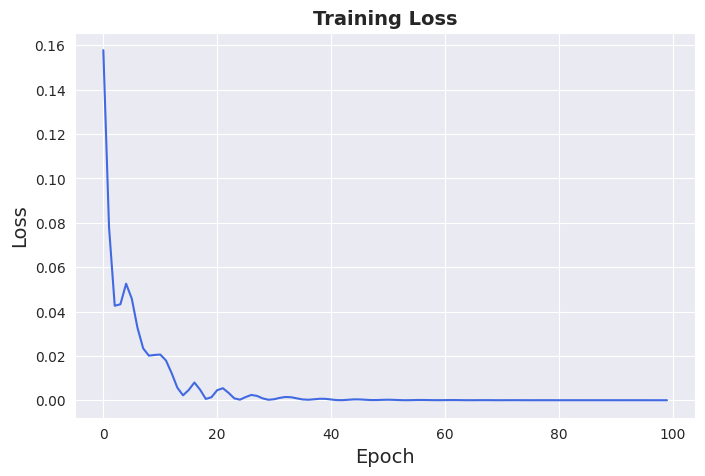

In [126]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(69)
gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
gru = to_device(gru, device)

#training and evaluating model
evaluate_single_model(gru, num_epochs, lr, loss_type, optimiser, time_step)

In [127]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with GRU

In [128]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

GRU_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(69)
            gru_exp = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            gru_exp = to_device(gru_exp, device)

            #training and evaluating model
            GRU_res = evaluate_model_experiments(gru_exp, num_epochs, lr, loss_type, optimiser, time_step)
            GRU_results += [GRU_res.iloc[0]]
            print()


Time Step = 20 | Hidden States = 2 | Num Layers = 1



<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.35773345828056335
Epoch  1 MSE:  0.3107876479625702
Epoch  2 MSE:  0.26811084151268005
Epoch  3 MSE:  0.2298194020986557
Epoch  4 MSE:  0.19595211744308472
Epoch  5 MSE:  0.16646982729434967
Epoch  6 MSE:  0.14126171171665192
Epoch  7 MSE:  0.12015721201896667
Epoch  8 MSE:  0.10293921083211899
Epoch  9 MSE:  0.08935222029685974
Epoch  10 MSE:  0.07910400629043579
Epoch  11 MSE:  0.07186172157526016
Epoch  12 MSE:  0.06724710762500763
Epoch  13 MSE:  0.06483490765094757
Epoch  14 MSE:  0.06415838748216629
Epoch  15 MSE:  0.06472509354352951
Epoch  16 MSE:  0.06604357808828354
Epoch  17 MSE:  0.06765887886285782
Epoch  18 MSE:  0.06918835639953613
Epoch  19 MSE:  0.07034802436828613
Epoch  20 MSE:  0.07096227258443832
Epoch  21 MSE:  0.07095734775066376
Epoch  22 MSE:  0.07034359127283096
Epoch  23 MSE:  0.0691925659775734
Epoch  24 MSE:  0.06761404126882553
Epoch  25 MSE:  0.06573554873466492
Epoch  26 MSE:  0.06368593871593475
Epoch  27 MSE:  0.061583634465932846
Epoc

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.14953142404556274
Epoch  1 MSE:  0.12455373257398605
Epoch  2 MSE:  0.10434006154537201
Epoch  3 MSE:  0.08874984085559845
Epoch  4 MSE:  0.07745096832513809
Epoch  5 MSE:  0.06996794790029526
Epoch  6 MSE:  0.06573604047298431
Epoch  7 MSE:  0.06410209089517593
Epoch  8 MSE:  0.06434453278779984
Epoch  9 MSE:  0.0657263919711113
Epoch  10 MSE:  0.06756743043661118
Epoch  11 MSE:  0.0693146288394928
Epoch  12 MSE:  0.07058757543563843
Epoch  13 MSE:  0.071186862885952
Epoch  14 MSE:  0.07106953114271164
Epoch  15 MSE:  0.07030724734067917
Epoch  16 MSE:  0.06904236972332001
Epoch  17 MSE:  0.06745083630084991
Epoch  18 MSE:  0.06571430712938309
Epoch  19 MSE:  0.06400000303983688
Epoch  20 MSE:  0.062446173280477524
Epoch  21 MSE:  0.061152298003435135
Epoch  22 MSE:  0.06017383560538292
Epoch  23 MSE:  0.05952142924070358
Epoch  24 MSE:  0.05916474014520645
Epoch  25 MSE:  0.05904052034020424
Epoch  26 MSE:  0.059064220637083054
Epoch  27 MSE:  0.059143632650375366
Ep

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.12424622476100922
Epoch  1 MSE:  0.10964560508728027
Epoch  2 MSE:  0.1005120575428009
Epoch  3 MSE:  0.09622111916542053
Epoch  4 MSE:  0.09497962892055511
Epoch  5 MSE:  0.09444216638803482
Epoch  6 MSE:  0.09317893534898758
Epoch  7 MSE:  0.090822234749794
Epoch  8 MSE:  0.08758988976478577
Epoch  9 MSE:  0.08389604091644287
Epoch  10 MSE:  0.08014778047800064
Epoch  11 MSE:  0.0766613781452179
Epoch  12 MSE:  0.07363005727529526
Epoch  13 MSE:  0.07111156731843948
Epoch  14 MSE:  0.06902580708265305
Epoch  15 MSE:  0.06717076152563095
Epoch  16 MSE:  0.06528366357088089
Epoch  17 MSE:  0.06314782798290253
Epoch  18 MSE:  0.06068039685487747
Epoch  19 MSE:  0.057948071509599686
Epoch  20 MSE:  0.05512065440416336
Epoch  21 MSE:  0.05239337310194969
Epoch  22 MSE:  0.04989970847964287
Epoch  23 MSE:  0.047631166875362396
Epoch  24 MSE:  0.04542230814695358
Epoch  25 MSE:  0.04306358844041824
Epoch  26 MSE:  0.04044247046113014
Epoch  27 MSE:  0.0375882089138031
Epoch

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11637771874666214
Epoch  1 MSE:  0.09991570562124252
Epoch  2 MSE:  0.08584617078304291
Epoch  3 MSE:  0.07463660091161728
Epoch  4 MSE:  0.0666167140007019
Epoch  5 MSE:  0.0619320385158062
Epoch  6 MSE:  0.060447558760643005
Epoch  7 MSE:  0.06152623891830444
Epoch  8 MSE:  0.06384630501270294
Epoch  9 MSE:  0.06587406992912292
Epoch  10 MSE:  0.06670156866312027
Epoch  11 MSE:  0.06621634215116501
Epoch  12 MSE:  0.06477601081132889
Epoch  13 MSE:  0.06288333982229233
Epoch  14 MSE:  0.060991011559963226
Epoch  15 MSE:  0.05941176041960716
Epoch  16 MSE:  0.058296289294958115
Epoch  17 MSE:  0.057652417570352554
Epoch  18 MSE:  0.0573863610625267
Epoch  19 MSE:  0.057351090013980865
Epoch  20 MSE:  0.05738995596766472
Epoch  21 MSE:  0.057368289679288864
Epoch  22 MSE:  0.05719100683927536
Epoch  23 MSE:  0.05680796876549721
Epoch  24 MSE:  0.05621105432510376
Epoch  25 MSE:  0.05542634427547455
Epoch  26 MSE:  0.05450388044118881
Epoch  27 MSE:  0.05350586399435997

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.0844373106956482
Epoch  1 MSE:  0.06784626096487045
Epoch  2 MSE:  0.06103792414069176
Epoch  3 MSE:  0.06060019135475159
Epoch  4 MSE:  0.06080814078450203
Epoch  5 MSE:  0.058762528002262115
Epoch  6 MSE:  0.05480567738413811
Epoch  7 MSE:  0.05016196519136429
Epoch  8 MSE:  0.04587194323539734
Epoch  9 MSE:  0.04250366613268852
Epoch  10 MSE:  0.0401083342730999
Epoch  11 MSE:  0.03831500560045242
Epoch  12 MSE:  0.036565423011779785
Epoch  13 MSE:  0.034413695335388184
Epoch  14 MSE:  0.03172624111175537
Epoch  15 MSE:  0.028682159259915352
Epoch  16 MSE:  0.02562440186738968
Epoch  17 MSE:  0.022868230938911438
Epoch  18 MSE:  0.020546989515423775
Epoch  19 MSE:  0.018554020673036575
Epoch  20 MSE:  0.016619151458144188
Epoch  21 MSE:  0.014489397406578064
Epoch  22 MSE:  0.012097889557480812
Epoch  23 MSE:  0.009610929526388645
Epoch  24 MSE:  0.007334375753998756
Epoch  25 MSE:  0.005527373868972063
Epoch  26 MSE:  0.0042113326489925385
Epoch  27 MSE:  0.0031320

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.5861775875091553
Epoch  1 MSE:  0.41077983379364014
Epoch  2 MSE:  0.27090200781822205
Epoch  3 MSE:  0.16494223475456238
Epoch  4 MSE:  0.09522832930088043
Epoch  5 MSE:  0.06300029903650284
Epoch  6 MSE:  0.06498365104198456
Epoch  7 MSE:  0.08652513474225998
Epoch  8 MSE:  0.10601713508367538
Epoch  9 MSE:  0.11252174526453018
Epoch  10 MSE:  0.10660621523857117
Epoch  11 MSE:  0.09334340691566467
Epoch  12 MSE:  0.07803060859441757
Epoch  13 MSE:  0.06448403000831604
Epoch  14 MSE:  0.054685864597558975
Epoch  15 MSE:  0.04907749965786934
Epoch  16 MSE:  0.04709066078066826
Epoch  17 MSE:  0.04767067730426788
Epoch  18 MSE:  0.049669504165649414
Epoch  19 MSE:  0.052082452923059464
Epoch  20 MSE:  0.05415711551904678
Epoch  21 MSE:  0.05541769042611122
Epoch  22 MSE:  0.05564188212156296
Epoch  23 MSE:  0.054816197603940964
Epoch  24 MSE:  0.05308428779244423
Epoch  25 MSE:  0.050695501267910004
Epoch  26 MSE:  0.04795582965016365
Epoch  27 MSE:  0.0451819337904453

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.19856956601142883
Epoch  1 MSE:  0.12608252465724945
Epoch  2 MSE:  0.07295701652765274
Epoch  3 MSE:  0.0446334034204483
Epoch  4 MSE:  0.046013087034225464
Epoch  5 MSE:  0.06362488865852356
Epoch  6 MSE:  0.06852933764457703
Epoch  7 MSE:  0.059264689683914185
Epoch  8 MSE:  0.04617024585604668
Epoch  9 MSE:  0.03637542575597763
Epoch  10 MSE:  0.03196192532777786
Epoch  11 MSE:  0.03180832043290138
Epoch  12 MSE:  0.033629160374403
Epoch  13 MSE:  0.03531419858336449
Epoch  14 MSE:  0.03555024042725563
Epoch  15 MSE:  0.03391724452376366
Epoch  16 MSE:  0.030698880553245544
Epoch  17 MSE:  0.02660665661096573
Epoch  18 MSE:  0.022511160001158714
Epoch  19 MSE:  0.01919652707874775
Epoch  20 MSE:  0.017139339819550514
Epoch  21 MSE:  0.016346586868166924
Epoch  22 MSE:  0.016334790736436844
Epoch  23 MSE:  0.016328558325767517
Epoch  24 MSE:  0.015637651085853577
Epoch  25 MSE:  0.01400208193808794
Epoch  26 MSE:  0.011679209768772125
Epoch  27 MSE:  0.0092410296201

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.20397037267684937
Epoch  1 MSE:  0.09249015152454376
Epoch  2 MSE:  0.04827047139406204
Epoch  3 MSE:  0.07789439707994461
Epoch  4 MSE:  0.07901796698570251
Epoch  5 MSE:  0.058211758732795715
Epoch  6 MSE:  0.044937510043382645
Epoch  7 MSE:  0.04306044429540634
Epoch  8 MSE:  0.04629078507423401
Epoch  9 MSE:  0.048989709466695786
Epoch  10 MSE:  0.04873267933726311
Epoch  11 MSE:  0.04548031464219093
Epoch  12 MSE:  0.04040144383907318
Epoch  13 MSE:  0.03513733297586441
Epoch  14 MSE:  0.03130606561899185
Epoch  15 MSE:  0.029887210577726364
Epoch  16 MSE:  0.030312631279230118
Epoch  17 MSE:  0.030269885435700417
Epoch  18 MSE:  0.027895532548427582
Epoch  19 MSE:  0.02362758293747902
Epoch  20 MSE:  0.01931641809642315
Epoch  21 MSE:  0.01638161763548851
Epoch  22 MSE:  0.01486763171851635
Epoch  23 MSE:  0.013725291937589645
Epoch  24 MSE:  0.011747611686587334
Epoch  25 MSE:  0.00849101785570383
Epoch  26 MSE:  0.004743970464915037
Epoch  27 MSE:  0.0021876175

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1573631465435028
Epoch  1 MSE:  0.07790601998567581
Epoch  2 MSE:  0.04264669492840767
Epoch  3 MSE:  0.043411802500486374
Epoch  4 MSE:  0.0525742806494236
Epoch  5 MSE:  0.045720960944890976
Epoch  6 MSE:  0.03260393813252449
Epoch  7 MSE:  0.02336595579981804
Epoch  8 MSE:  0.020099300891160965
Epoch  9 MSE:  0.020407138392329216
Epoch  10 MSE:  0.020557790994644165
Epoch  11 MSE:  0.017848599702119827
Epoch  12 MSE:  0.012074264697730541
Epoch  13 MSE:  0.005546914413571358
Epoch  14 MSE:  0.002194825792685151
Epoch  15 MSE:  0.004775825887918472
Epoch  16 MSE:  0.008037551306188107
Epoch  17 MSE:  0.004631787538528442
Epoch  18 MSE:  0.0005881446413695812
Epoch  19 MSE:  0.0015274216420948505
Epoch  20 MSE:  0.004670534748584032
Epoch  21 MSE:  0.005420326720923185
Epoch  22 MSE:  0.0032831982243806124
Epoch  23 MSE:  0.0008334165322594345
Epoch  24 MSE:  0.0003117503656540066
Epoch  25 MSE:  0.0015165931545197964
Epoch  26 MSE:  0.0024415655061602592
Epoch  27 MS

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2975592315196991
Epoch  1 MSE:  0.09742023795843124
Epoch  2 MSE:  0.057873502373695374
Epoch  3 MSE:  0.08896148949861526
Epoch  4 MSE:  0.0625516027212143
Epoch  5 MSE:  0.04016208276152611
Epoch  6 MSE:  0.039800118654966354
Epoch  7 MSE:  0.04574435204267502
Epoch  8 MSE:  0.043701305985450745
Epoch  9 MSE:  0.03293773531913757
Epoch  10 MSE:  0.020445358008146286
Epoch  11 MSE:  0.014345420524477959
Epoch  12 MSE:  0.017140576615929604
Epoch  13 MSE:  0.017738383263349533
Epoch  14 MSE:  0.00881600845605135
Epoch  15 MSE:  0.0006993354763835669
Epoch  16 MSE:  0.003432606812566519
Epoch  17 MSE:  0.010469193570315838
Epoch  18 MSE:  0.009083674289286137
Epoch  19 MSE:  0.003402494126930833
Epoch  20 MSE:  0.002265430986881256
Epoch  21 MSE:  0.004334741272032261
Epoch  22 MSE:  0.003973798826336861
Epoch  23 MSE:  0.0017441094387322664
Epoch  24 MSE:  0.0007964181713759899
Epoch  25 MSE:  0.001728762872517109
Epoch  26 MSE:  0.0031540708150714636
Epoch  27 MSE:  0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3585108518600464
Epoch  1 MSE:  0.3114909529685974
Epoch  2 MSE:  0.2687363028526306
Epoch  3 MSE:  0.23036500811576843
Epoch  4 MSE:  0.19641737639904022
Epoch  5 MSE:  0.16685549914836884
Epoch  6 MSE:  0.14156943559646606
Epoch  7 MSE:  0.12038955092430115
Epoch  8 MSE:  0.10309942811727524
Epoch  9 MSE:  0.08944451808929443
Epoch  10 MSE:  0.07913365960121155
Epoch  11 MSE:  0.07183538377285004
Epoch  12 MSE:  0.06717284768819809
Epoch  13 MSE:  0.06472213566303253
Epoch  14 MSE:  0.06401770561933517
Epoch  15 MSE:  0.06456761062145233
Epoch  16 MSE:  0.0658802017569542
Epoch  17 MSE:  0.0674993246793747
Epoch  18 MSE:  0.06904035806655884
Epoch  19 MSE:  0.0702168196439743
Epoch  20 MSE:  0.07085055857896805
Epoch  21 MSE:  0.07086557149887085
Epoch  22 MSE:  0.07027037441730499
Epoch  23 MSE:  0.06913533806800842
Epoch  24 MSE:  0.06756953150033951
Epoch  25 MSE:  0.0657002329826355
Epoch  26 MSE:  0.06365643441677094
Epoch  27 MSE:  0.061556920409202576
Epoch  2

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.14920683205127716
Epoch  1 MSE:  0.12429201602935791
Epoch  2 MSE:  0.10413110256195068
Epoch  3 MSE:  0.08858361095190048
Epoch  4 MSE:  0.07731837034225464
Epoch  5 MSE:  0.06986001878976822
Epoch  6 MSE:  0.06564398109912872
Epoch  7 MSE:  0.06401820480823517
Epoch  8 MSE:  0.06426284462213516
Epoch  9 MSE:  0.06564292311668396
Epoch  10 MSE:  0.06748010963201523
Epoch  11 MSE:  0.06922280788421631
Epoch  12 MSE:  0.07049161195755005
Epoch  13 MSE:  0.07108763605356216
Epoch  14 MSE:  0.07096821814775467
Epoch  15 MSE:  0.07020516693592072
Epoch  16 MSE:  0.06894082576036453
Epoch  17 MSE:  0.06735101342201233
Epoch  18 MSE:  0.06561718881130219
Epoch  19 MSE:  0.06390631198883057
Epoch  20 MSE:  0.06235633045434952
Epoch  21 MSE:  0.0610663965344429
Epoch  22 MSE:  0.06009167060256004
Epoch  23 MSE:  0.05944254994392395
Epoch  24 MSE:  0.05908850207924843
Epoch  25 MSE:  0.058966170996427536
Epoch  26 MSE:  0.05899099260568619
Epoch  27 MSE:  0.059070803225040436
E

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.12439732998609543
Epoch  1 MSE:  0.10968171060085297
Epoch  2 MSE:  0.1004394143819809
Epoch  3 MSE:  0.09606501460075378
Epoch  4 MSE:  0.09480214864015579
Epoch  5 MSE:  0.09430216997861862
Epoch  6 MSE:  0.09309908747673035
Epoch  7 MSE:  0.09079686552286148
Epoch  8 MSE:  0.08760052174329758
Epoch  9 MSE:  0.08392221480607986
Epoch  10 MSE:  0.08017220348119736
Epoch  11 MSE:  0.07667206972837448
Epoch  12 MSE:  0.07362139970064163
Epoch  13 MSE:  0.07108516991138458
Epoch  14 MSE:  0.06899117678403854
Epoch  15 MSE:  0.0671444907784462
Epoch  16 MSE:  0.06528431177139282
Epoch  17 MSE:  0.06318769603967667
Epoch  18 MSE:  0.060759950429201126
Epoch  19 MSE:  0.05805622413754463
Epoch  20 MSE:  0.05523943528532982
Epoch  21 MSE:  0.052505090832710266
Epoch  22 MSE:  0.04999568685889244
Epoch  23 MSE:  0.04771939292550087
Epoch  24 MSE:  0.04552477225661278
Epoch  25 MSE:  0.043200183659791946
Epoch  26 MSE:  0.040618542581796646
Epoch  27 MSE:  0.03779362514615059


<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11667627096176147
Epoch  1 MSE:  0.10014988481998444
Epoch  2 MSE:  0.08601250499486923
Epoch  3 MSE:  0.07473277300596237
Epoch  4 MSE:  0.06664249300956726
Epoch  5 MSE:  0.06189056113362312
Epoch  6 MSE:  0.06034860387444496
Epoch  7 MSE:  0.06139224022626877
Epoch  8 MSE:  0.0637122094631195
Epoch  9 MSE:  0.06576932966709137
Epoch  10 MSE:  0.06663567572832108
Epoch  11 MSE:  0.06618241965770721
Epoch  12 MSE:  0.06475993245840073
Epoch  13 MSE:  0.06287074089050293
Epoch  14 MSE:  0.06097105145454407
Epoch  15 MSE:  0.05937851220369339
Epoch  16 MSE:  0.058248646557331085
Epoch  17 MSE:  0.05759298801422119
Epoch  18 MSE:  0.0573200099170208
Epoch  19 MSE:  0.057283464819192886
Epoch  20 MSE:  0.057326290756464005
Epoch  21 MSE:  0.0573127306997776
Epoch  22 MSE:  0.05714628845453262
Epoch  23 MSE:  0.056775469332933426
Epoch  24 MSE:  0.05619093403220177
Epoch  25 MSE:  0.055417850613594055
Epoch  26 MSE:  0.05450563132762909
Epoch  27 MSE:  0.0535162016749382
E

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.08454461395740509
Epoch  1 MSE:  0.0678388848900795
Epoch  2 MSE:  0.060934796929359436
Epoch  3 MSE:  0.06046941876411438
Epoch  4 MSE:  0.06073616072535515
Epoch  5 MSE:  0.05876457318663597
Epoch  6 MSE:  0.05485275760293007
Epoch  7 MSE:  0.05021916702389717
Epoch  8 MSE:  0.04591451585292816
Epoch  9 MSE:  0.042523302137851715
Epoch  10 MSE:  0.040114663541316986
Epoch  11 MSE:  0.03833102062344551
Epoch  12 MSE:  0.03661613166332245
Epoch  13 MSE:  0.034513093531131744
Epoch  14 MSE:  0.031871020793914795
Epoch  15 MSE:  0.028854992240667343
Epoch  16 MSE:  0.025803204625844955
Epoch  17 MSE:  0.023036906495690346
Epoch  18 MSE:  0.020703915506601334
Epoch  19 MSE:  0.01871333457529545
Epoch  20 MSE:  0.01680161990225315
Epoch  21 MSE:  0.014707738533616066
Epoch  22 MSE:  0.012346523813903332
Epoch  23 MSE:  0.009866347536444664
Epoch  24 MSE:  0.007566074840724468
Epoch  25 MSE:  0.0057156821712851524
Epoch  26 MSE:  0.0043627601116895676
Epoch  27 MSE:  0.0032

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.5873343348503113
Epoch  1 MSE:  0.4116632342338562
Epoch  2 MSE:  0.27153337001800537
Epoch  3 MSE:  0.1653321087360382
Epoch  4 MSE:  0.09539120644330978
Epoch  5 MSE:  0.06295911222696304
Epoch  6 MSE:  0.0648004338145256
Epoch  7 MSE:  0.08633540570735931
Epoch  8 MSE:  0.10592649132013321
Epoch  9 MSE:  0.11254184693098068
Epoch  10 MSE:  0.10669779032468796
Epoch  11 MSE:  0.09345706552267075
Epoch  12 MSE:  0.07812706381082535
Epoch  13 MSE:  0.06454106420278549
Epoch  14 MSE:  0.05469772219657898
Epoch  15 MSE:  0.04905063658952713
Epoch  16 MSE:  0.04703829064965248
Epoch  17 MSE:  0.04760729521512985
Epoch  18 MSE:  0.049606677144765854
Epoch  19 MSE:  0.05202753096818924
Epoch  20 MSE:  0.05411398410797119
Epoch  21 MSE:  0.05538776516914368
Epoch  22 MSE:  0.055624958127737045
Epoch  23 MSE:  0.05481088533997536
Epoch  24 MSE:  0.053088415414094925
Epoch  25 MSE:  0.05070636421442032
Epoch  26 MSE:  0.04797050356864929
Epoch  27 MSE:  0.045197512954473495
Ep

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1990758329629898
Epoch  1 MSE:  0.12640811502933502
Epoch  2 MSE:  0.07310495525598526
Epoch  3 MSE:  0.04461075738072395
Epoch  4 MSE:  0.04586833342909813
Epoch  5 MSE:  0.06354299187660217
Epoch  6 MSE:  0.06857515126466751
Epoch  7 MSE:  0.05935576930642128
Epoch  8 MSE:  0.04623615741729736
Epoch  9 MSE:  0.036393340677022934
Epoch  10 MSE:  0.031942661851644516
Epoch  11 MSE:  0.031775716692209244
Epoch  12 MSE:  0.03360581025481224
Epoch  13 MSE:  0.03531457483768463
Epoch  14 MSE:  0.03557930886745453
Epoch  15 MSE:  0.03397231176495552
Epoch  16 MSE:  0.030772371217608452
Epoch  17 MSE:  0.02668863907456398
Epoch  18 MSE:  0.02259160578250885
Epoch  19 MSE:  0.019267572090029716
Epoch  20 MSE:  0.01719766855239868
Epoch  21 MSE:  0.01639542728662491
Epoch  22 MSE:  0.016383914276957512
Epoch  23 MSE:  0.016390766948461533
Epoch  24 MSE:  0.01572243683040142
Epoch  25 MSE:  0.014110325835645199
Epoch  26 MSE:  0.011802641674876213
Epoch  27 MSE:  0.009366716258

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.20448537170886993
Epoch  1 MSE:  0.09266720712184906
Epoch  2 MSE:  0.04818044602870941
Epoch  3 MSE:  0.0778888538479805
Epoch  4 MSE:  0.07904252409934998
Epoch  5 MSE:  0.05819128453731537
Epoch  6 MSE:  0.04489319026470184
Epoch  7 MSE:  0.04300974681973457
Epoch  8 MSE:  0.046241797506809235
Epoch  9 MSE:  0.048949312418699265
Epoch  10 MSE:  0.048705458641052246
Epoch  11 MSE:  0.045467521995306015
Epoch  12 MSE:  0.04040106385946274
Epoch  13 MSE:  0.03514505922794342
Epoch  14 MSE:  0.031317126005887985
Epoch  15 MSE:  0.029898924753069878
Epoch  16 MSE:  0.030329501256346703
Epoch  17 MSE:  0.03030366636812687
Epoch  18 MSE:  0.027952995151281357
Epoch  19 MSE:  0.02370457537472248
Epoch  20 MSE:  0.019402507692575455
Epoch  21 MSE:  0.016468649730086327
Epoch  22 MSE:  0.014955967664718628
Epoch  23 MSE:  0.013824282214045525
Epoch  24 MSE:  0.011868791654706001
Epoch  25 MSE:  0.008634701371192932
Epoch  26 MSE:  0.00488527724519372
Epoch  27 MSE:  0.0022790

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.15777215361595154
Epoch  1 MSE:  0.0780758187174797
Epoch  2 MSE:  0.0426214262843132
Epoch  3 MSE:  0.043287139385938644
Epoch  4 MSE:  0.0525701642036438
Epoch  5 MSE:  0.045799076557159424
Epoch  6 MSE:  0.032677531242370605
Epoch  7 MSE:  0.02341476082801819
Epoch  8 MSE:  0.020134860649704933
Epoch  9 MSE:  0.02045070193707943
Epoch  10 MSE:  0.02063543163239956
Epoch  11 MSE:  0.017978504300117493
Epoch  12 MSE:  0.012248015031218529
Epoch  13 MSE:  0.005713060963898897
Epoch  14 MSE:  0.0022568993736058474
Epoch  15 MSE:  0.004686620552092791
Epoch  16 MSE:  0.008036843501031399
Epoch  17 MSE:  0.004779371432960033
Epoch  18 MSE:  0.0006309795426204801
Epoch  19 MSE:  0.0014191283844411373
Epoch  20 MSE:  0.0045829820446670055
Epoch  21 MSE:  0.005454456899315119
Epoch  22 MSE:  0.0033808776643127203
Epoch  23 MSE:  0.0008945713052526116
Epoch  24 MSE:  0.0003026770136784762
Epoch  25 MSE:  0.0014852819731459022
Epoch  26 MSE:  0.002439839532598853
Epoch  27 MSE

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2982642352581024
Epoch  1 MSE:  0.09764649718999863
Epoch  2 MSE:  0.05766591057181358
Epoch  3 MSE:  0.08906097710132599
Epoch  4 MSE:  0.06269118189811707
Epoch  5 MSE:  0.04017188772559166
Epoch  6 MSE:  0.039752766489982605
Epoch  7 MSE:  0.04575235769152641
Epoch  8 MSE:  0.04381658136844635
Epoch  9 MSE:  0.03312588110566139
Epoch  10 MSE:  0.02062252163887024
Epoch  11 MSE:  0.014422832056879997
Epoch  12 MSE:  0.017154645174741745
Epoch  13 MSE:  0.01789030246436596
Epoch  14 MSE:  0.009069547988474369
Epoch  15 MSE:  0.0007909021223895252
Epoch  16 MSE:  0.0032454291358590126
Epoch  17 MSE:  0.010334786958992481
Epoch  18 MSE:  0.009187559597194195
Epoch  19 MSE:  0.00350075657479465
Epoch  20 MSE:  0.002243630588054657
Epoch  21 MSE:  0.004331663716584444
Epoch  22 MSE:  0.004029836971312761
Epoch  23 MSE:  0.0017729273531585932
Epoch  24 MSE:  0.0007671757484786212
Epoch  25 MSE:  0.001676401006989181
Epoch  26 MSE:  0.0031167122069746256
Epoch  27 MSE:  0.0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.3602793216705322
Epoch  1 MSE:  0.3130650222301483
Epoch  2 MSE:  0.2701195776462555
Epoch  3 MSE:  0.23156216740608215
Epoch  4 MSE:  0.19743402302265167
Epoch  5 MSE:  0.16769802570343018
Epoch  6 MSE:  0.1422450989484787
Epoch  7 MSE:  0.12090632319450378
Epoch  8 MSE:  0.10346613824367523
Epoch  9 MSE:  0.08967123180627823
Epoch  10 MSE:  0.07923208177089691
Epoch  11 MSE:  0.07181929051876068
Epoch  12 MSE:  0.06705845892429352
Epoch  13 MSE:  0.06452822685241699
Epoch  14 MSE:  0.06376517564058304
Epoch  15 MSE:  0.06427865475416183
Epoch  16 MSE:  0.06557685881853104
Epoch  17 MSE:  0.06720156967639923
Epoch  18 MSE:  0.06876442581415176
Epoch  19 MSE:  0.06997402757406235
Epoch  20 MSE:  0.07064702361822128
Epoch  21 MSE:  0.07070264220237732
Epoch  22 MSE:  0.07014559209346771
Epoch  23 MSE:  0.06904356181621552
Epoch  24 MSE:  0.06750403344631195
Epoch  25 MSE:  0.06565366685390472
Epoch  26 MSE:  0.0636216551065445
Epoch  27 MSE:  0.06152750179171562
Epoch  

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.14809663593769073
Epoch  1 MSE:  0.12332828342914581
Epoch  2 MSE:  0.10331364721059799
Epoch  3 MSE:  0.08791039884090424
Epoch  4 MSE:  0.07678423821926117
Epoch  5 MSE:  0.06945548951625824
Epoch  6 MSE:  0.06535429507493973
Epoch  7 MSE:  0.06382246315479279
Epoch  8 MSE:  0.0641343891620636
Epoch  9 MSE:  0.06555140763521194
Epoch  10 MSE:  0.06739527732133865
Epoch  11 MSE:  0.06911886483430862
Epoch  12 MSE:  0.07035043835639954
Epoch  13 MSE:  0.07090006023645401
Epoch  14 MSE:  0.07073333859443665
Epoch  15 MSE:  0.0699286237359047
Epoch  16 MSE:  0.06863275915384293
Epoch  17 MSE:  0.06702413409948349
Epoch  18 MSE:  0.06528516858816147
Epoch  19 MSE:  0.06358225643634796
Epoch  20 MSE:  0.06205145642161369
Epoch  21 MSE:  0.06078897789120674
Epoch  22 MSE:  0.05984620749950409
Epoch  23 MSE:  0.05922940745949745
Epoch  24 MSE:  0.058904018253088
Epoch  25 MSE:  0.0588032603263855
Epoch  26 MSE:  0.058840230107307434
Epoch  27 MSE:  0.058921847492456436
Epoch

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.12470897287130356
Epoch  1 MSE:  0.10977967083454132
Epoch  2 MSE:  0.10033267736434937
Epoch  3 MSE:  0.09579846262931824
Epoch  4 MSE:  0.0944894403219223
Epoch  5 MSE:  0.09405583143234253
Epoch  6 MSE:  0.09296565502882004
Epoch  7 MSE:  0.09076865017414093
Epoch  8 MSE:  0.0876440554857254
Epoch  9 MSE:  0.08399876952171326
Epoch  10 MSE:  0.0802479013800621
Epoch  11 MSE:  0.07672211527824402
Epoch  12 MSE:  0.07363248616456985
Epoch  13 MSE:  0.07105737924575806
Epoch  14 MSE:  0.06893976032733917
Epoch  15 MSE:  0.06709910929203033
Epoch  16 MSE:  0.0652802586555481
Epoch  17 MSE:  0.06325004994869232
Epoch  18 MSE:  0.060891956090927124
Epoch  19 MSE:  0.05823866277933121
Epoch  20 MSE:  0.05543907359242439
Epoch  21 MSE:  0.052688051015138626
Epoch  22 MSE:  0.05014308542013168
Epoch  23 MSE:  0.047841813415288925
Epoch  24 MSE:  0.045660410076379776
Epoch  25 MSE:  0.04338788986206055
Epoch  26 MSE:  0.040873248130083084
Epoch  27 MSE:  0.038102466613054276


<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1172589659690857
Epoch  1 MSE:  0.1006108969449997
Epoch  2 MSE:  0.08634675294160843
Epoch  3 MSE:  0.07493662089109421
Epoch  4 MSE:  0.06671478599309921
Epoch  5 MSE:  0.061835385859012604
Epoch  6 MSE:  0.06018197536468506
Epoch  7 MSE:  0.06115458905696869
Epoch  8 MSE:  0.06347037106752396
Epoch  9 MSE:  0.06558240950107574
Epoch  10 MSE:  0.06652454286813736
Epoch  11 MSE:  0.06613493710756302
Epoch  12 MSE:  0.06474873423576355
Epoch  13 MSE:  0.0628671795129776
Epoch  14 MSE:  0.060953039675951004
Epoch  15 MSE:  0.05933360755443573
Epoch  16 MSE:  0.05817398056387901
Epoch  17 MSE:  0.05749332159757614
Epoch  18 MSE:  0.057204797863960266
Epoch  19 MSE:  0.057163920253515244
Epoch  20 MSE:  0.0572129525244236
Epoch  21 MSE:  0.05721394345164299
Epoch  22 MSE:  0.05706753954291344
Epoch  23 MSE:  0.056719373911619186
Epoch  24 MSE:  0.056157659739255905
Epoch  25 MSE:  0.05540565401315689
Epoch  26 MSE:  0.054511524736881256
Epoch  27 MSE:  0.05353667587041855

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.08478403836488724
Epoch  1 MSE:  0.0678519681096077
Epoch  2 MSE:  0.060756903141736984
Epoch  3 MSE:  0.0602303221821785
Epoch  4 MSE:  0.060605354607105255
Epoch  5 MSE:  0.05877487733960152
Epoch  6 MSE:  0.05494789779186249
Epoch  7 MSE:  0.050329066812992096
Epoch  8 MSE:  0.04598718509078026
Epoch  9 MSE:  0.042537711560726166
Epoch  10 MSE:  0.04008465260267258
Epoch  11 MSE:  0.03829815611243248
Epoch  12 MSE:  0.03662900626659393
Epoch  13 MSE:  0.034601736813783646
Epoch  14 MSE:  0.03203292563557625
Epoch  15 MSE:  0.029060060158371925
Epoch  16 MSE:  0.026011142879724503
Epoch  17 MSE:  0.023217638954520226
Epoch  18 MSE:  0.020853087306022644
Epoch  19 MSE:  0.018855344504117966
Epoch  20 MSE:  0.01697520725429058
Epoch  21 MSE:  0.014940330758690834
Epoch  22 MSE:  0.012634651735424995
Epoch  23 MSE:  0.010174928233027458
Epoch  24 MSE:  0.00784667395055294
Epoch  25 MSE:  0.005936438217759132
Epoch  26 MSE:  0.004534685518592596
Epoch  27 MSE:  0.0034438

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.589693546295166
Epoch  1 MSE:  0.4134948253631592
Epoch  2 MSE:  0.2728869318962097
Epoch  3 MSE:  0.16620832681655884
Epoch  4 MSE:  0.09579364955425262
Epoch  5 MSE:  0.06291669607162476
Epoch  6 MSE:  0.06442565470933914
Epoch  7 MSE:  0.08590735495090485
Epoch  8 MSE:  0.10569197684526443
Epoch  9 MSE:  0.11254838854074478
Epoch  10 MSE:  0.10687283426523209
Epoch  11 MSE:  0.09369686245918274
Epoch  12 MSE:  0.07834362238645554
Epoch  13 MSE:  0.06468020379543304
Epoch  14 MSE:  0.05474010482430458
Epoch  15 MSE:  0.049003586173057556
Epoch  16 MSE:  0.04692478105425835
Epoch  17 MSE:  0.04745648428797722
Epoch  18 MSE:  0.0494469590485096
Epoch  19 MSE:  0.05188159644603729
Epoch  20 MSE:  0.05399635061621666
Epoch  21 MSE:  0.05530492961406708
Epoch  22 MSE:  0.05557684972882271
Epoch  23 MSE:  0.0547928512096405
Epoch  24 MSE:  0.05309300124645233
Epoch  25 MSE:  0.050724923610687256
Epoch  26 MSE:  0.04799443855881691
Epoch  27 MSE:  0.04521937668323517
Epoch 

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2000836730003357
Epoch  1 MSE:  0.1270669549703598
Epoch  2 MSE:  0.07341470569372177
Epoch  3 MSE:  0.04458426684141159
Epoch  4 MSE:  0.04560434818267822
Epoch  5 MSE:  0.06340181827545166
Epoch  6 MSE:  0.06867636740207672
Epoch  7 MSE:  0.05953973904252052
Epoch  8 MSE:  0.046370502561330795
Epoch  9 MSE:  0.03643609955906868
Epoch  10 MSE:  0.0319143570959568
Epoch  11 MSE:  0.0317210853099823
Epoch  12 MSE:  0.033567458391189575
Epoch  13 MSE:  0.035320114344358444
Epoch  14 MSE:  0.03563868999481201
Epoch  15 MSE:  0.03408091515302658
Epoch  16 MSE:  0.030916079878807068
Epoch  17 MSE:  0.02684861421585083
Epoch  18 MSE:  0.02274853177368641
Epoch  19 MSE:  0.019405990839004517
Epoch  20 MSE:  0.01731070689857006
Epoch  21 MSE:  0.01648872345685959
Epoch  22 MSE:  0.016475774347782135
Epoch  23 MSE:  0.01650555431842804
Epoch  24 MSE:  0.015878429636359215
Epoch  25 MSE:  0.014309224672615528
Epoch  26 MSE:  0.01202815305441618
Epoch  27 MSE:  0.0095928665250539

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.20551685988903046
Epoch  1 MSE:  0.09310959279537201
Epoch  2 MSE:  0.048035457730293274
Epoch  3 MSE:  0.07771246880292892
Epoch  4 MSE:  0.07919522374868393
Epoch  5 MSE:  0.058302029967308044
Epoch  6 MSE:  0.044864408671855927
Epoch  7 MSE:  0.04291411489248276
Epoch  8 MSE:  0.046160727739334106
Epoch  9 MSE:  0.04892205446958542
Epoch  10 MSE:  0.04873600974678993
Epoch  11 MSE:  0.045542266219854355
Epoch  12 MSE:  0.040499247610569
Epoch  13 MSE:  0.03524309769272804
Epoch  14 MSE:  0.03139285743236542
Epoch  15 MSE:  0.029944660142064095
Epoch  16 MSE:  0.030376460403203964
Epoch  17 MSE:  0.030414434149861336
Epoch  18 MSE:  0.02815629541873932
Epoch  19 MSE:  0.02396908402442932
Epoch  20 MSE:  0.019671985879540443
Epoch  21 MSE:  0.01670899987220764
Epoch  22 MSE:  0.015177219174802303
Epoch  23 MSE:  0.014070079661905766
Epoch  24 MSE:  0.01218236330896616
Epoch  25 MSE:  0.009015650488436222
Epoch  26 MSE:  0.005258934572339058
Epoch  27 MSE:  0.002519797

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.15859287977218628
Epoch  1 MSE:  0.07842828333377838
Epoch  2 MSE:  0.04258992522954941
Epoch  3 MSE:  0.04306252673268318
Epoch  4 MSE:  0.052576638758182526
Epoch  5 MSE:  0.04596180096268654
Epoch  6 MSE:  0.0328284427523613
Epoch  7 MSE:  0.0235140360891819
Epoch  8 MSE:  0.020204391330480576
Epoch  9 MSE:  0.020532555878162384
Epoch  10 MSE:  0.02078189328312874
Epoch  11 MSE:  0.01822582259774208
Epoch  12 MSE:  0.012580218724906445
Epoch  13 MSE:  0.0060331206768751144
Epoch  14 MSE:  0.0023846332915127277
Epoch  15 MSE:  0.004525953903794289
Epoch  16 MSE:  0.008023256435990334
Epoch  17 MSE:  0.005066222045570612
Epoch  18 MSE:  0.0007333951070904732
Epoch  19 MSE:  0.0012187822721898556
Epoch  20 MSE:  0.004405525978654623
Epoch  21 MSE:  0.005512584000825882
Epoch  22 MSE:  0.0035723259206861258
Epoch  23 MSE:  0.0010218153474852443
Epoch  24 MSE:  0.0002921486156992614
Epoch  25 MSE:  0.001426517148502171
Epoch  26 MSE:  0.002436433918774128
Epoch  27 MSE: 

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2996726632118225
Epoch  1 MSE:  0.09810855984687805
Epoch  2 MSE:  0.057315632700920105
Epoch  3 MSE:  0.0892825722694397
Epoch  4 MSE:  0.06294502317905426
Epoch  5 MSE:  0.04019135981798172
Epoch  6 MSE:  0.03969695791602135
Epoch  7 MSE:  0.04580281302332878
Epoch  8 MSE:  0.044047463685274124
Epoch  9 MSE:  0.03348248079419136
Epoch  10 MSE:  0.020968832075595856
Epoch  11 MSE:  0.01459816936403513
Epoch  12 MSE:  0.017201023176312447
Epoch  13 MSE:  0.018187472596764565
Epoch  14 MSE:  0.009581414982676506
Epoch  15 MSE:  0.0010033253347501159
Epoch  16 MSE:  0.002887299982830882
Epoch  17 MSE:  0.010039725340902805
Epoch  18 MSE:  0.00940194446593523
Epoch  19 MSE:  0.0037401968147605658
Epoch  20 MSE:  0.002235115971416235
Epoch  21 MSE:  0.004347493872046471
Epoch  22 MSE:  0.004159947857260704
Epoch  23 MSE:  0.0018436312675476074
Epoch  24 MSE:  0.000717486604116857
Epoch  25 MSE:  0.0015794854843989015
Epoch  26 MSE:  0.003051932668313384
Epoch  27 MSE:  0.0

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.36473190784454346
Epoch  1 MSE:  0.3170393705368042
Epoch  2 MSE:  0.2736242413520813
Epoch  3 MSE:  0.23460811376571655
Epoch  4 MSE:  0.20003463327884674
Epoch  5 MSE:  0.16986876726150513
Epoch  6 MSE:  0.14400333166122437
Epoch  7 MSE:  0.12227119505405426
Epoch  8 MSE:  0.10445898026227951
Epoch  9 MSE:  0.09031620621681213
Epoch  10 MSE:  0.07955744117498398
Epoch  11 MSE:  0.07185840606689453
Epoch  12 MSE:  0.06685066968202591
Epoch  13 MSE:  0.06411907821893692
Epoch  14 MSE:  0.06320569664239883
Epoch  15 MSE:  0.06362328678369522
Epoch  16 MSE:  0.0648798942565918
Epoch  17 MSE:  0.06651276350021362
Epoch  18 MSE:  0.06812461465597153
Epoch  19 MSE:  0.06941218674182892
Epoch  20 MSE:  0.07017938792705536
Epoch  21 MSE:  0.07033360004425049
Epoch  22 MSE:  0.06986996531486511
Epoch  23 MSE:  0.06884924322366714
Epoch  24 MSE:  0.0673748105764389
Epoch  25 MSE:  0.065571628510952
Epoch  26 MSE:  0.06356913596391678
Epoch  27 MSE:  0.06148851290345192
Epoch  2

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.14542269706726074
Epoch  1 MSE:  0.12101346254348755
Epoch  2 MSE:  0.10135779529809952
Epoch  3 MSE:  0.08630914241075516
Epoch  4 MSE:  0.07552524656057358
Epoch  5 MSE:  0.0685160905122757
Epoch  6 MSE:  0.06469879299402237
Epoch  7 MSE:  0.06339962035417557
Epoch  8 MSE:  0.06387795507907867
Epoch  9 MSE:  0.06538542360067368
Epoch  10 MSE:  0.06724365800619125
Epoch  11 MSE:  0.06891639530658722
Epoch  12 MSE:  0.07005133479833603
Epoch  13 MSE:  0.0704813152551651
Epoch  14 MSE:  0.07019327580928802
Epoch  15 MSE:  0.0692823976278305
Epoch  16 MSE:  0.06790701299905777
Epoch  17 MSE:  0.06625210493803024
Epoch  18 MSE:  0.06450223922729492
Epoch  19 MSE:  0.06282199919223785
Epoch  20 MSE:  0.06134214252233505
Epoch  21 MSE:  0.06015077605843544
Epoch  22 MSE:  0.05928925797343254
Epoch  23 MSE:  0.05875297263264656
Epoch  24 MSE:  0.05849691480398178
Epoch  25 MSE:  0.05844566598534584
Epoch  26 MSE:  0.05850677564740181
Epoch  27 MSE:  0.05858546122908592
Epoch

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.12559951841831207
Epoch  1 MSE:  0.1101434975862503
Epoch  2 MSE:  0.10019034147262573
Epoch  3 MSE:  0.0952480286359787
Epoch  4 MSE:  0.0937918871641159
Epoch  5 MSE:  0.09349489212036133
Epoch  6 MSE:  0.09267338365316391
Epoch  7 MSE:  0.09073944389820099
Epoch  8 MSE:  0.08780166506767273
Epoch  9 MSE:  0.08424913883209229
Epoch  10 MSE:  0.08050654828548431
Epoch  11 MSE:  0.07692523300647736
Epoch  12 MSE:  0.07374278455972672
Epoch  13 MSE:  0.07106851786375046
Epoch  14 MSE:  0.0688803568482399
Epoch  15 MSE:  0.06703279167413712
Epoch  16 MSE:  0.0652906522154808
Epoch  17 MSE:  0.06340658664703369
Epoch  18 MSE:  0.0612177811563015
Epoch  19 MSE:  0.058701638132333755
Epoch  20 MSE:  0.055966269224882126
Epoch  21 MSE:  0.053194496780633926
Epoch  22 MSE:  0.05056733265519142
Epoch  23 MSE:  0.04818297550082207
Epoch  24 MSE:  0.04599109664559364
Epoch  25 MSE:  0.0438072569668293
Epoch  26 MSE:  0.04143797606229782
Epoch  27 MSE:  0.03880006819963455
Epoch 

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.11876123398542404
Epoch  1 MSE:  0.10181411355733871
Epoch  2 MSE:  0.08723852038383484
Epoch  3 MSE:  0.0755079835653305
Epoch  4 MSE:  0.06696264445781708
Epoch  5 MSE:  0.06176864355802536
Epoch  6 MSE:  0.05983704701066017
Epoch  7 MSE:  0.060625214129686356
Epoch  8 MSE:  0.06291689723730087
Epoch  9 MSE:  0.06515449285507202
Epoch  10 MSE:  0.06628154218196869
Epoch  11 MSE:  0.06605248153209686
Epoch  12 MSE:  0.0647614598274231
Epoch  13 MSE:  0.06290405988693237
Epoch  14 MSE:  0.06095774844288826
Epoch  15 MSE:  0.05927308648824692
Epoch  16 MSE:  0.05803896486759186
Epoch  17 MSE:  0.0572938472032547
Epoch  18 MSE:  0.05696320906281471
Epoch  19 MSE:  0.05690748989582062
Epoch  20 MSE:  0.05696779862046242
Epoch  21 MSE:  0.057000964879989624
Epoch  22 MSE:  0.056900639086961746
Epoch  23 MSE:  0.05660532787442207
Epoch  24 MSE:  0.056097034364938736
Epoch  25 MSE:  0.05539422854781151
Epoch  26 MSE:  0.05454188212752342
Epoch  27 MSE:  0.053600043058395386


<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.08545330166816711
Epoch  1 MSE:  0.06828221678733826
Epoch  2 MSE:  0.06087065860629082
Epoch  3 MSE:  0.060152698308229446
Epoch  4 MSE:  0.06072262302041054
Epoch  5 MSE:  0.059254296123981476
Epoch  6 MSE:  0.055707622319459915
Epoch  7 MSE:  0.05120342597365379
Epoch  8 MSE:  0.04682203009724617
Epoch  9 MSE:  0.04323955252766609
Epoch  10 MSE:  0.04064852371811867
Epoch  11 MSE:  0.03880811110138893
Epoch  12 MSE:  0.037217091768980026
Epoch  13 MSE:  0.03537678346037865
Epoch  14 MSE:  0.033023182302713394
Epoch  15 MSE:  0.030204785987734795
Epoch  16 MSE:  0.027197226881980896
Epoch  17 MSE:  0.024336880072951317
Epoch  18 MSE:  0.02185617946088314
Epoch  19 MSE:  0.019778070971369743
Epoch  20 MSE:  0.0179156344383955
Epoch  21 MSE:  0.01599186286330223
Epoch  22 MSE:  0.013817786239087582
Epoch  23 MSE:  0.011413064785301685
Epoch  24 MSE:  0.00899941474199295
Epoch  25 MSE:  0.0068780421279370785
Epoch  26 MSE:  0.005244575906544924
Epoch  27 MSE:  0.0040354

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.5955743789672852
Epoch  1 MSE:  0.418078750371933
Epoch  2 MSE:  0.2763022780418396
Epoch  3 MSE:  0.16845829784870148
Epoch  4 MSE:  0.09688061475753784
Epoch  5 MSE:  0.06289613991975784
Epoch  6 MSE:  0.06355533748865128
Epoch  7 MSE:  0.08486582338809967
Epoch  8 MSE:  0.10510681569576263
Epoch  9 MSE:  0.11255698651075363
Epoch  10 MSE:  0.10730630904436111
Epoch  11 MSE:  0.09430225193500519
Epoch  12 MSE:  0.07890298217535019
Epoch  13 MSE:  0.06505797058343887
Epoch  14 MSE:  0.054887089878320694
Epoch  15 MSE:  0.048937395215034485
Epoch  16 MSE:  0.046701930463314056
Epoch  17 MSE:  0.04714670032262802
Epoch  18 MSE:  0.04911481961607933
Epoch  19 MSE:  0.051576726138591766
Epoch  20 MSE:  0.053750425577163696
Epoch  21 MSE:  0.0551329031586647
Epoch  22 MSE:  0.05548001080751419
Epoch  23 MSE:  0.054762549698352814
Epoch  24 MSE:  0.05311417579650879
Epoch  25 MSE:  0.050779253244400024
Epoch  26 MSE:  0.048063114285469055
Epoch  27 MSE:  0.04528533667325973

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.2026270031929016
Epoch  1 MSE:  0.12874770164489746
Epoch  2 MSE:  0.07423115521669388
Epoch  3 MSE:  0.044566165655851364
Epoch  4 MSE:  0.04498690739274025
Epoch  5 MSE:  0.06306849420070648
Epoch  6 MSE:  0.06894394010305405
Epoch  7 MSE:  0.06001754105091095
Epoch  8 MSE:  0.04672694206237793
Epoch  9 MSE:  0.03656313568353653
Epoch  10 MSE:  0.031860508024692535
Epoch  11 MSE:  0.03159646689891815
Epoch  12 MSE:  0.03347788751125336
Epoch  13 MSE:  0.03533477336168289
Epoch  14 MSE:  0.03578292578458786
Epoch  15 MSE:  0.03434399142861366
Epoch  16 MSE:  0.03126368299126625
Epoch  17 MSE:  0.027234753593802452
Epoch  18 MSE:  0.02312610298395157
Epoch  19 MSE:  0.019737346097826958
Epoch  20 MSE:  0.017578860744833946
Epoch  21 MSE:  0.016706615686416626
Epoch  22 MSE:  0.016686812043190002
Epoch  23 MSE:  0.016768265515565872
Epoch  24 MSE:  0.01623786985874176
Epoch  25 MSE:  0.014771686866879463
Epoch  26 MSE:  0.012556884437799454
Epoch  27 MSE:  0.01012689154

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.20811809599399567
Epoch  1 MSE:  0.09426245838403702
Epoch  2 MSE:  0.04773266613483429
Epoch  3 MSE:  0.07727447897195816
Epoch  4 MSE:  0.07960261404514313
Epoch  5 MSE:  0.05861980840563774
Epoch  6 MSE:  0.04482831805944443
Epoch  7 MSE:  0.04270172864198685
Epoch  8 MSE:  0.04597843065857887
Epoch  9 MSE:  0.048870477825403214
Epoch  10 MSE:  0.04882564768195152
Epoch  11 MSE:  0.04573832079768181
Epoch  12 MSE:  0.040749307721853256
Epoch  13 MSE:  0.03548892214894295
Epoch  14 MSE:  0.03158118203282356
Epoch  15 MSE:  0.030057178810238838
Epoch  16 MSE:  0.03048577904701233
Epoch  17 MSE:  0.030668629333376884
Epoch  18 MSE:  0.02862703613936901
Epoch  19 MSE:  0.02458619326353073
Epoch  20 MSE:  0.02030370384454727
Epoch  21 MSE:  0.017272718250751495
Epoch  22 MSE:  0.015692491084337234
Epoch  23 MSE:  0.014636493287980556
Epoch  24 MSE:  0.012903810478746891
Epoch  25 MSE:  0.009903617203235626
Epoch  26 MSE:  0.006160004064440727
Epoch  27 MSE:  0.0031526321

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1606750190258026
Epoch  1 MSE:  0.07935083657503128
Epoch  2 MSE:  0.0425560362637043
Epoch  3 MSE:  0.04252808913588524
Epoch  4 MSE:  0.052597250789403915
Epoch  5 MSE:  0.04636954888701439
Epoch  6 MSE:  0.03320259973406792
Epoch  7 MSE:  0.023754799738526344
Epoch  8 MSE:  0.020367946475744247
Epoch  9 MSE:  0.02072213776409626
Epoch  10 MSE:  0.02112232707440853
Epoch  11 MSE:  0.018804362043738365
Epoch  12 MSE:  0.013364766724407673
Epoch  13 MSE:  0.006807697471231222
Epoch  14 MSE:  0.0027409058529883623
Epoch  15 MSE:  0.004201446659862995
Epoch  16 MSE:  0.007925949059426785
Epoch  17 MSE:  0.005737313535064459
Epoch  18 MSE:  0.0010700591374188662
Epoch  19 MSE:  0.0007891428540460765
Epoch  20 MSE:  0.0039245737716555595
Epoch  21 MSE:  0.005580723285675049
Epoch  22 MSE:  0.00401941267773509
Epoch  23 MSE:  0.0013623661361634731
Epoch  24 MSE:  0.0002963631704915315
Epoch  25 MSE:  0.001283113146200776
Epoch  26 MSE:  0.002417550887912512
Epoch  27 MSE:  

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.30320701003074646
Epoch  1 MSE:  0.09931064397096634
Epoch  2 MSE:  0.056518495082855225
Epoch  3 MSE:  0.08987133949995041
Epoch  4 MSE:  0.06361090391874313
Epoch  5 MSE:  0.040277428925037384
Epoch  6 MSE:  0.039591528475284576
Epoch  7 MSE:  0.04594535380601883
Epoch  8 MSE:  0.04462413489818573
Epoch  9 MSE:  0.03436693549156189
Epoch  10 MSE:  0.021832184866070747
Epoch  11 MSE:  0.015043308958411217
Epoch  12 MSE:  0.017294200137257576
Epoch  13 MSE:  0.018863990902900696
Epoch  14 MSE:  0.010848484002053738
Epoch  15 MSE:  0.0016418964369222522
Epoch  16 MSE:  0.002125224331393838
Epoch  17 MSE:  0.009219885803759098
Epoch  18 MSE:  0.009840268641710281
Epoch  19 MSE:  0.0043734097853302956
Epoch  20 MSE:  0.00222779531031847
Epoch  21 MSE:  0.004342895466834307
Epoch  22 MSE:  0.004500760696828365
Epoch  23 MSE:  0.0020787855610251427
Epoch  24 MSE:  0.0006272554746828973
Epoch  25 MSE:  0.0013336790725588799
Epoch  26 MSE:  0.00286989682354033
Epoch  27 MSE: 

In [129]:
GRU_results = pd.DataFrame(GRU_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [130]:
GRU_results = GRU_results.sort_values('valScore', ascending=True, ignore_index = True)
GRU_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        20.0         1.0        32.0    0.516506   8.574308
1        30.0         1.0        32.0    0.516257   8.659860
2        50.0         1.0        32.0    0.517532   8.839115
3       100.0         1.0        32.0    0.521233   9.362226
4        20.0         2.0        32.0    0.513832  15.645402
5        30.0         2.0        32.0    0.507174  15.715226
6        20.0         1.0        16.0    0.602691  16.011718
7        50.0         2.0        32.0    0.508113  16.152527
8        50.0         1.0        16.0    0.607143  16.296368
9        30.0         1.0        16.0    0.611239  16.382909
10      100.0         2.0        32.0    0.514068  17.096104
11      100.0         1.0        16.0    0.617941  17.684290
12       30.0         1.0         8.0    0.673843  18.166553
13       50.0         1.0         8.0    0.665283  18.239183
14       20.0         1.0         8.0    0.684602  18.536558
15      100.0         1.0         8.0    0.668905  19.521597
16       20.0         2.0        16.0    0.770782  23.843087
17       30.0         2.0        16.0    0.758501  24.107676
18       50.0         2.0        16.0    0.758024  24.644180
19      100.0         2.0        16.0    0.757794  26.131835
20       20.0         1.0         4.0    1.376279  35.369668
21       50.0         1.0         4.0    1.323909  35.433180
22       30.0         1.0         4.0    1.364155  35.585129
23       20.0         2.0         8.0    1.595996  37.080741
24       30.0         2.0         8.0    1.578896  37.440845
25      100.0         1.0         4.0    1.306688  37.531024
26       50.0         2.0         8.0    1.564483  38.238498
27      100.0         2.0         8.0    1.539736  40.452239
28       20.0         2.0         4.0    1.298926  40.528273
29       30.0         2.0         4.0    1.295731  40.973493
30       50.0         2.0         4.0    1.295447  41.874104
31      100.0         2.0         4.0    1.286327  44.463939
32       20.0         2.0         2.0    3.204207  47.055424
33       30.0         2.0         2.0    3.258161  48.181270
34       50.0         2.0         2.0    3.108943  48.253167
35       20.0         1.0         2.0    5.336702  48.372863
36       30.0         1.0         2.0    5.388467  48.875317
37       50.0         1.0         2.0    5.498006  50.038796
38      100.0         2.0         2.0    2.984493  50.733158
39      100.0         1.0         2.0    5.758704  53.132323

In [131]:
best_gru_model = GRU_results.iloc[0]
best_gru_model

time_step     20.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.516506
valScore       8.574308
Name: 0, dtype: float64

<ipython-input-97-c391dc2fabfb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-c391dc2fabfb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.1573631465435028
Epoch  1 MSE:  0.07790601998567581
Epoch  2 MSE:  0.04264669492840767
Epoch  3 MSE:  0.043411802500486374
Epoch  4 MSE:  0.0525742806494236
Epoch  5 MSE:  0.045720960944890976
Epoch  6 MSE:  0.03260393813252449
Epoch  7 MSE:  0.02336595579981804
Epoch  8 MSE:  0.020099300891160965
Epoch  9 MSE:  0.020407138392329216
Epoch  10 MSE:  0.020557790994644165
Epoch  11 MSE:  0.017848599702119827
Epoch  12 MSE:  0.012074264697730541
Epoch  13 MSE:  0.005546914413571358
Epoch  14 MSE:  0.002194825792685151
Epoch  15 MSE:  0.004775825887918472
Epoch  16 MSE:  0.008037551306188107
Epoch  17 MSE:  0.004631787538528442
Epoch  18 MSE:  0.0005881446413695812
Epoch  19 MSE:  0.0015274216420948505
Epoch  20 MSE:  0.004670534748584032
Epoch  21 MSE:  0.005420326720923185
Epoch  22 MSE:  0.0032831982243806124
Epoch  23 MSE:  0.0008334165322594345
Epoch  24 MSE:  0.0003117503656540066
Epoch  25 MSE:  0.0015165931545197964
Epoch  26 MSE:  0.0024415655061602592
Epoch  27 MS

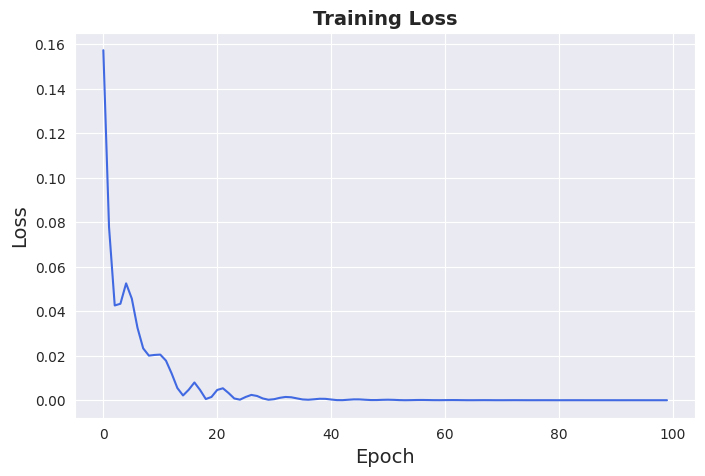

In [132]:
# Retraining our model with tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_gru_model['hidden_dim'])
num_layers = int(best_gru_model['num_layers'])
time_step = int(best_gru_model['time_step'])

#declaring the model
torch.manual_seed(69)
tune_gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tune_gru = to_device(tune_gru, device)

#training and evaluating model
evaluate_single_model(tune_gru, num_epochs, lr, loss_type, optimiser, time_step)

# Running and testing the Final Model

<ipython-input-98-51f4061d97d4>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-51f4061d97d4>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch  0 MSE:  0.07729369401931763
Epoch  1 MSE:  0.06364929676055908
Epoch  2 MSE:  0.051251351833343506
Epoch  3 MSE:  0.04053821787238121
Epoch  4 MSE:  0.032004065811634064
Epoch  5 MSE:  0.02615310437977314
Epoch  6 MSE:  0.02336837165057659
Epoch  7 MSE:  0.023619255051016808
Epoch  8 MSE:  0.026031794026494026
Epoch  9 MSE:  0.02883375622332096
Epoch  10 MSE:  0.030312761664390564
Epoch  11 MSE:  0.029848206788301468
Epoch  12 MSE:  0.027834594249725342
Epoch  13 MSE:  0.02506704442203045
Epoch  14 MSE:  0.02229207567870617
Epoch  15 MSE:  0.02001156285405159
Epoch  16 MSE:  0.018445748835802078
Epoch  17 MSE:  0.017579667270183563
Epoch  18 MSE:  0.017244888469576836
Epoch  19 MSE:  0.01720382645726204
Epoch  20 MSE:  0.01721738465130329
Epoch  21 MSE:  0.017089568078517914
Epoch  22 MSE:  0.01669108122587204
Epoch  23 MSE:  0.015967078506946564
Epoch  24 MSE:  0.014933858066797256
Epoch  25 MSE:  0.013667821884155273
Epoch  26 MSE:  0.01228827890008688
Epoch  27 MSE:  0.010934

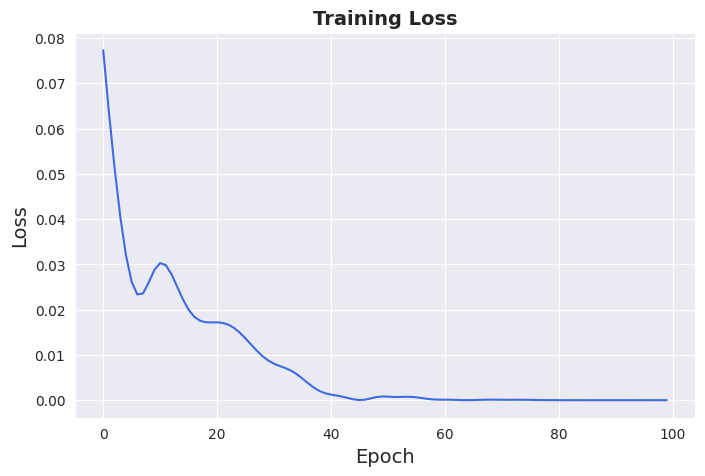

In [133]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(69)
final_model = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
final_model = to_device(final_model, device)

#training and testing the best model
test_final_model(final_model, num_epochs, lr, loss_type, optimiser, time_step)